In [1]:
import numpy as np
import pandas as pd
import os
from matplotlib.ticker import MultipleLocator
from matplotlib import pyplot as plt
from matplotlib import colors
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [2]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 1000000

In [3]:
root = "./"
dir_data = root+"/data/"

In [4]:
def vis_daily(arr,day_num):
    plt.figure()
    plt.plot(arr[day_num][:,0],alpha=0.33)

def vis_yearly(arr,apl_idx,alpha):
    plt.figure()
    for i in range(len(arr)):
        plt.plot(arr[i][:,apl_idx],alpha=alpha)

def norm(seq):
    min = np.min(seq)
    max = np.max(seq)
    norm_seq = (seq-min)/(max-min)
    return norm_seq

# Data Load 함수

In [36]:
################################################################################################################
################################################################################################################

# def load_df(dong,ho):
#     df_ccm = pd.read_csv(dir_data+"CCM/{}_{}_appliances(real)_and_houseload(cum).csv".format(dong,ho),index_col=0,infer_datetime_format=True)
#     df_usm = pd.read_csv(dir_data+"USM/{}_{}_USM_60S.csv".format(dong,ho),index_col=0,infer_datetime_format=True)
#     df_usm = df_usm.fillna(0)
#     # df_ccm = df_ccm.dropna()

#     df_ccm.index = pd.to_datetime(df_ccm.index).tz_localize(None)
#     df_usm.index = pd.to_datetime(df_usm.index).tz_localize(None)

#     # df_usm = df_usm.loc[df_ccm.index]
    
#     return df_usm,df_ccm

################################################################################################################
################################################################################################################

def load_df(dong,ho,sec):
    df_ccm = pd.read_csv(dir_data+"CCM/{}_{}_appliances(real)_environment(real)_and_houseload(cum).csv".format(dong,ho),index_col=0,infer_datetime_format=True)
    df_usm = pd.read_csv(dir_data+"USM/{}_{}_USM_{}S.csv".format(dong,ho,sec),index_col=0,infer_datetime_format=True)
    df_usm = df_usm.fillna(0)
    # df_ccm = df_ccm.dropna()

    df_ccm.index = pd.to_datetime(df_ccm.index).tz_localize(None)
    df_usm.index = pd.to_datetime(df_usm.index).tz_localize(None)

    # df_usm = df_usm.loc[df_ccm.index]
    
    return df_usm,df_ccm

In [5]:
df_ccm = pd.read_csv(dir_data+"CCM/{}_{}_appliances(real)_and_houseload(cum).csv".format(dong,ho),index_col=0)
df_usm = pd.read_csv(dir_data+"USM/{}_{}_USM_5S.csv".format(dong,ho),index_col=0)
df_usm = df_usm.fillna(0)

df_ccm.index = pd.to_datetime(df_ccm.index).tz_localize(None)
df_usm.index = pd.to_datetime(df_usm.index).tz_localize(None)

# df_usm = df_usm.loc[df_ccm.index]

In [ ]:
# test_df = df.iloc[600:660].round(0)
# test_df = df_usm.iloc[:2880].round(0)
# test_df = df_usm.round(0)
test_df = df_usm
for col in test_df.columns:
    test_df[col+"USM"] = 1*((test_df[col] == 2) | (test_df[col] == 4))
start_time = '2021-07-05 06:00:00'
end_time = '2021-07-05 23:59:59'


for usm in test_df.columns:
    plt.figure(figsize=(20,7))
    plt.step(test_df[usm].index,test_df[usm].values,label=usm,where='post')
# for ccm in ccm_columns:
#     plt.step(df_CCM_power[ccm].index, df_CCM_power[ccm].values, label=ccm, where='post',  linewidth=3)
# test_df.plot(figsize=(20,7))
    plt.axhline(y=1, color='r', linewidth=3,linestyle=':',alpha=0.8,label='부재감지')
    plt.axhline(y=2, color='b', linewidth=3,linestyle=':',alpha=0.8,label='재실감지')
    plt.axhline(y=3, color='r', linewidth=3,linestyle='--',alpha=0.7,label='부재지속')
    plt.axhline(y=4, color='b', linewidth=3,linestyle='--',alpha=0.7,label='재실지속')

    plt.title("USM(재실센서) plot")


    plt.xlim(pd.to_datetime(start_time), pd.to_datetime(end_time))
    plt.xlabel("Time Index(1분단위)")
    plt.ylabel("USM value")
    plt.xticks(rotation=45, fontsize=13)
    plt.yticks([0,1,2,3,4])
    plt.legend(loc=4)
    plt.show()


test_df_2 = test_df.iloc[:,5:]

for usm in test_df_2.columns:
    plt.figure(figsize=(20,7))
    plt.step(test_df_2[usm].index,test_df_2[usm].values,label=usm,where='post')
# for ccm in ccm_columns:
#     plt.step(df_CCM_power[ccm].index, df_CCM_power[ccm].values, label=ccm, where='post',  linewidth=3)
# test_df.plot(figsize=(20,7))
    plt.axhline(y=0, color='r', linewidth=3,linestyle=':',alpha=0.8,label='부재')
    plt.axhline(y=1, color='b', linewidth=3,linestyle=':',alpha=0.8,label='재실')

    plt.title("USM(재실센서) plot")


    plt.xlim(pd.to_datetime(start_time), pd.to_datetime(end_time))
    plt.xlabel("Time Index(5분단위)")
    plt.ylabel("USM value")
    plt.xticks(rotation=45, fontsize=13)
    plt.yticks([0,1])
    plt.legend(loc=4)
    plt.show()

In [6]:
def match_algo(ccm_li,usm_li):
    match_li = []
    for ccm in ccm_li:
        for room in ["1","2","3","4","거실"]:
            if room in ccm:
                for usm in usm_li:
                    if room in usm:
                        # print(ccm,usm)
                        match_li.append((ccm,usm))
    return match_li

# Plot 함수

In [54]:
def plot_main(dong,ho,df_usm,df_ccm,start_time,end_time):
    test_df = df_usm.round(0)
    len_cols = len(test_df.columns)
    for col in test_df.columns:
        test_df[col+"USM"] = 1*((test_df[col] == 2) | (test_df[col] == 4))
    test_df_2 = test_df.iloc[:,len_cols:]
    
    #####
    test_df_2 = test_df_2[start_time:end_time]
    #####

    # 동 호수별 ccm,usm 필요한것 정리
    cols = df_ccm.columns
    ccm_li = []

    for col in cols:
        if "PC" in col:
            # print(col)
            ccm_li.append(col)
        elif "TV" in col:
            # print(col)
            ccm_li.append(col)

    usm_li = test_df_2.columns

    match_li = match_algo(ccm_li,usm_li)


    # 매칭되는 센서별로 plot
    for ccm,usm in match_li:
        c = 'royalblue' if ('PC' in ccm) else 'mediumpurple'
        test_df_ccm = df_ccm[ccm]
        test_df_ccm=test_df_ccm.fillna(0)
        # test_df_ccm=test_df_ccm.drop_duplicates()

        # 60 mins 
        fig, ax1 = plt.subplots(1, 1, figsize=(25, 5))

        # First Plot
        lns1 = ax1.step(test_df_ccm.index,
                        test_df_ccm.values,
                        color= c, 
                        marker = 'None', 
                        # markersize=2, 
                        # linestyle = "dashed", 
                        label='{} 사용량'.format(ccm))


        ax1.set_xlim(pd.to_datetime(start_time), pd.to_datetime(end_time))
        ax1.set_xlabel('date', fontsize=17)
        ax1.set_ylabel('Power (W)', fontsize=17)
        ax1.tick_params(axis = 'x', labelsize = 12, rotation=45)
        ax1.tick_params(axis = 'y', labelsize = 12)
        ax1.grid(linewidth=0.3)

        ax1.legend("Power")
        # ax1.set_title(dong + "-" + ho, fontsize=16, va='bottom', fontweight='semibold')
        # ax1.legend(['AC (Wh)'], loc="center right", fontsize=12)

        #Second Plot
        ax2 = ax1.twinx()

        lns2 = ax2.step(test_df_2[usm].index,
                        test_df_2[usm].values,
                        color='black', 
                        marker = 'None', 
                        # markersize=2,
                        alpha=0.05,
                        # linestyle = "dashed",
                        label='재실유무 {}'.format(usm))

        ax2.fill_between(test_df_2[usm].index,
                test_df_2[usm].values,
                color='black',
                alpha=0.1,
                step='pre')

        ax2.set_ylim([0, 1])
        ax2.set_ylabel('Presence', fontsize=17)
        ax2.tick_params(axis = 'y', labelsize = 12)

        # added these two lines
        lns = lns1+lns2

        labs = [l.get_label() for l in lns]
        ax1.legend(lns, labs, loc="best", fontsize=12, bbox_to_anchor=(1.219, 0.5))

        plt.title("{}_{} {} EDA \n {} ~ {}".format(dong,ho,ccm,start_time[:10],end_time[:10]),fontsize = 30, fontweight = "bold")
        plt.tight_layout()
        plt.show()
        # plt.get_backend()

## test용 Plot 함수

In [8]:
def plot_main_test(dong,ho,df_usm,df_ccm,start_time,end_time):
    test_df = df_usm.round(0)
    len_cols = len(test_df.columns)
    for col in test_df.columns:
        test_df[col+"USM"] = 1*((test_df[col] == 2) | (test_df[col] == 4))
    test_df_2 = test_df.iloc[:,len_cols:]

    # 동 호수별 ccm,usm 필요한것 정리
    cols = df_ccm.columns
    ccm_li = []

    for col in cols:
        if "PC" in col:
            # print(col)
            ccm_li.append(col)
        elif "TV" in col:
            # print(col)
            ccm_li.append(col)

    usm_li = test_df_2.columns

    match_li = match_algo(ccm_li,usm_li)


    # 매칭되는 센서별로 plot
    for ccm,usm in match_li:
        c = 'royalblue' if ('PC' in ccm) else 'mediumpurple'
        test_df_ccm = df_ccm[ccm]
        test_df_ccm=test_df_ccm.fillna(0)
        # test_df_ccm=test_df_ccm.drop_duplicates()

        # 60 mins 
        fig, ax1 = plt.subplots(1, 1, figsize=(25, 5))

        # First Plot
        lns1 = ax1.step(test_df_ccm.index,
                        test_df_ccm.values,
                        color= c, 
                        marker = 'None', 
                        # markersize=2, 
                        # linestyle = "dashed", 
                        label='{} 사용량'.format(ccm))


        ax1.set_xlim(pd.to_datetime(start_time), pd.to_datetime(end_time))
        ax1.set_xlabel('date', fontsize=17)
        ax1.set_ylabel('Power (W)', fontsize=17)
        ax1.tick_params(axis = 'x', labelsize = 12, rotation=45)
        ax1.tick_params(axis = 'y', labelsize = 12)
        ax1.grid(linewidth=0.3)

        ax1.legend("Power")
        # ax1.set_title(dong + "-" + ho, fontsize=16, va='bottom', fontweight='semibold')
        # ax1.legend(['AC (Wh)'], loc="center right", fontsize=12)

        #Second Plot
        ax2 = ax1.twinx()

        lns2 = ax2.step(test_df_2[usm].index,
                        test_df_2[usm].values,
                        color='black', 
                        marker = 'None', 
                        # markersize=2,
                        alpha=0.1,
                        # linestyle = "dashed",
                        label='재실유무 {}'.format(usm))

        ax2.fill_between(test_df_2[usm].index,
                test_df_2[usm].values,
                color='black',
                alpha=0.2,
                step='pre')

        ax2.set_ylim([0, 1])
        ax2.set_ylabel('Presence', fontsize=17)
        ax2.tick_params(axis = 'y', labelsize = 12)

        # added these two lines
        lns = lns1+lns2

        labs = [l.get_label() for l in lns]
        ax1.legend(lns, labs, loc="best", fontsize=12, bbox_to_anchor=(1.219, 0.5))

        plt.title("{}_{} {} 점유시간 x 사용량".format(dong,ho,ccm),fontsize = 30, fontweight = "bold")
        plt.tight_layout()
        # plt.show()
        plt.get_backend()
        plt.savefig('savefig_test.png')

In [9]:
def check_match(df_usm,df_ccm):
    test_df = df_usm.round(0)
    len_cols = len(test_df.columns)
    for col in test_df.columns:
        test_df[col+"USM"] = 1*((test_df[col] == 2) | (test_df[col] == 4))
    test_df_2 = test_df.iloc[:,len_cols:]

    # 동 호수별 ccm,usm 필요한것 정리
    cols = df_ccm.columns
    ccm_li = []

    for col in cols:
        if "PC" in col:
            # print(col)
            ccm_li.append(col)
        elif "TV" in col:
            # print(col)
            ccm_li.append(col)

    usm_li = test_df_2.columns

    match_li = match_algo(ccm_li,usm_li)
    
    print(ccm_li)
    print(usm_li)
    print(match_li)

# - 전체 구간에 대한 PLOT

In [10]:
start_time = '2021-07-01 12:00:00'
end_time = '2021-09-29 23:59:59'

In [49]:
dh_list = [('101', '302'),
 ('101', '402'),
 ('101', '502'),
 ('101', '702')]

In [12]:
# dh_list = [('101', '702'),
#  ('101', '502'),
#  ('101', '302'),
#  ('101', '402'),
#  ('101', '701'),
#  ('101', '201'),
#  ('101', '1501'),
#  ('102', '202'),
#  ('102', '208'),
#  ('102', '1007'),
#  ('102', '1101')]

## 1분기

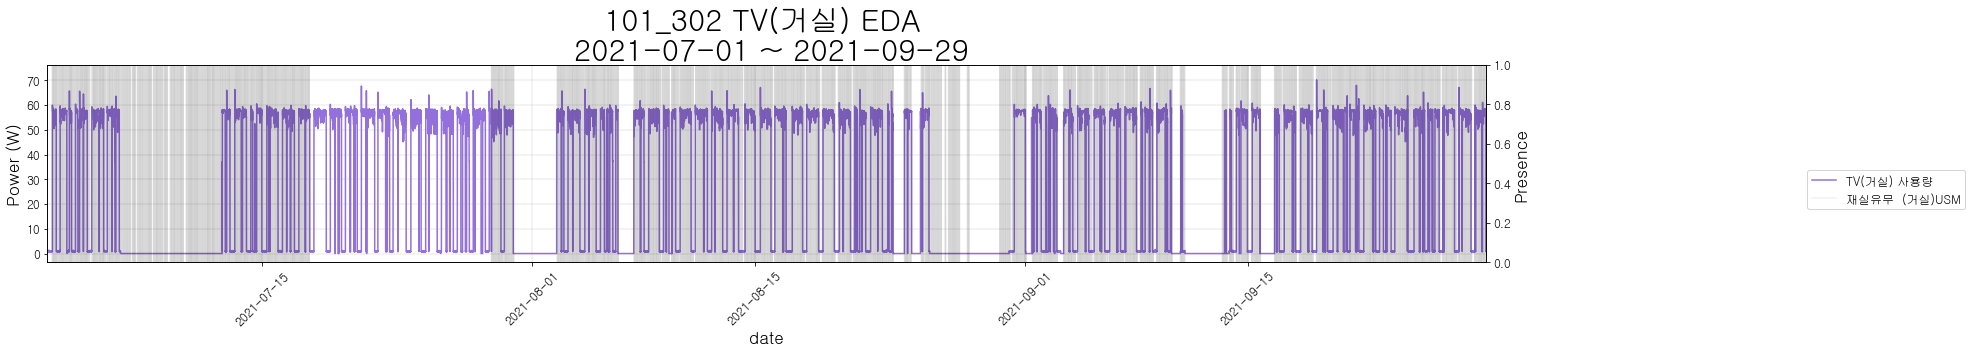

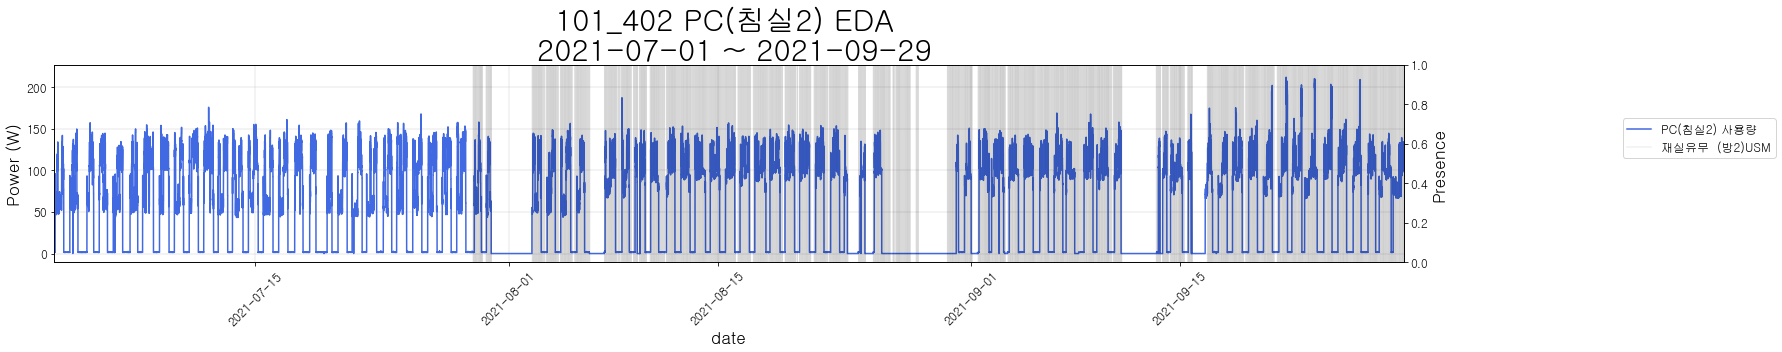

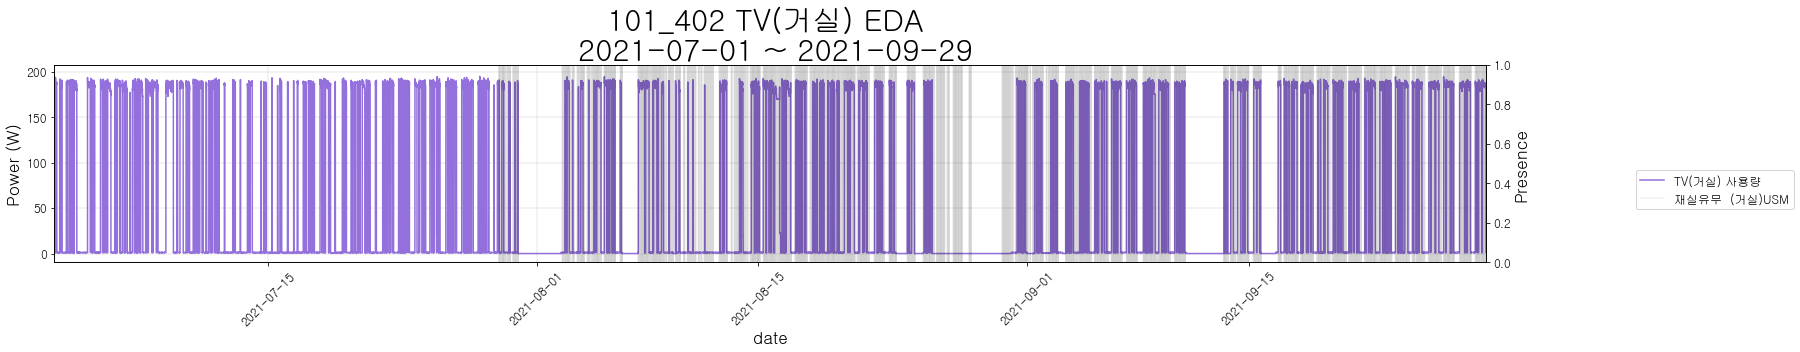

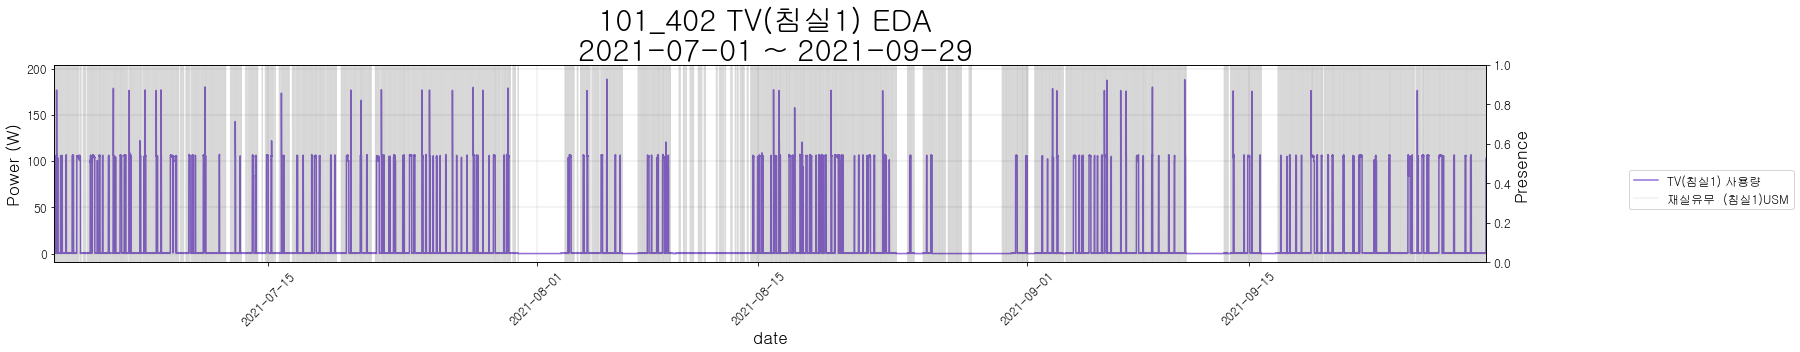

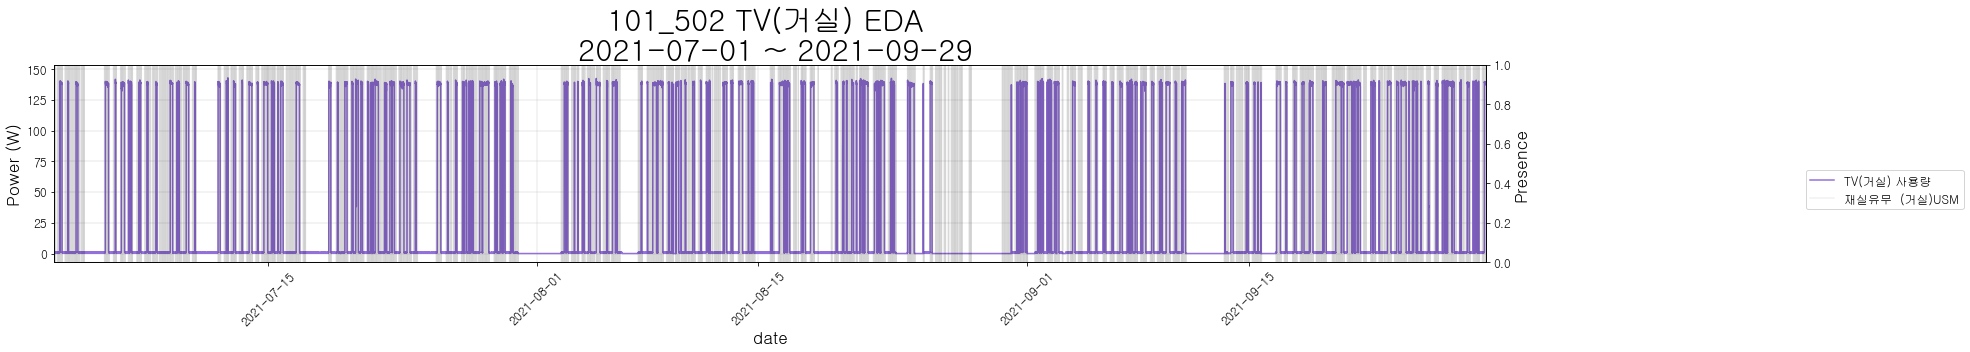

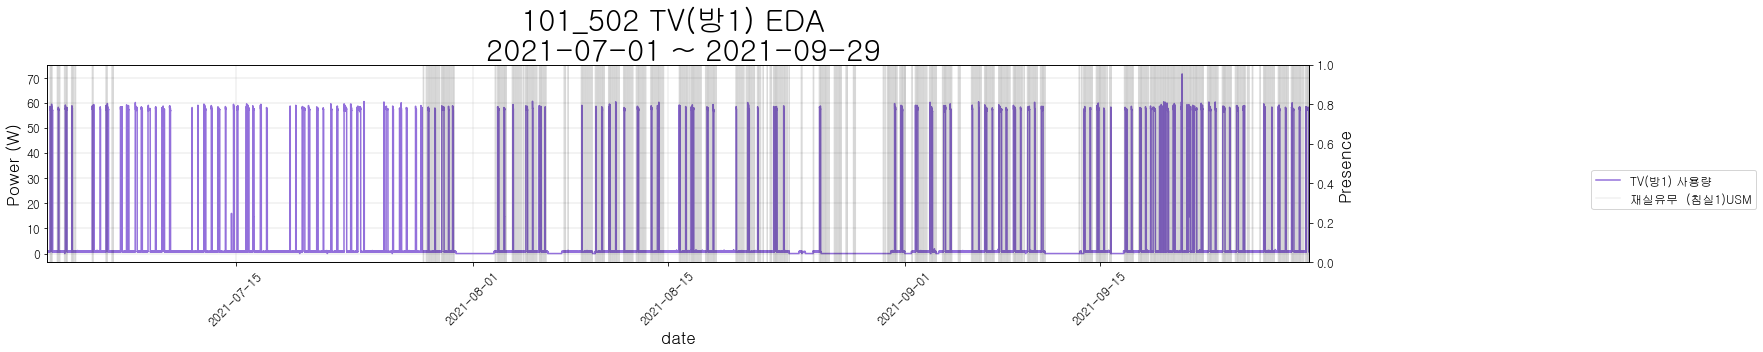

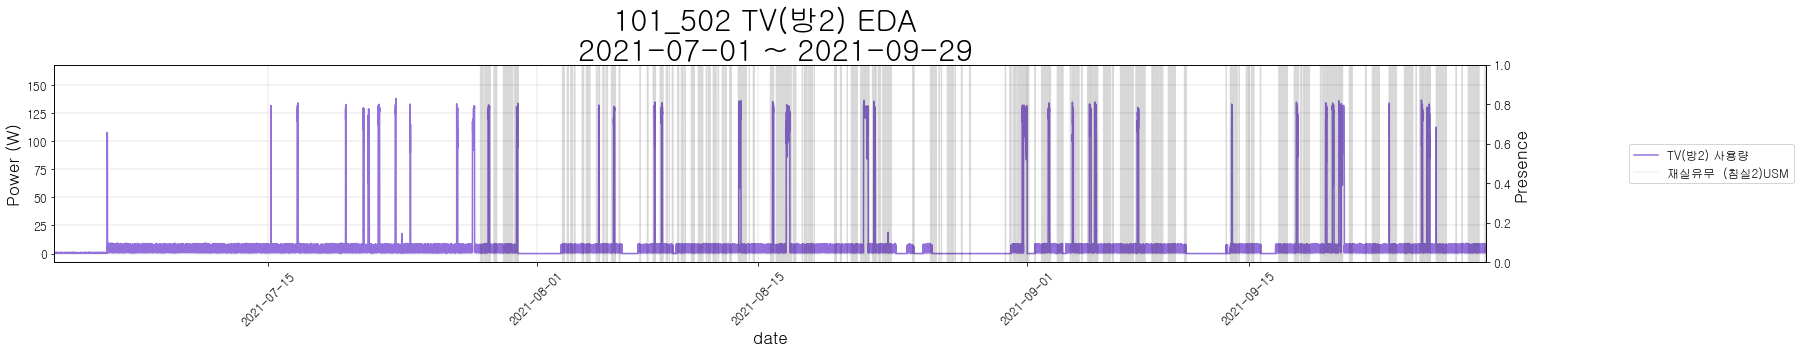

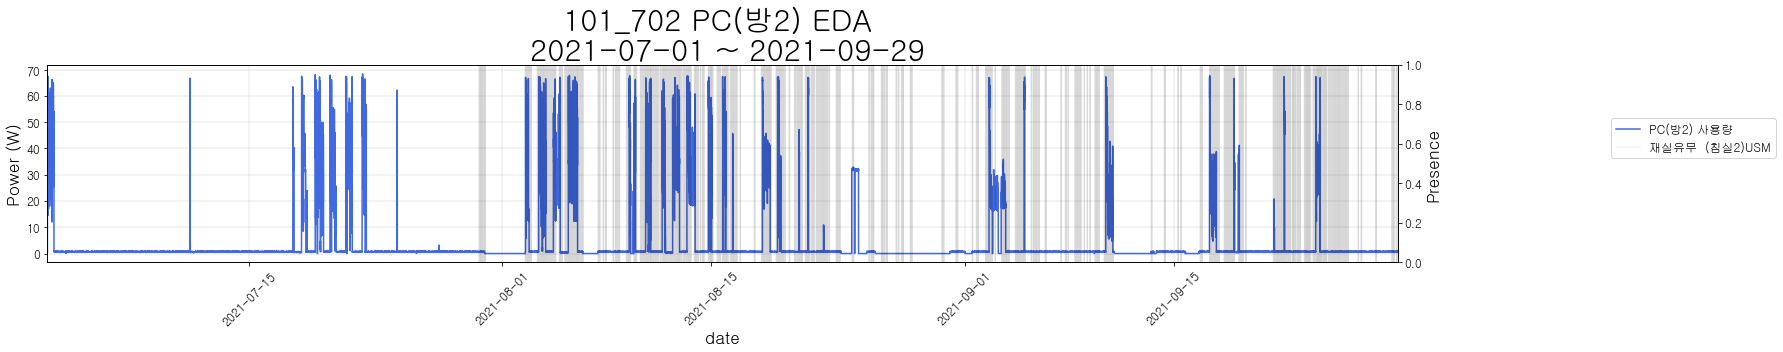

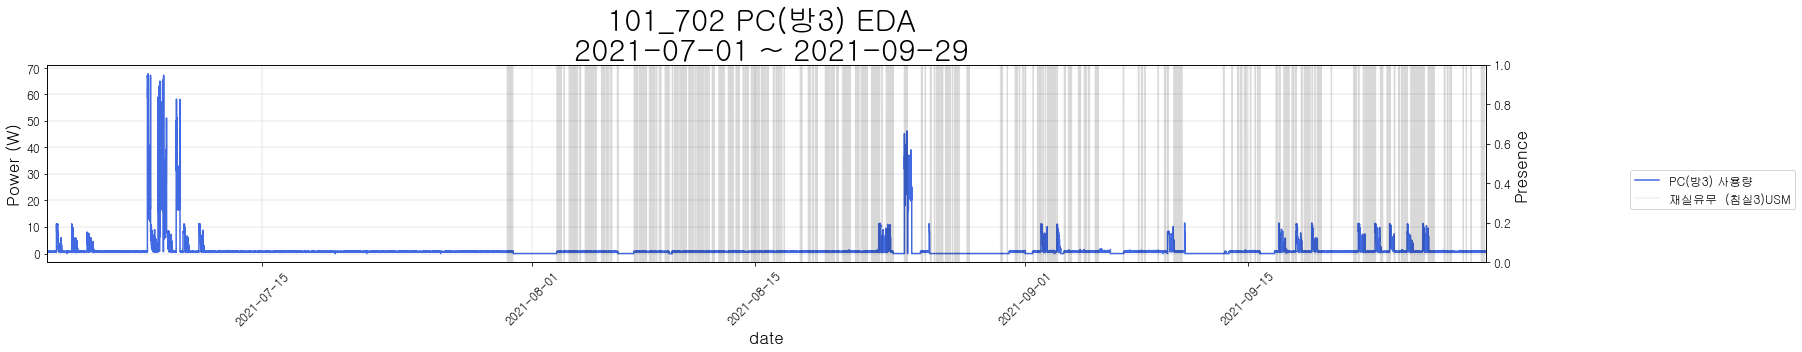

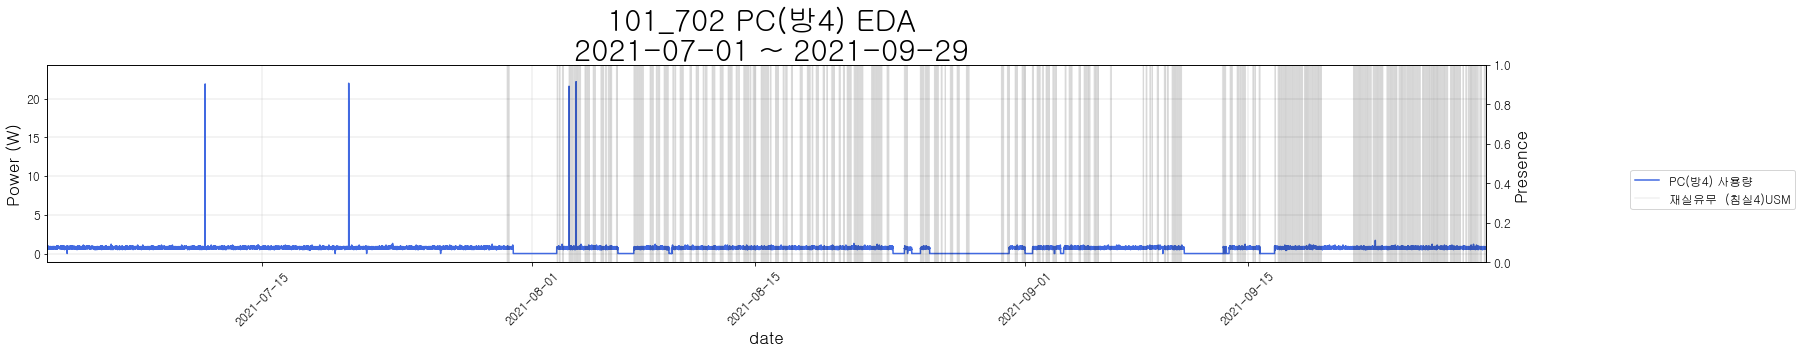

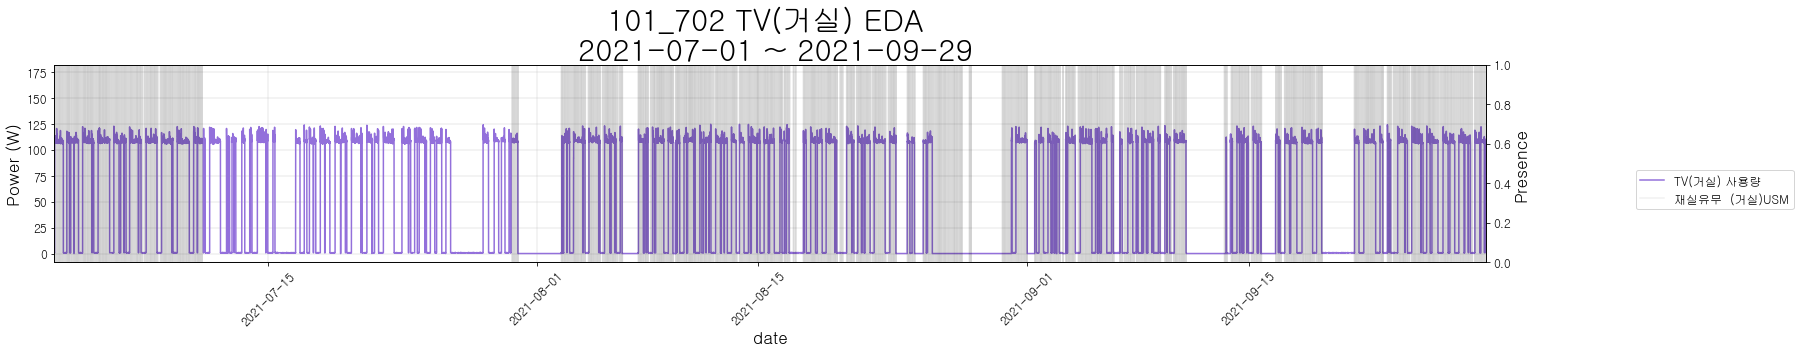

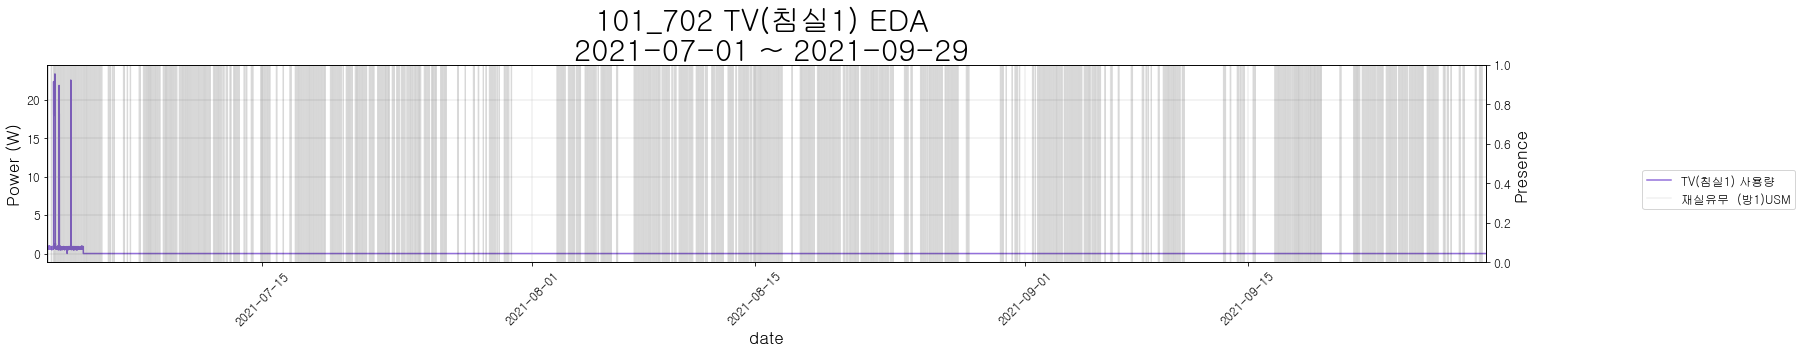

In [55]:
start_time = '2021-07-01 12:00:00'
end_time = '2021-09-29 23:59:59'
for dong,ho in dh_list:
    df_usm,df_ccm = load_df(dong,ho,60)
    # display(df_ccm)
    plot_main(dong,ho,df_usm,df_ccm,start_time,end_time)
    # print("=="*300)
    # print("=="*300)

## 2분기

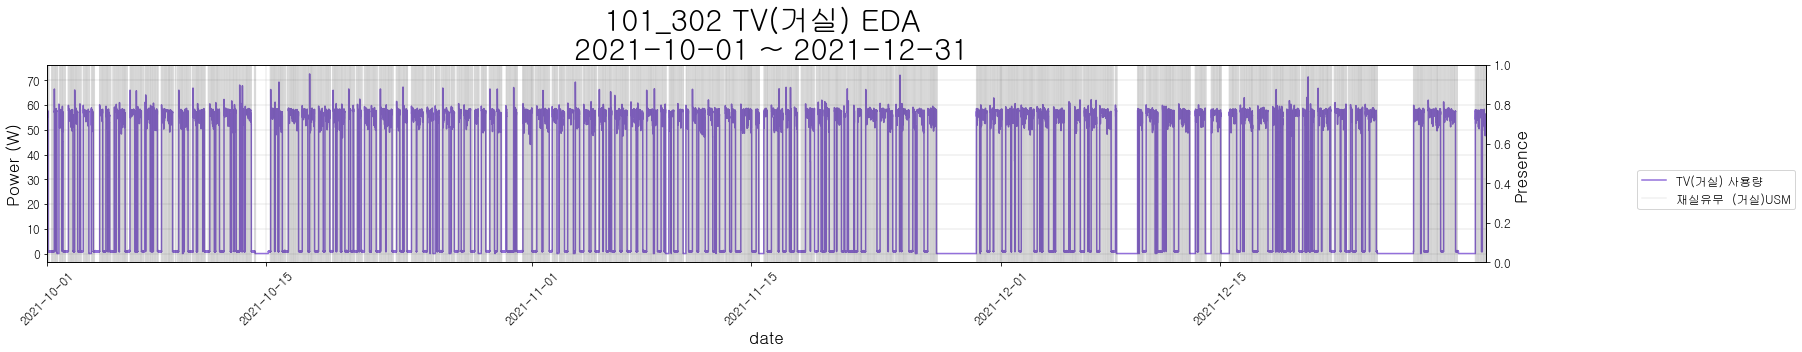

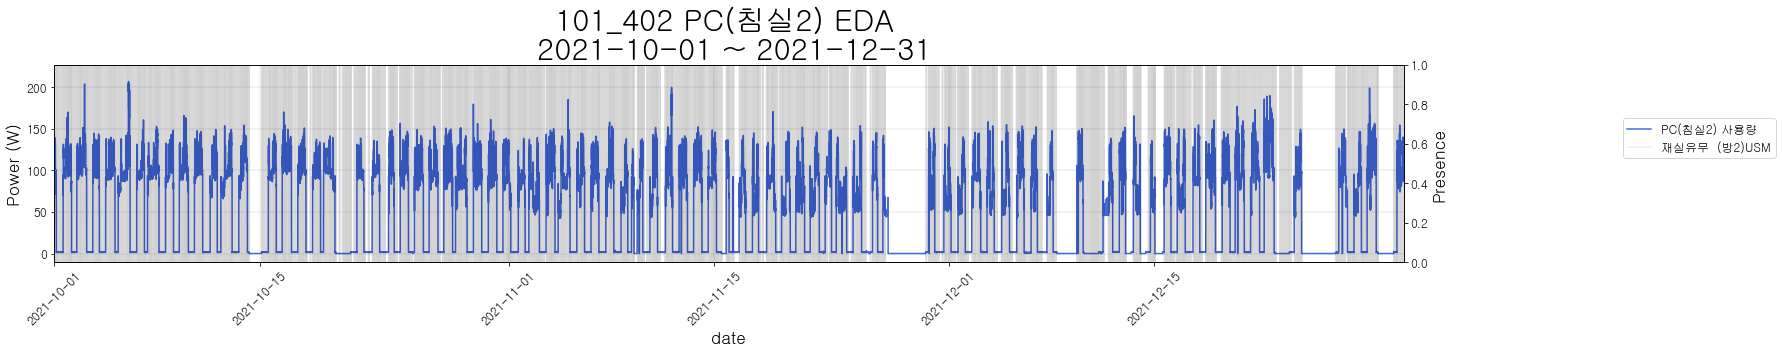

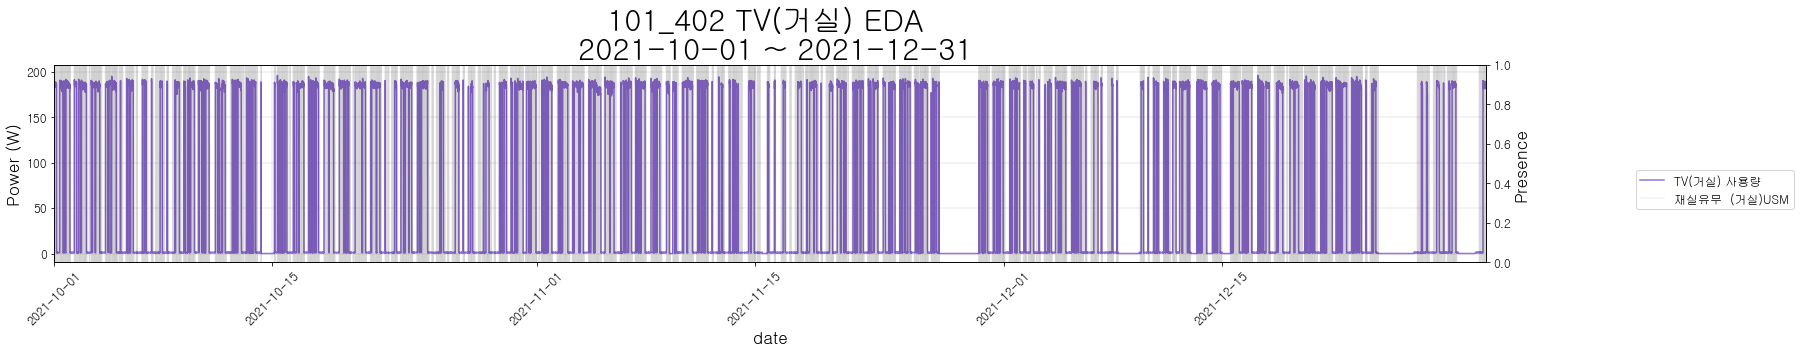

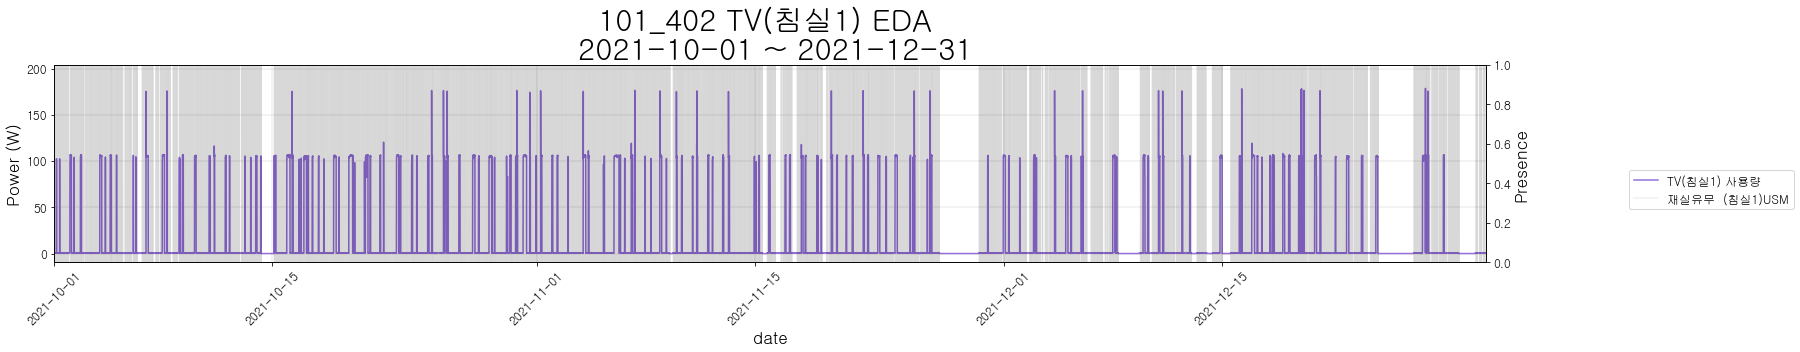

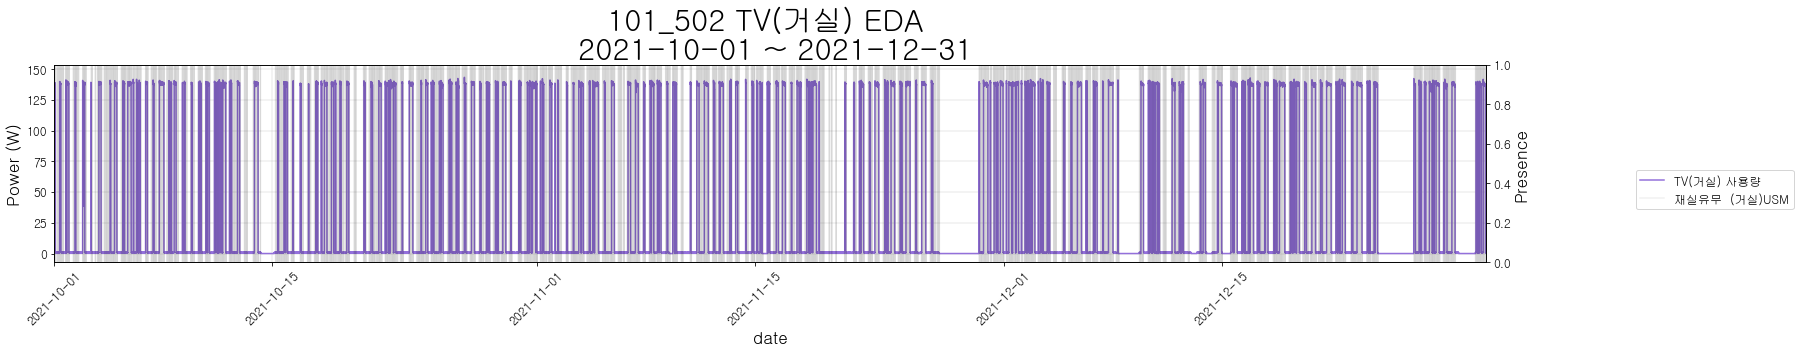

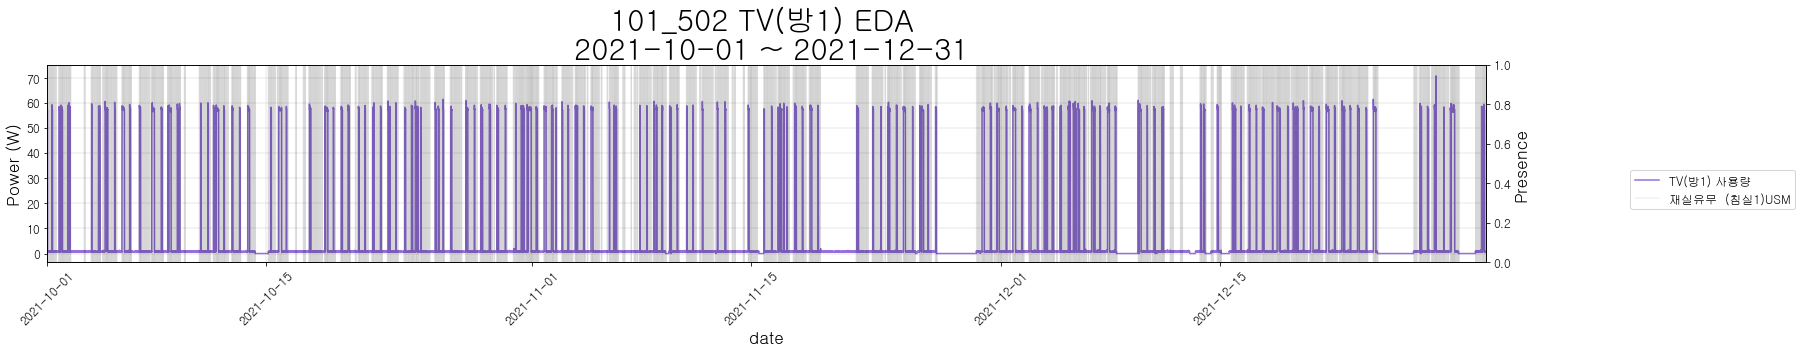

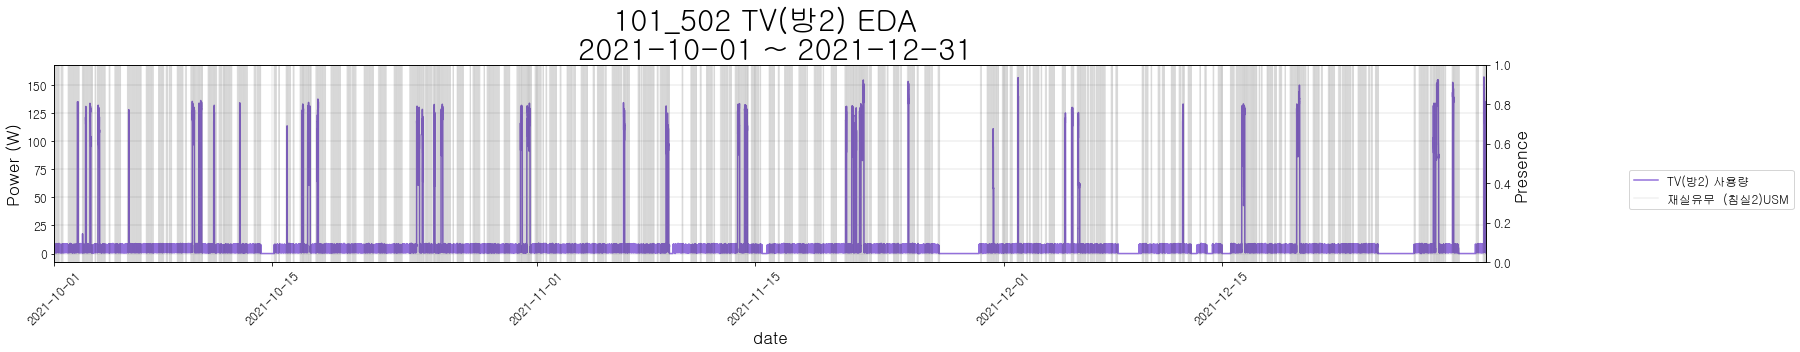

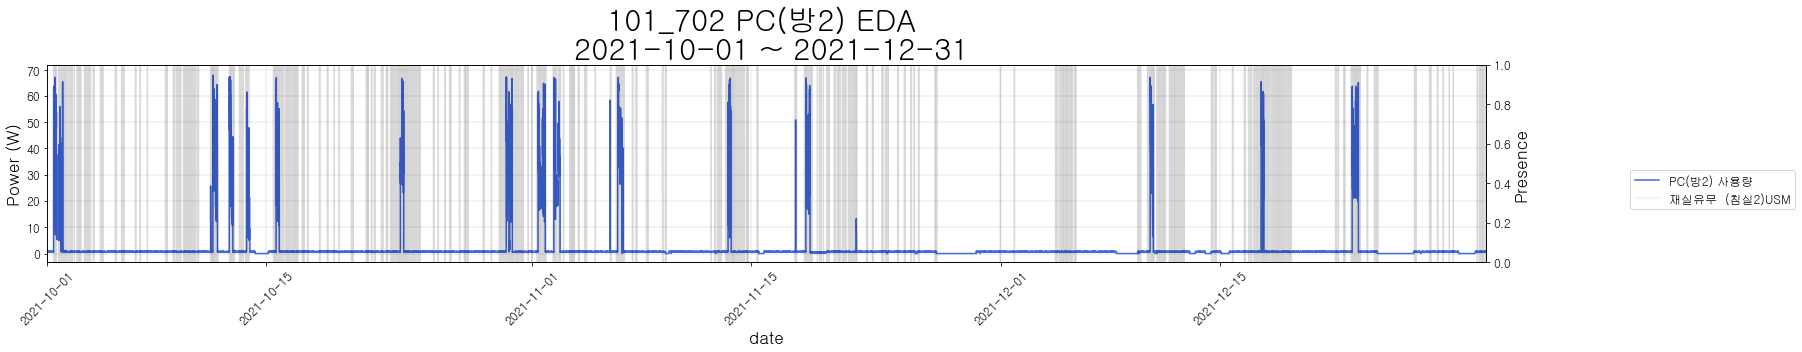

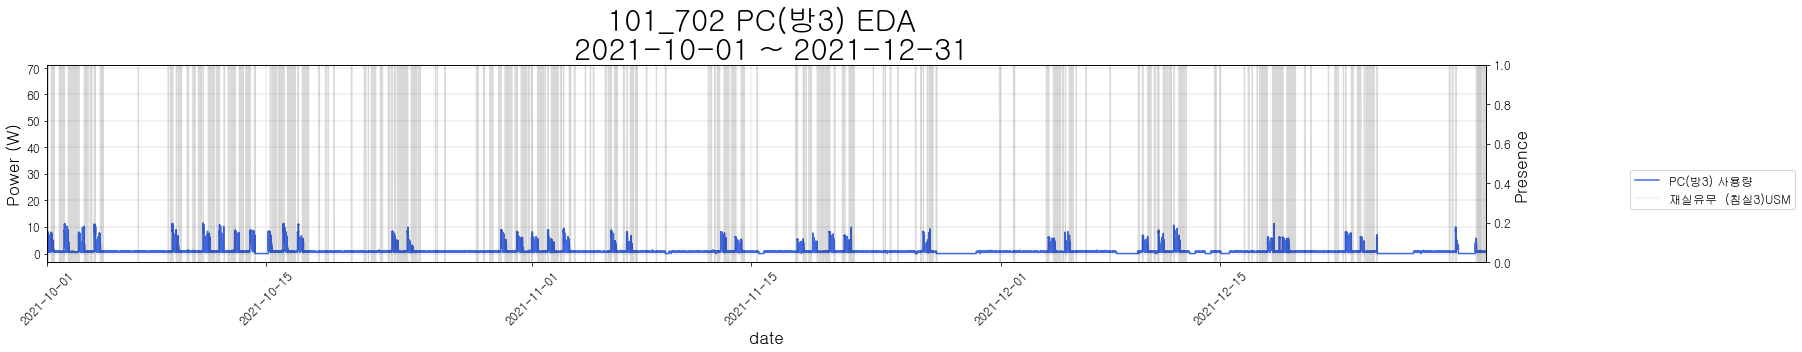

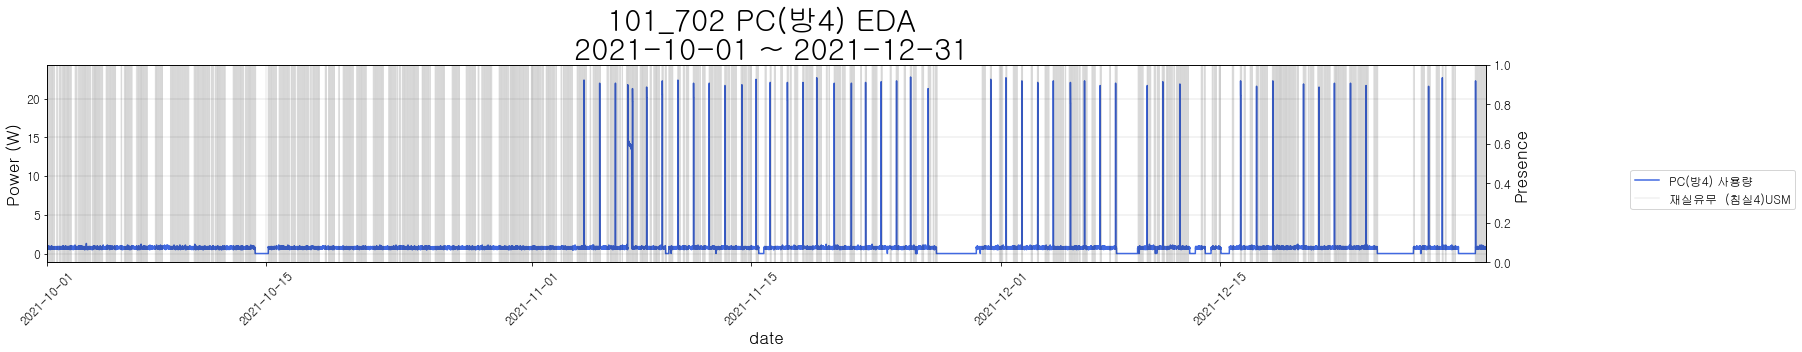

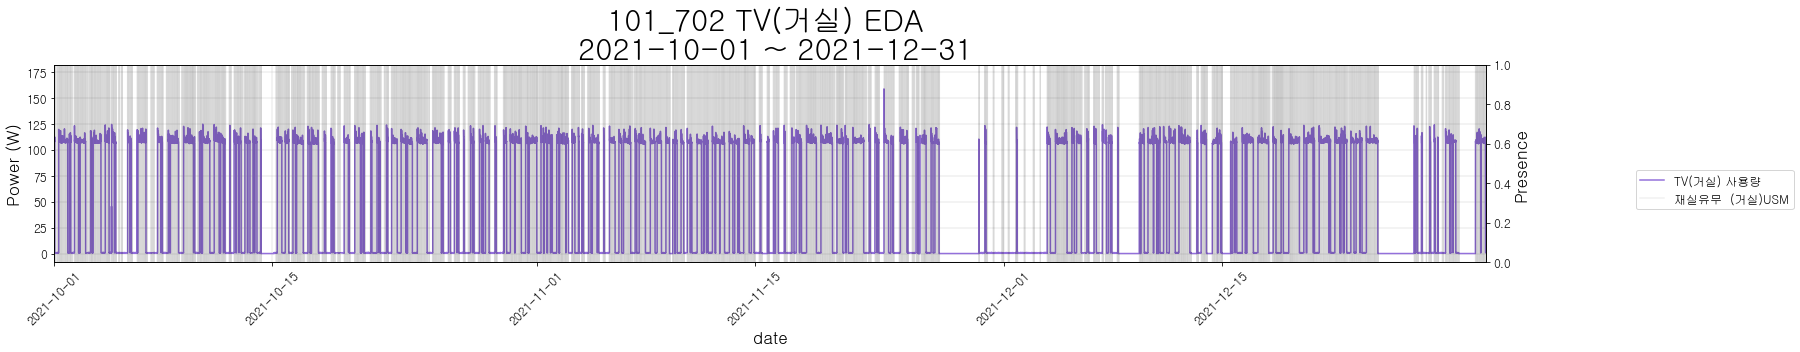

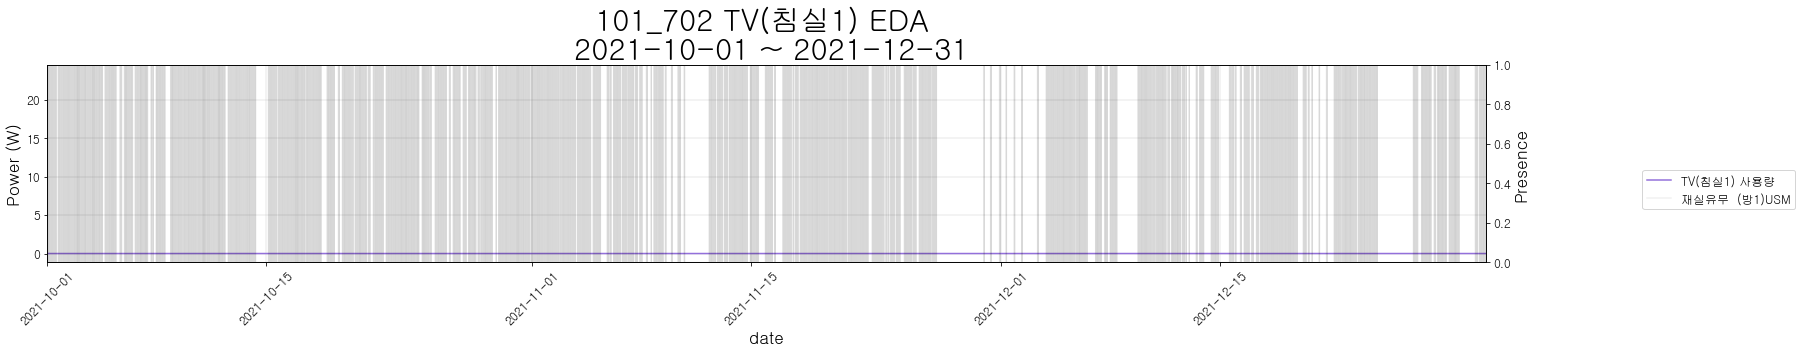

In [60]:
start_time = '2021-10-01 00:00:00'
end_time = '2021-12-31 23:59:59'
for dong,ho in dh_list:
    df_usm,df_ccm = load_df(dong,ho,60)
    # display(df_ccm)
    plot_main(dong,ho,df_usm,df_ccm,start_time,end_time)
    print("=="*300)
    print("=="*300)

## 3분기

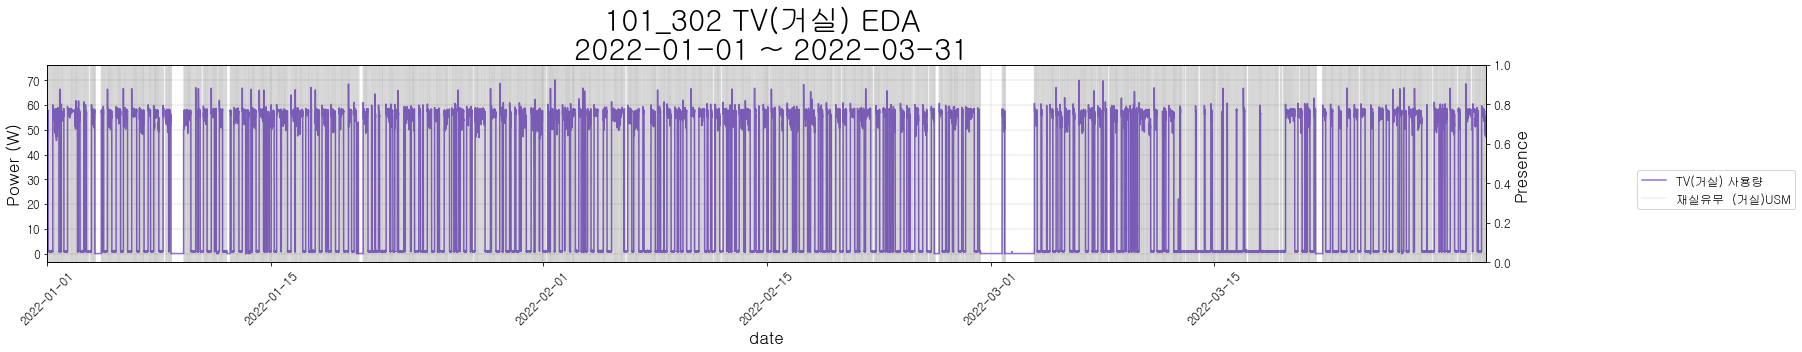

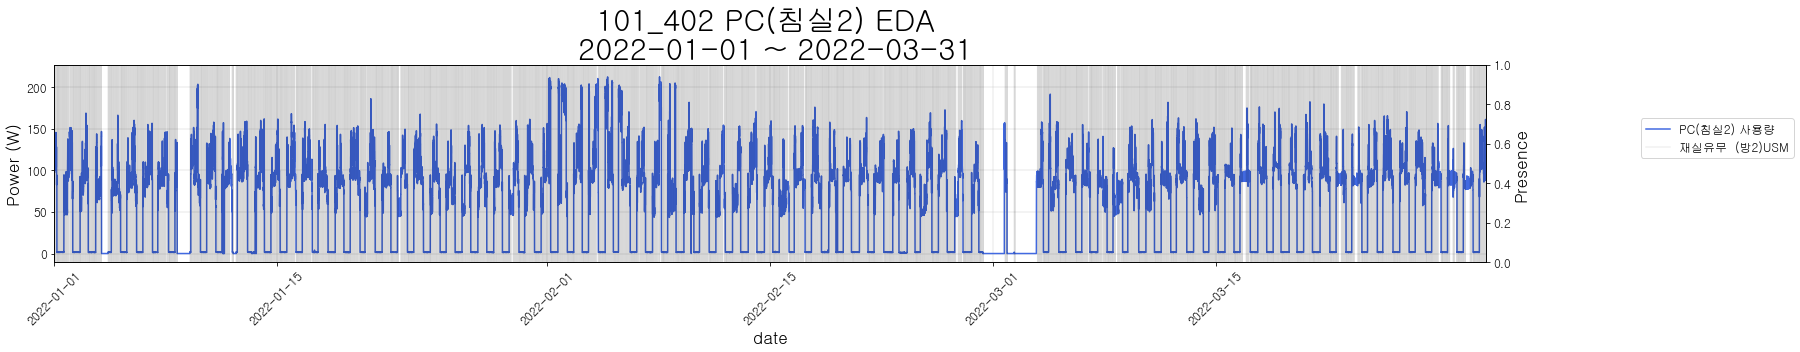

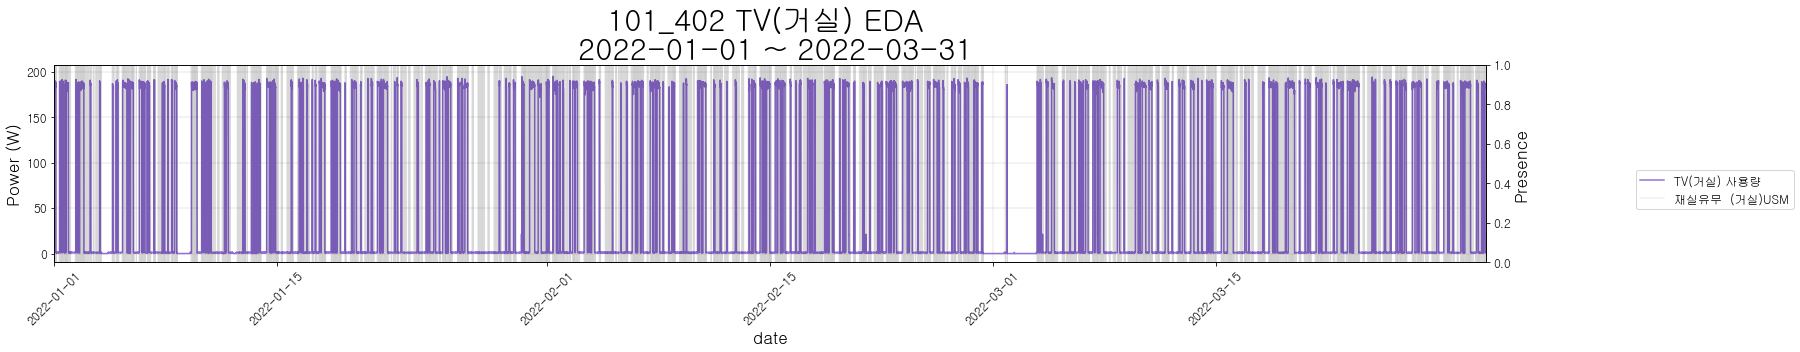

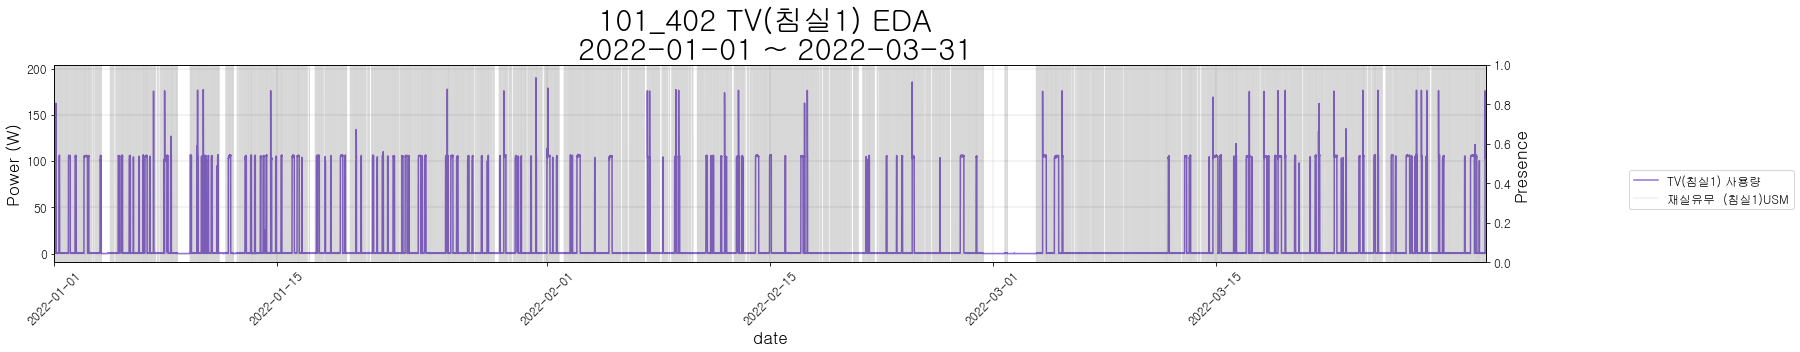

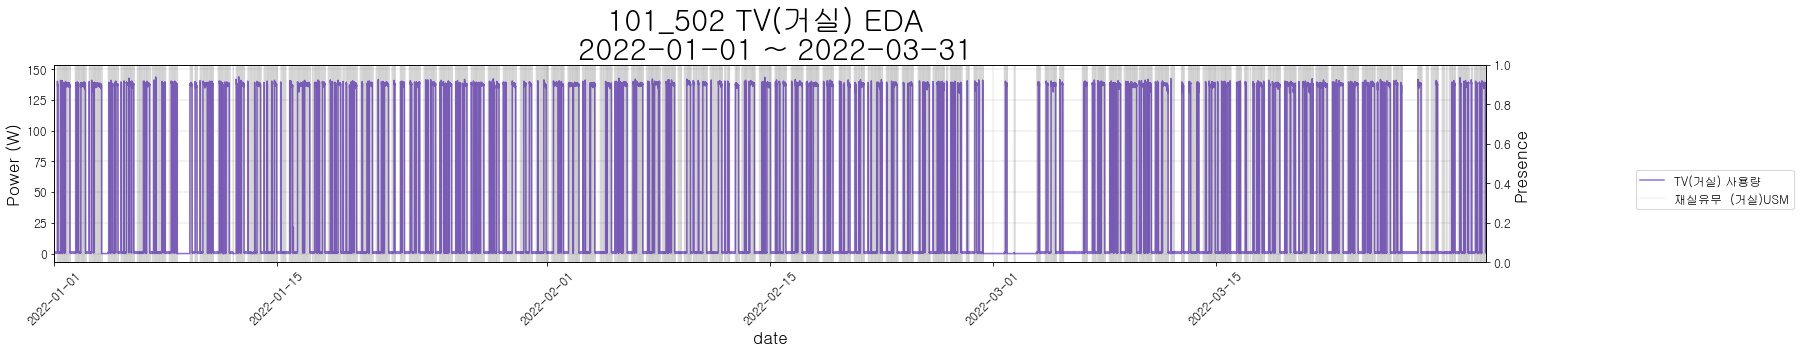

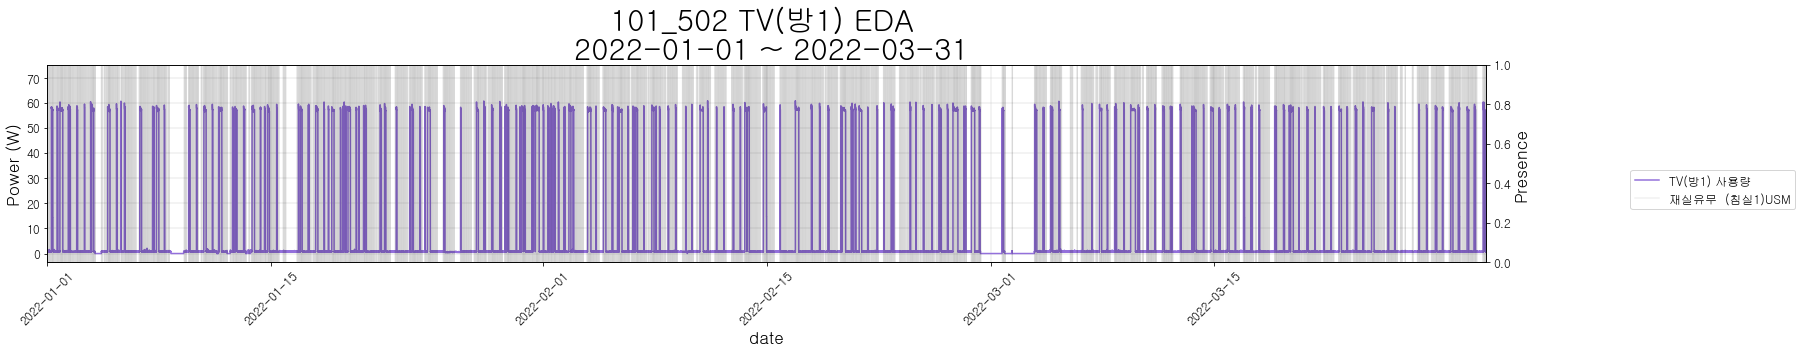

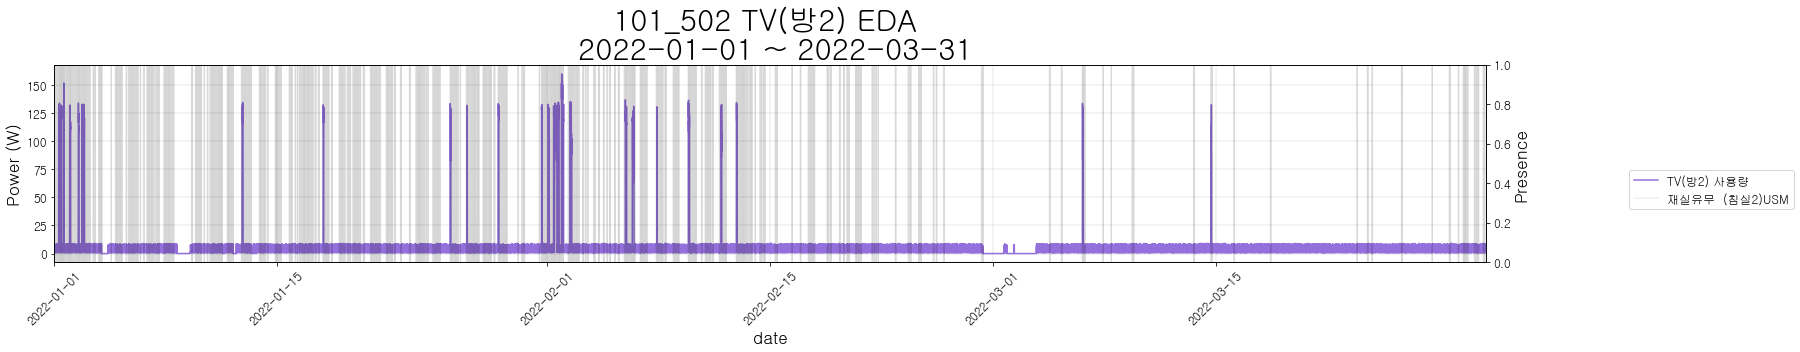

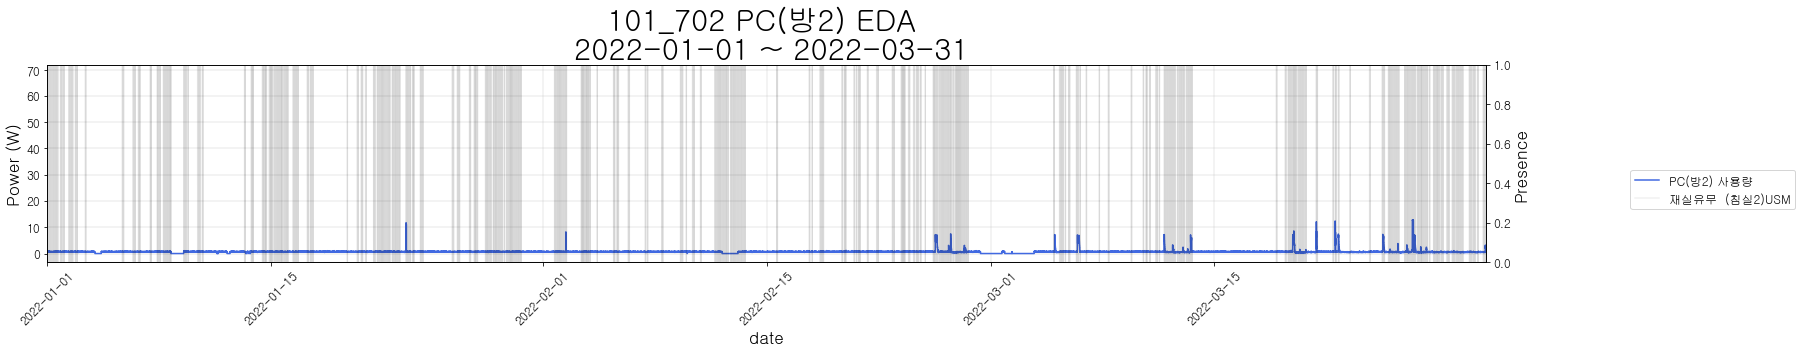

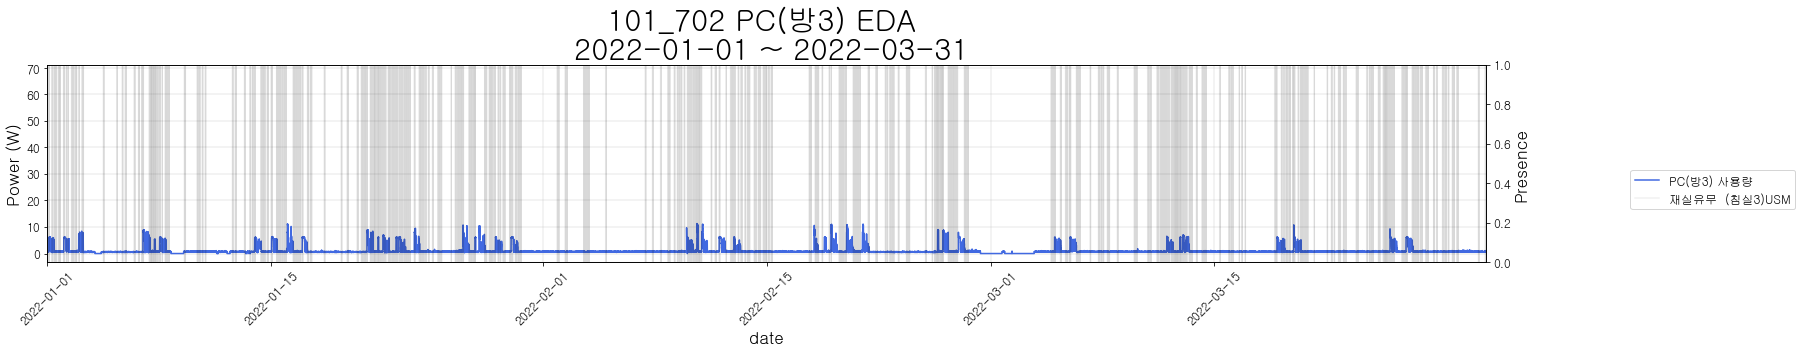

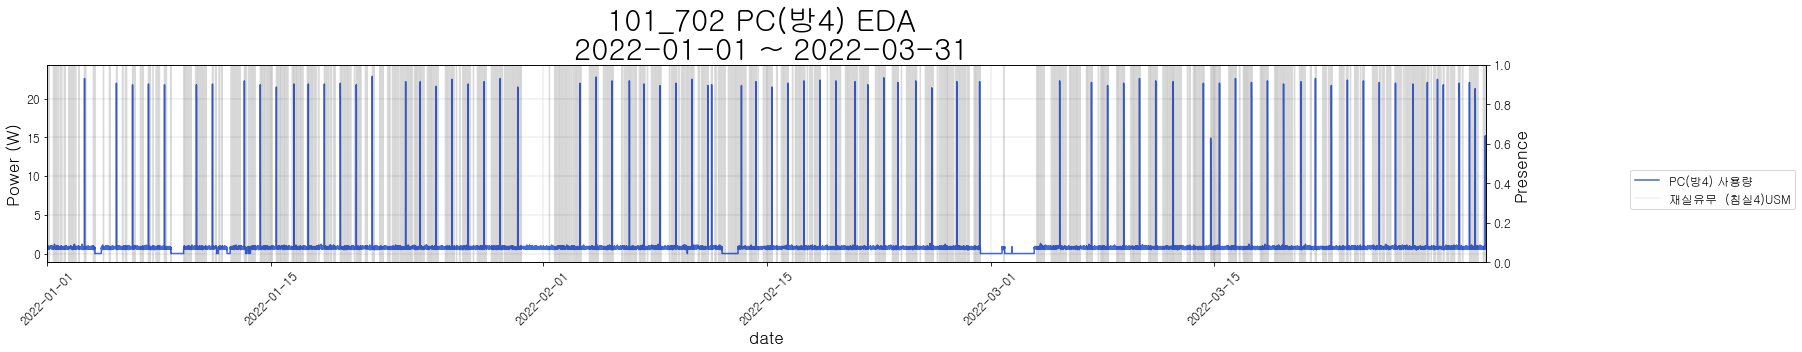

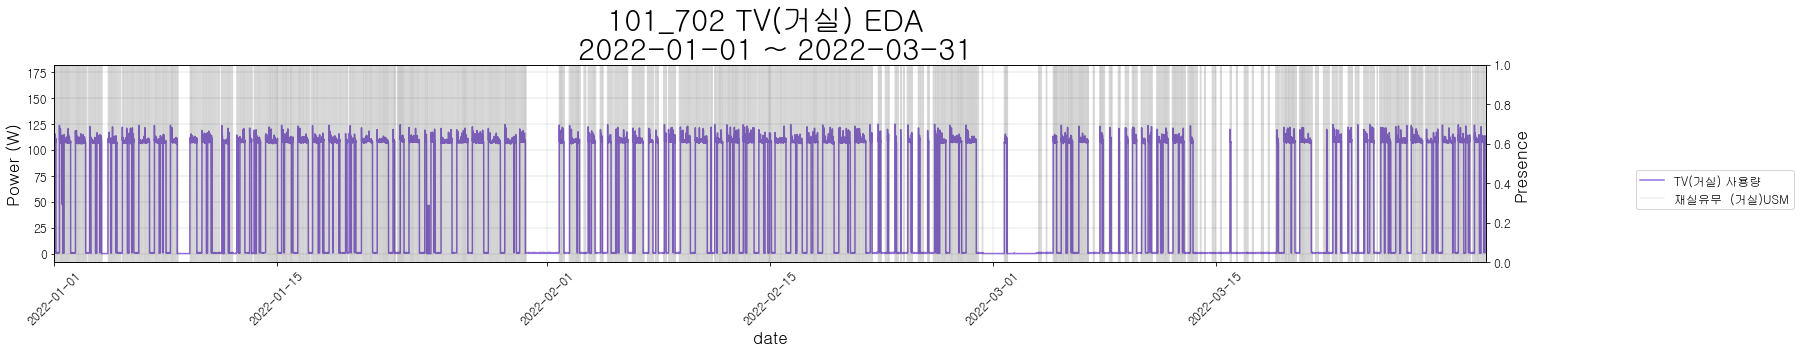

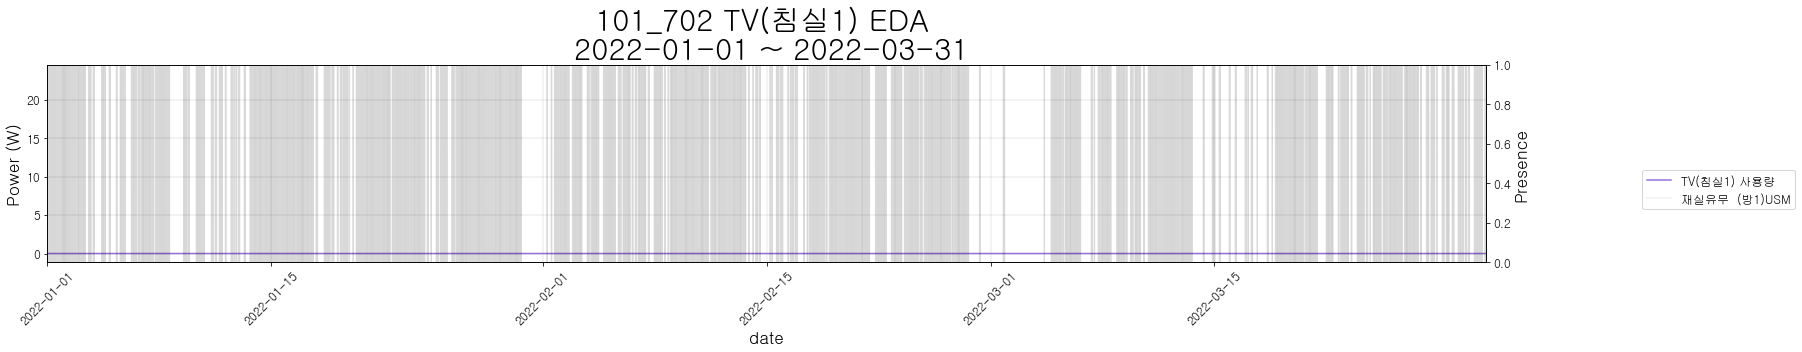

In [61]:
start_time = '2022-01-01 00:00:00'
end_time = '2022-03-31 23:59:59'
for dong,ho in dh_list:
    df_usm,df_ccm = load_df(dong,ho,60)
    # display(df_ccm)
    plot_main(dong,ho,df_usm,df_ccm,start_time,end_time)
    print("=="*300)
    print("=="*300)

## 4분기

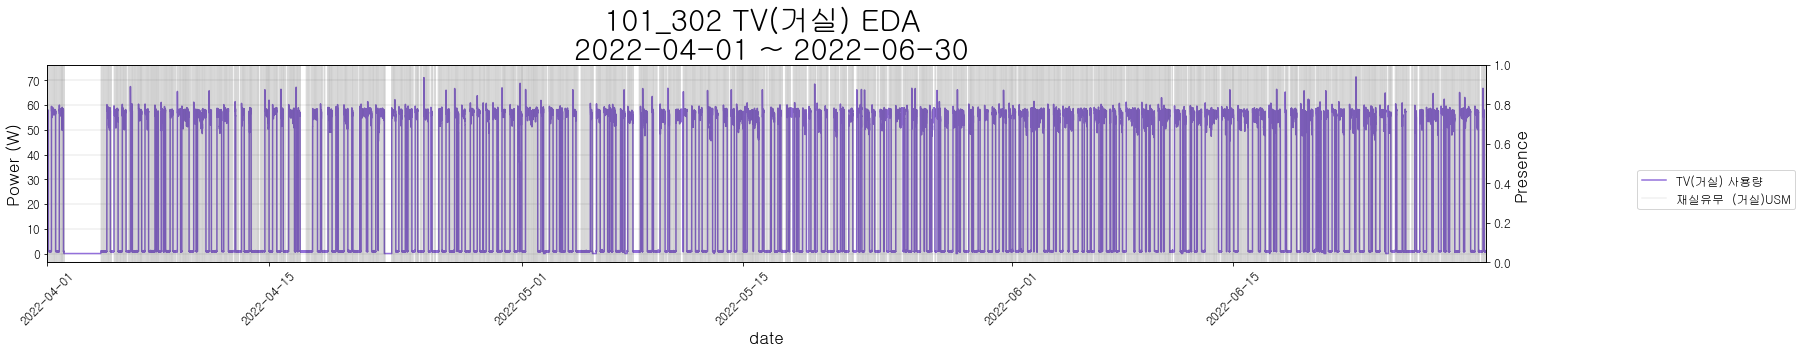

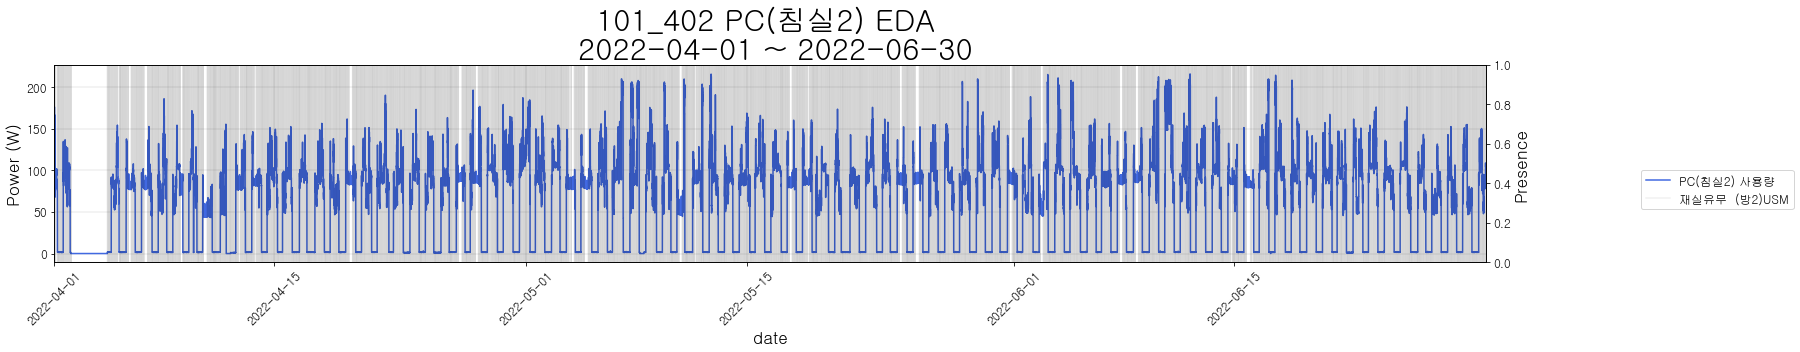

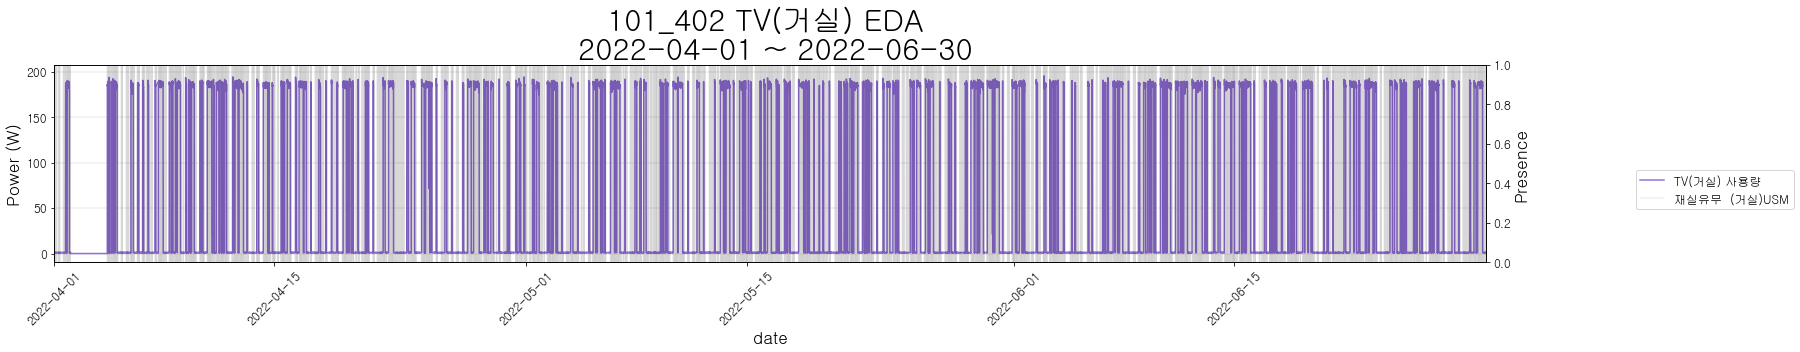

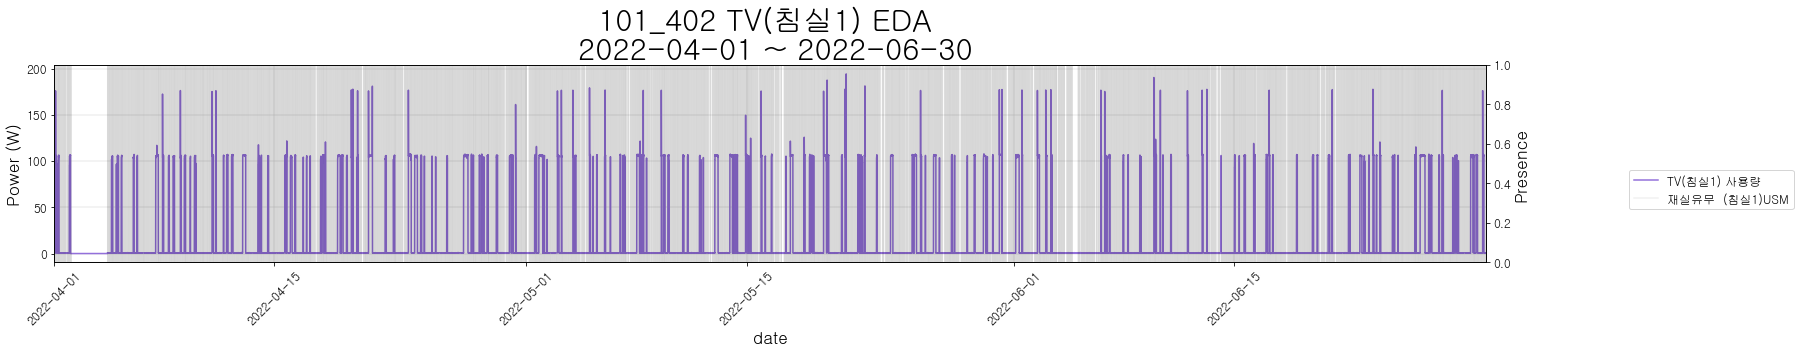

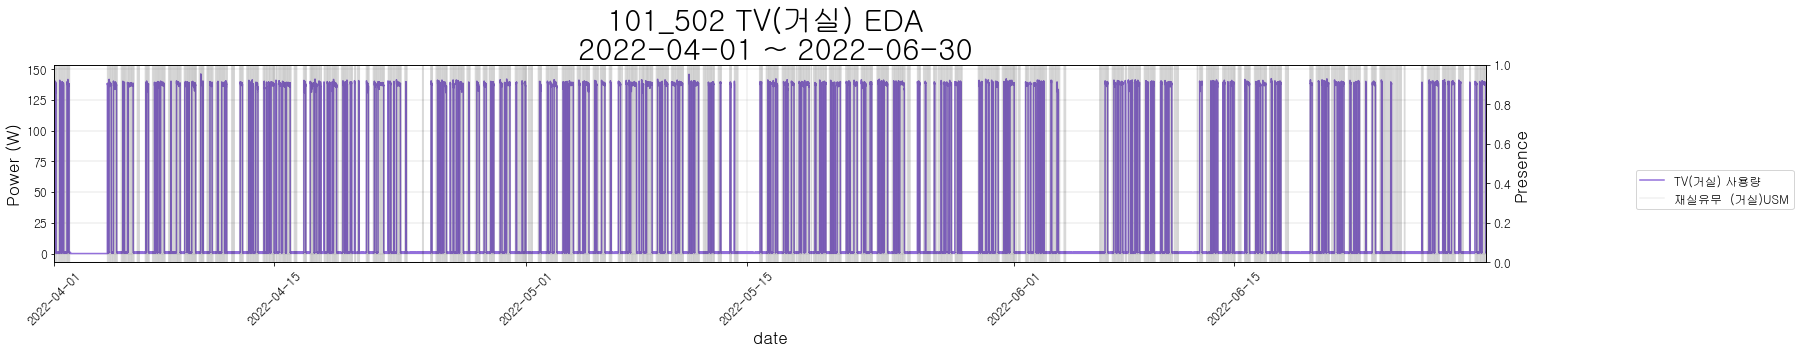

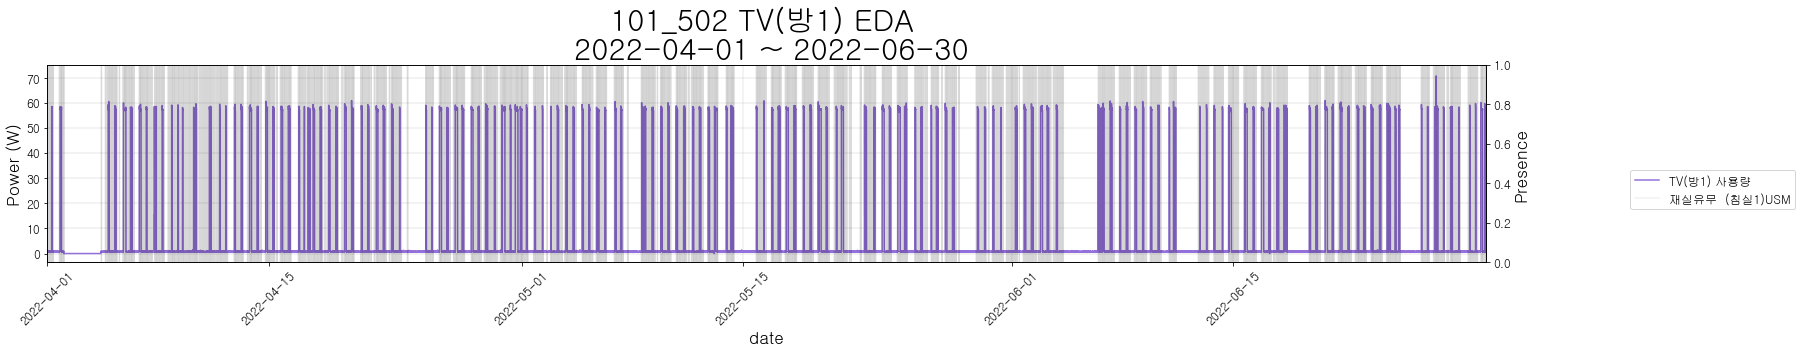

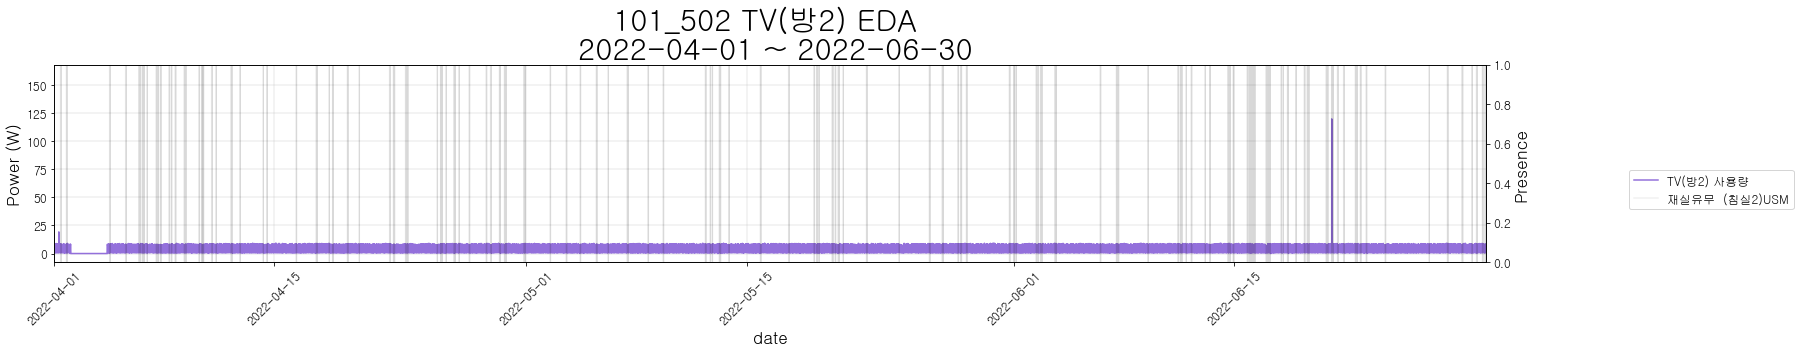

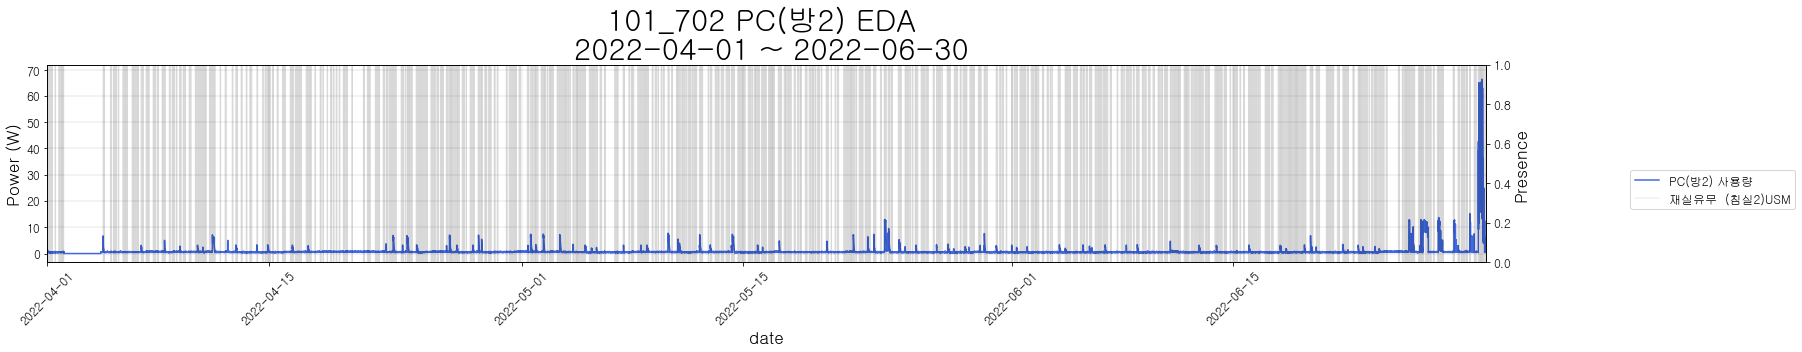

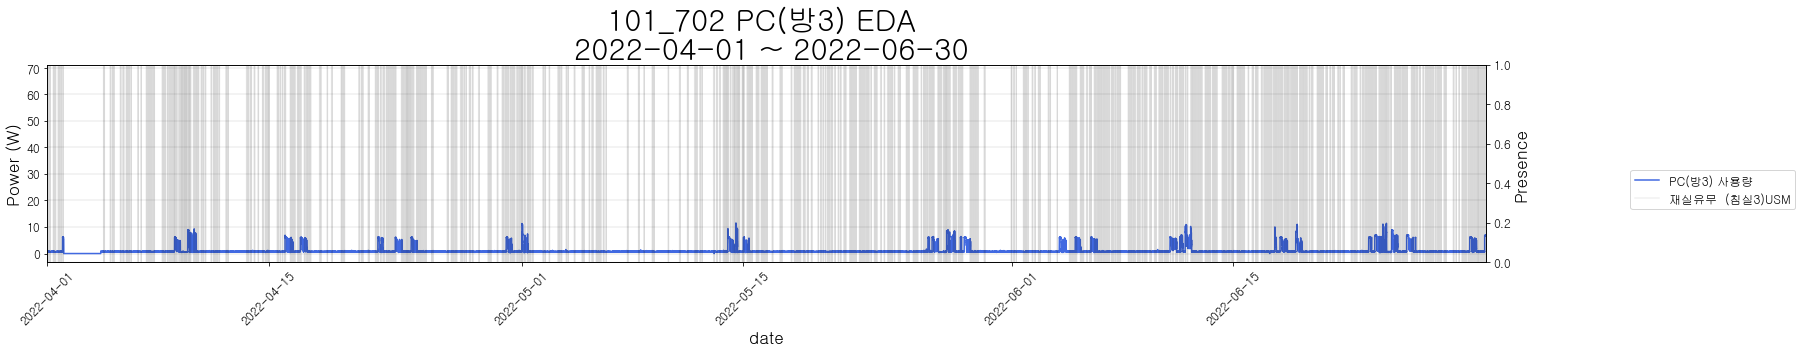

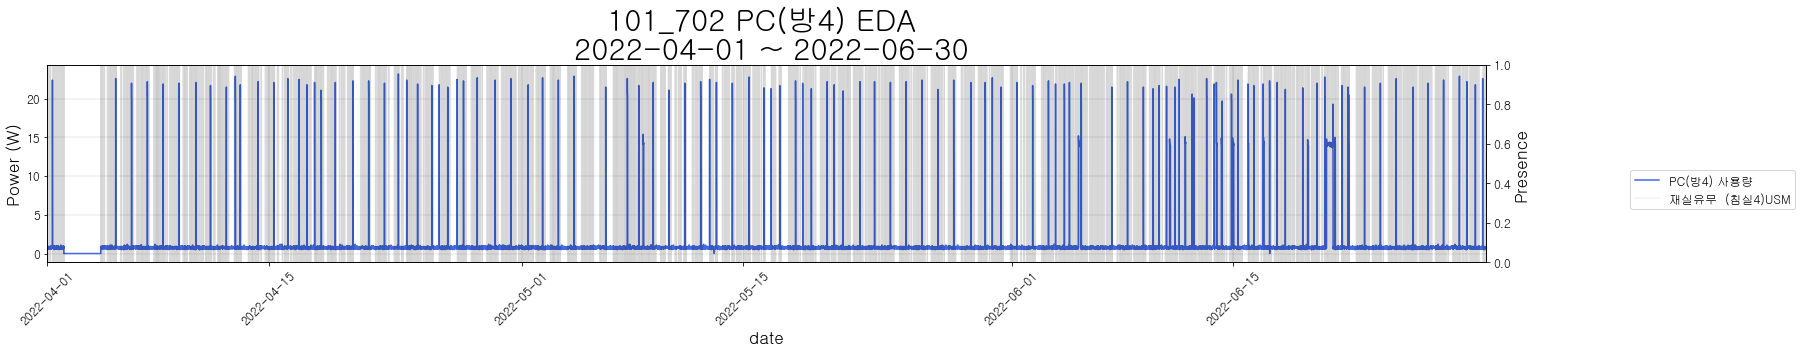

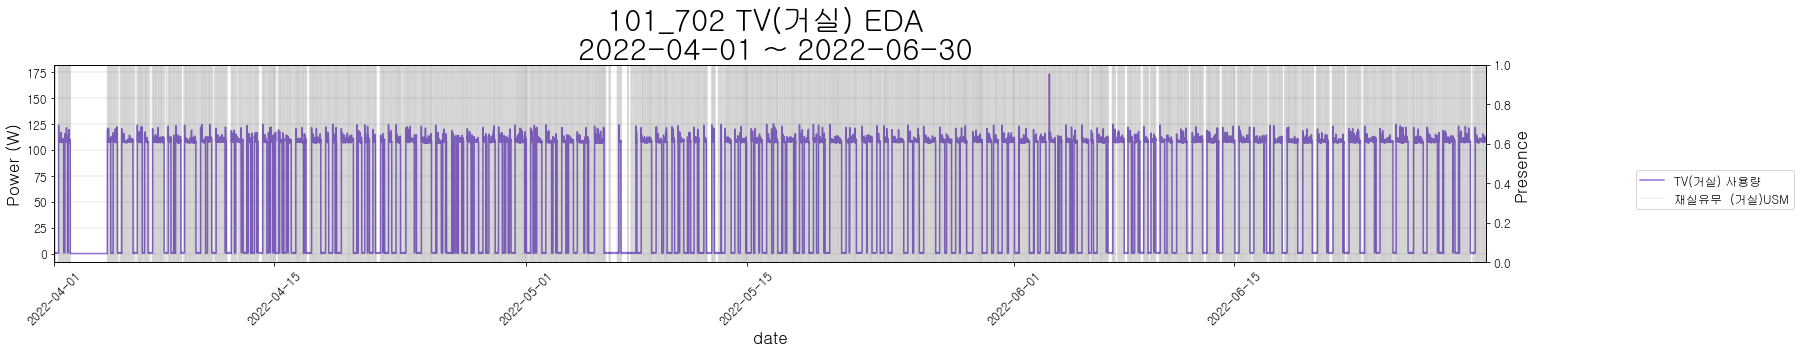

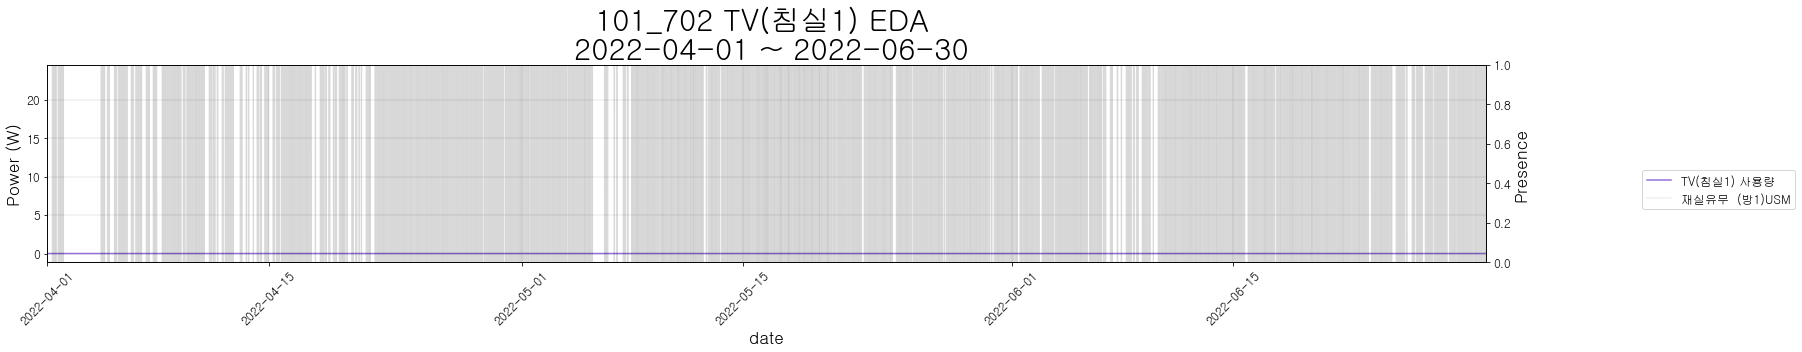

In [62]:
start_time = '2022-04-01 00:00:00'
end_time = '2022-06-30 23:59:59'
for dong,ho in dh_list:
    df_usm,df_ccm = load_df(dong,ho,60)
    # display(df_ccm)
    plot_main(dong,ho,df_usm,df_ccm,start_time,end_time)
    print("=="*300)
    print("=="*300)

PC(방2)_(W)  PC(방3)_(W)  PC(방4)_(W)  PMM(주방)_(W)  \
2021-07-01 00:00:00         0.3         8.2         0.6         18.0   
2021-07-01 00:05:00         NaN         8.1         NaN          NaN   
2021-07-01 00:10:00         NaN         NaN         0.8          NaN   
2021-07-01 00:15:00         0.4         NaN         NaN         19.0   
2021-07-01 00:20:00         NaN         NaN         NaN          NaN   
...                         ...         ...         ...          ...   
2022-06-30 20:30:00         NaN         NaN         NaN          NaN   
2022-06-30 20:35:00         NaN         NaN         NaN          NaN   
2022-06-30 20:40:00         NaN         NaN         NaN          NaN   
2022-06-30 20:45:00         NaN         NaN         NaN          NaN   
2022-06-30 20:50:00         NaN         NaN         NaN          NaN   

                     TV(거실)_(W)  TV(침실1)_(W)  선풍기(방2)_(W)  세탁기(발코니2)_(W)  \
2021-07-01 00:00:00       108.1          0.8          0.7            0.6   
2021-07-01 00:05:00       108.4          0.7          NaN            NaN   
2021-07-01 00:10:00       108.5          NaN          NaN            NaN   
2021-07-01 00:15:00       106.1          NaN          NaN            NaN   
2021-07-01 00:20:00       105.9          NaN          NaN            NaN   
...                         ...          ...          ...            ...   
2022-06-30 20:30:00         NaN          NaN          NaN            NaN   
2022-06-30 20:35:00         NaN          NaN          NaN            NaN   
2022-06-30 20:40:00         NaN          NaN          NaN            NaN   
2022-06-30 20:45:00         NaN          NaN          NaN            NaN   
2022-06-30 20:50:00         NaN          NaN          NaN            NaN   

                     에어컨(거실)_(W)  에어프라이어(주방)_(W)  전기오븐(주방)_(W)  전자레인지(주방)_(W)  \
2021-07-01 00:00:00          2.0             NaN           NaN            0.7   
2021-07-01 00:05:00          1.1             NaN           NaN            1.0   
2021-07-01 00:10:00          NaN             NaN           NaN            NaN   
2021-07-01 00:15:00          2.1             NaN           NaN            NaN   
2021-07-01 00:20:00          NaN             NaN           NaN            NaN   
...                          ...             ...           ...            ...   
2022-06-30 20:30:00          NaN             NaN           NaN            NaN   
2022-06-30 20:35:00          NaN             NaN           NaN            NaN   
2022-06-30 20:40:00          NaN             NaN           NaN            NaN   
2022-06-30 20:45:00        157.2             NaN           NaN            NaN   
2022-06-30 20:50:00        169.6             NaN           NaN            NaN   

                     cummulative_power_this_month(kWh)  
2021-07-01 00:00:00                              0.000  
2021-07-01 00:05:00                                NaN  
2021-07-01 00:10:00                                NaN  
2021-07-01 00:15:00                              0.159  
2021-07-01 00:20:00                                NaN  
...                                                ...  
2022-06-30 20:30:00                            444.909  
2022-06-30 20:35:00                                NaN  
2022-06-30 20:40:00                                NaN  
2022-06-30 20:45:00                            445.151  
2022-06-30 20:50:00                                NaN  

[105083 rows x 13 columns]

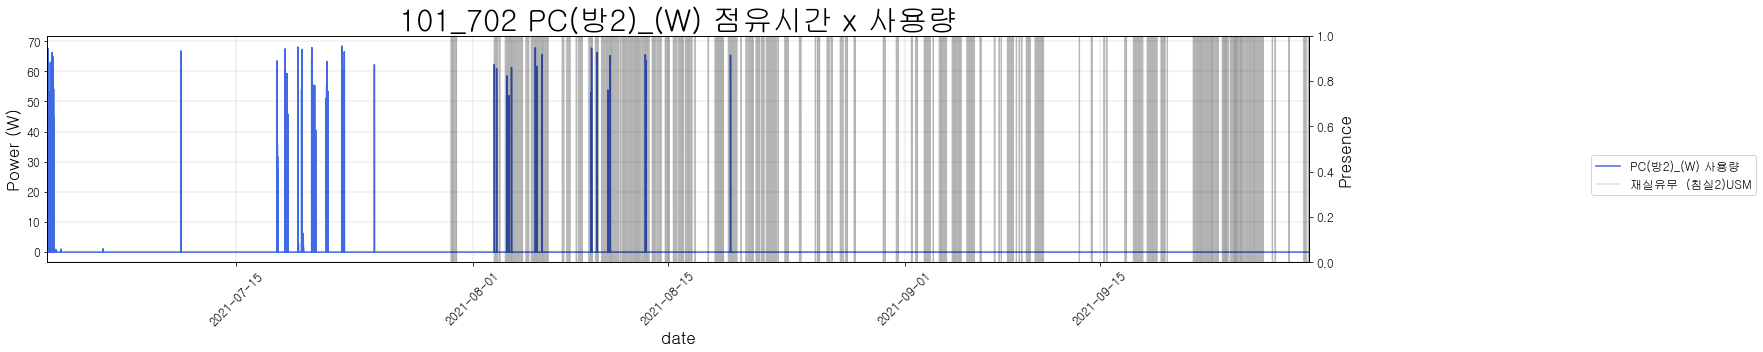

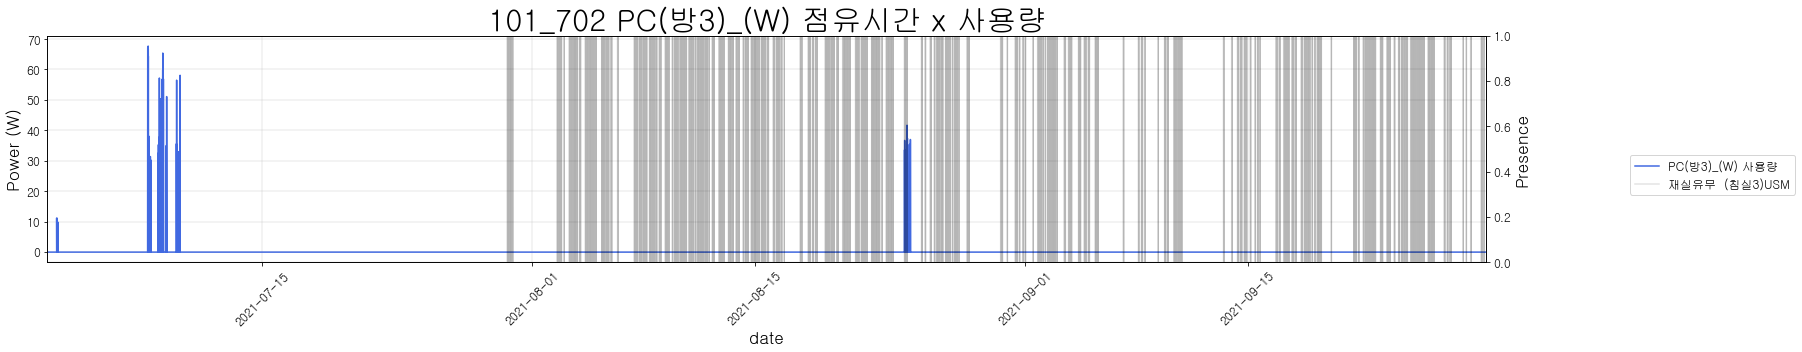

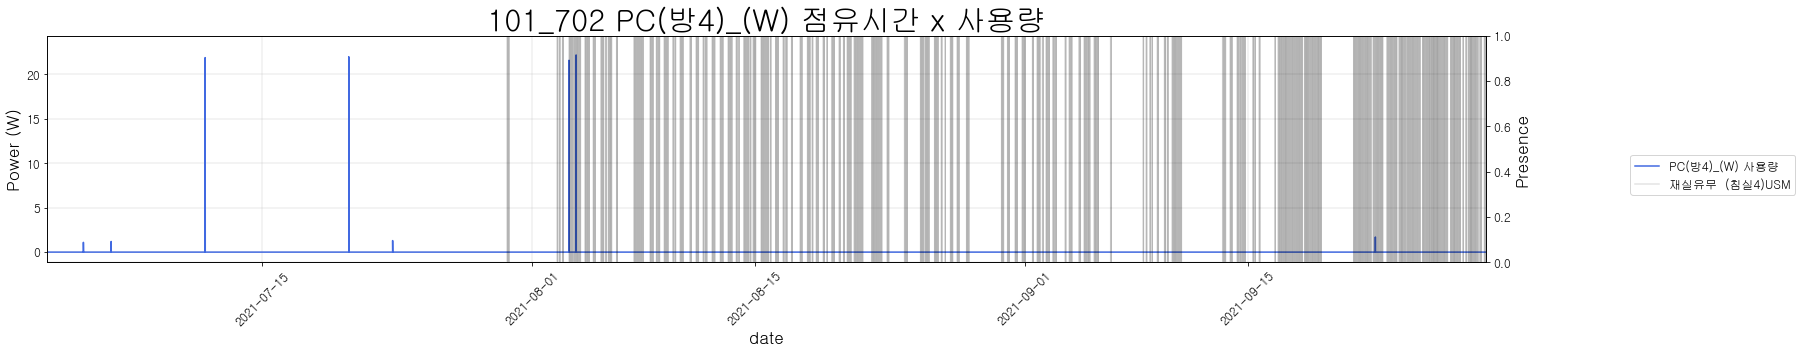

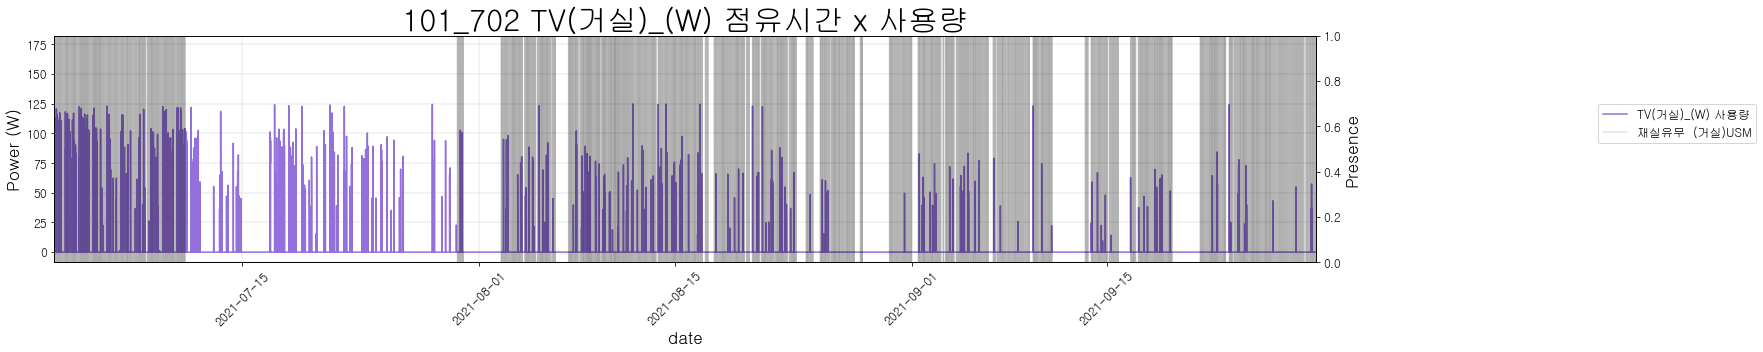

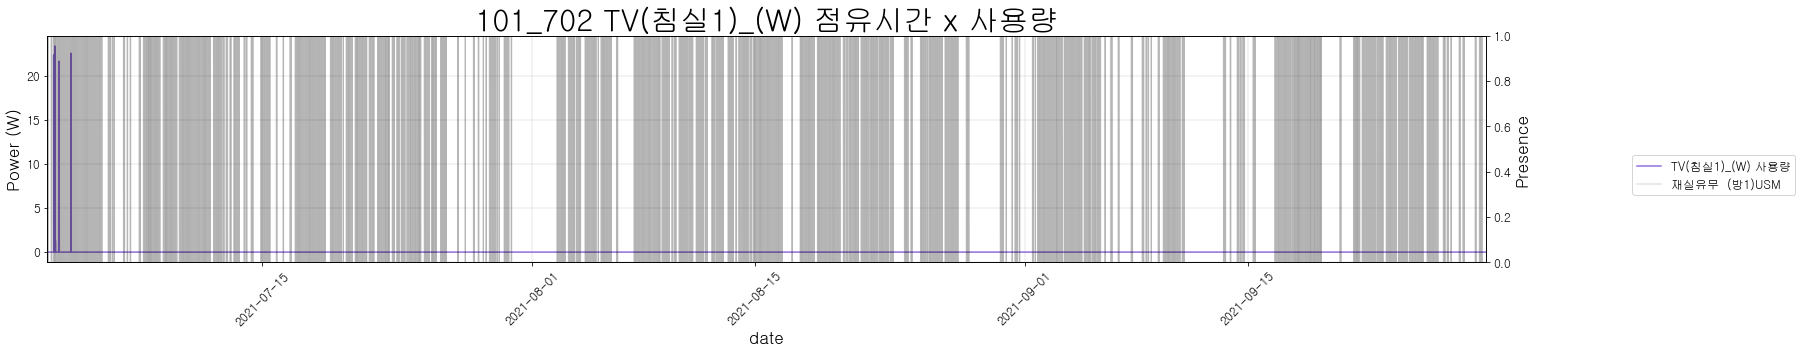

In [60]:
dong,ho = "101","702"
df_usm,df_ccm = load_df(dong,ho)
# check_match(df_usm,df_ccm)
display(df_ccm)
plot_main(dong,ho,df_usm,df_ccm,start_time,end_time)
# dh_list.append((dong,ho))

PMM(조명PMM)_(W)  TV(거실)_(W)  TV(방1)_(W)  TV(방2)_(W)  \
2021-07-01 00:00:00             NaN         0.8         0.8         0.8   
2021-07-01 00:05:00             NaN         NaN         NaN         NaN   
2021-07-01 00:10:00             NaN         NaN         NaN         NaN   
2021-07-01 00:15:00             NaN         NaN         NaN         NaN   
2021-07-01 00:20:00             NaN         NaN         NaN         NaN   
...                             ...         ...         ...         ...   
2022-06-30 19:05:00             NaN         NaN         NaN         NaN   
2022-06-30 19:10:00             NaN         NaN         NaN         NaN   
2022-06-30 19:15:00             NaN         NaN         NaN         NaN   
2022-06-30 19:20:00             NaN         NaN         NaN         NaN   
2022-06-30 19:25:00             NaN        63.2         NaN         NaN   

                     공기청정기(거실)_(W)  밥솥(주방)_(W)  세탁기(발코니2)_(W)  에어컨(거실)_(W)  \
2021-07-01 00:00:00            0.4        84.7            0.9          0.8   
2021-07-01 00:05:00            0.6        84.0            NaN          0.9   
2021-07-01 00:10:00            NaN        84.9            0.6          NaN   
2021-07-01 00:15:00            0.5       752.0            NaN          NaN   
2021-07-01 00:20:00            NaN        84.8            NaN          NaN   
...                            ...         ...            ...          ...   
2022-06-30 19:05:00            NaN         NaN            NaN          NaN   
2022-06-30 19:10:00            NaN         NaN            NaN          NaN   
2022-06-30 19:15:00            NaN         NaN            NaN          NaN   
2022-06-30 19:20:00            NaN         NaN            NaN          NaN   
2022-06-30 19:25:00            NaN         NaN            NaN          NaN   

                     오븐(주방)_(W)  인덕션(주방)_(W)  커피포트(주방)_(W)  \
2021-07-01 00:00:00         1.4          1.8           1.1   
2021-07-01 00:05:00         1.6          1.9           0.8   
2021-07-01 00:10:00         0.4          0.9           NaN   
2021-07-01 00:15:00         0.5          2.1           0.9   
2021-07-01 00:20:00         NaN          NaN           NaN   
...                         ...          ...           ...   
2022-06-30 19:05:00         NaN          NaN           NaN   
2022-06-30 19:10:00         NaN          NaN           NaN   
2022-06-30 19:15:00         NaN          NaN           NaN   
2022-06-30 19:20:00         NaN          NaN           NaN   
2022-06-30 19:25:00         NaN          NaN           NaN   

                     cummulative_power_this_month(kWh)  
2021-07-01 00:00:00                              0.000  
2021-07-01 00:05:00                                NaN  
2021-07-01 00:10:00                                NaN  
2021-07-01 00:15:00                              0.125  
2021-07-01 00:20:00                                NaN  
...                                                ...  
2022-06-30 19:05:00                                NaN  
2022-06-30 19:10:00                                NaN  
2022-06-30 19:15:00                            246.044  
2022-06-30 19:20:00                                NaN  
2022-06-30 19:25:00                                NaN  

[105066 rows x 12 columns]

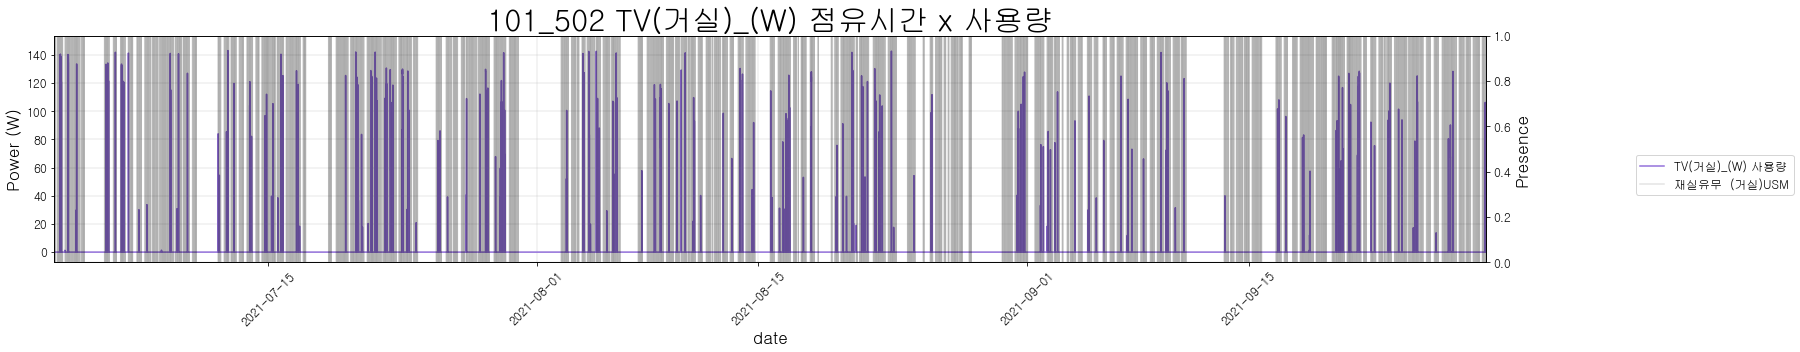

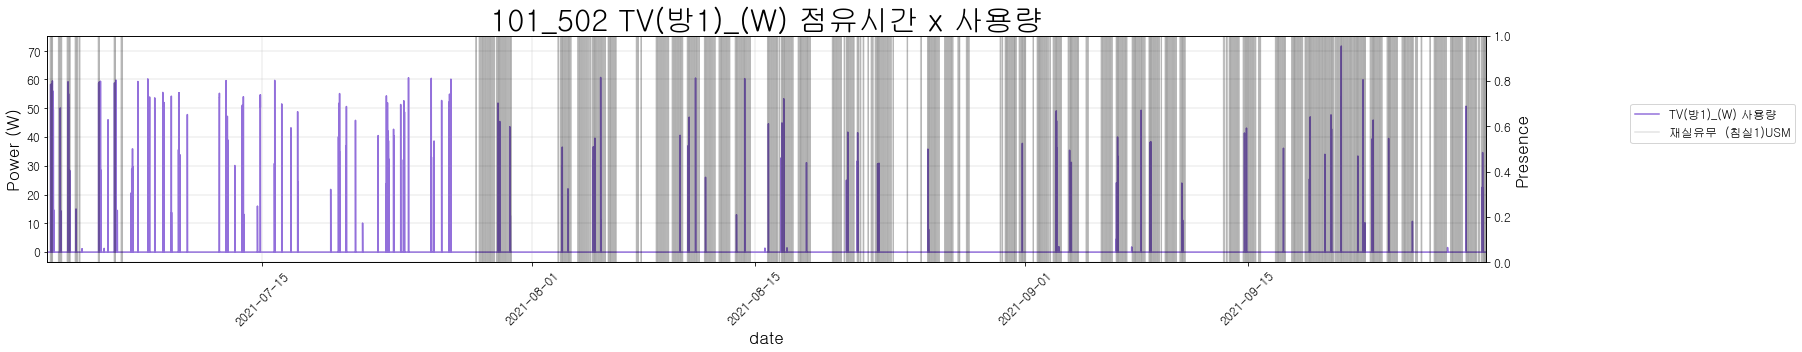

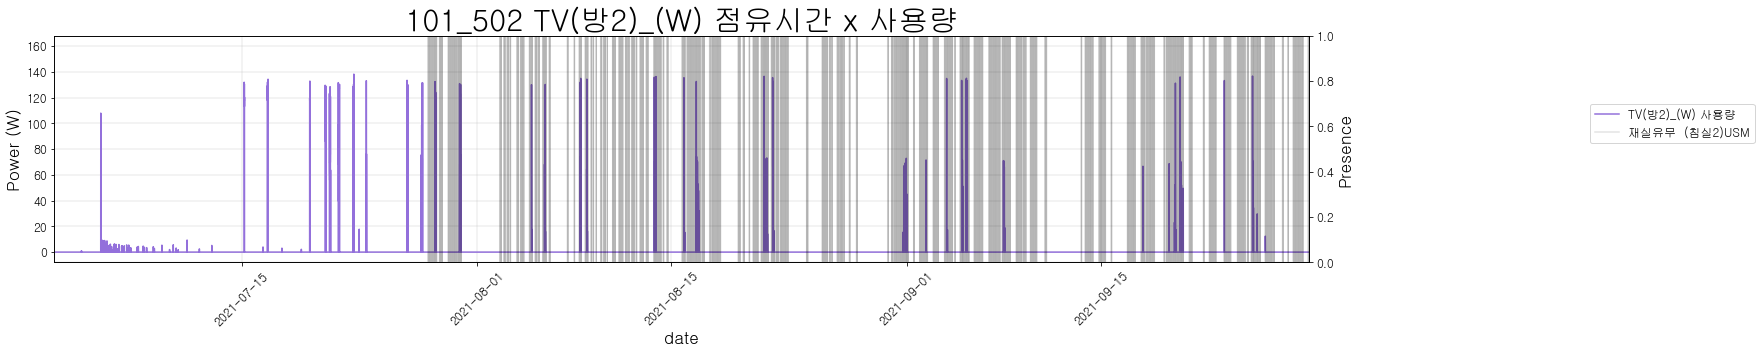

In [61]:
dong,ho = "101","502"
df_usm,df_ccm = load_df(dong,ho)
display(df_ccm)
plot_main(dong,ho,df_usm,df_ccm,start_time,end_time)
# dh_list.append((dong,ho))

PMM(조명PMM)_(W)  TV(거실)_(W)  공기청정기(거실)_(W)  노트북(침실2)_(W)  \
2021-07-01 00:00:00           696.0         0.9            NaN           NaN   
2021-07-01 00:05:00           682.0         0.7            NaN           NaN   
2021-07-01 00:10:00           314.0         1.5            NaN           NaN   
2021-07-01 00:15:00           402.0         NaN            NaN           NaN   
2021-07-01 00:20:00           225.0         NaN            NaN           NaN   
...                             ...         ...            ...           ...   
2022-06-29 22:50:00             NaN         NaN            NaN           NaN   
2022-06-29 22:55:00             NaN         NaN            NaN           NaN   
2022-06-29 23:00:00             NaN         NaN            NaN           NaN   
2022-06-29 23:05:00             NaN         NaN            NaN           NaN   
2022-06-29 23:10:00             NaN         NaN            NaN           NaN   

                     선풍기(거실)_(W)  선풍기(침실4)_(W)  세탁기(발코니2)_(W)  \
2021-07-01 00:00:00          NaN           NaN            1.2   
2021-07-01 00:05:00          NaN           NaN            1.4   
2021-07-01 00:10:00          NaN           NaN            NaN   
2021-07-01 00:15:00          NaN           NaN            0.1   
2021-07-01 00:20:00          NaN           NaN            0.2   
...                          ...           ...            ...   
2022-06-29 22:50:00          NaN           NaN            NaN   
2022-06-29 22:55:00          NaN           NaN            NaN   
2022-06-29 23:00:00          NaN           NaN            NaN   
2022-06-29 23:05:00          NaN           NaN            NaN   
2022-06-29 23:10:00          NaN           NaN            NaN   

                     세탁기_건조기(주방)_(W)  셋톱박스(거실)_(W)  에어컨(거실)_(W)  \
2021-07-01 00:00:00              0.7           3.7          1.5   
2021-07-01 00:05:00              0.9           3.6          1.6   
2021-07-01 00:10:00              1.1           NaN          NaN   
2021-07-01 00:15:00              NaN           NaN          NaN   
2021-07-01 00:20:00              NaN           NaN          NaN   
...                              ...           ...          ...   
2022-06-29 22:50:00              NaN           NaN          NaN   
2022-06-29 22:55:00              NaN           NaN          NaN   
2022-06-29 23:00:00              NaN           NaN          NaN   
2022-06-29 23:05:00              NaN           NaN          NaN   
2022-06-29 23:10:00             19.9           NaN          NaN   

                     에어프라이기(주방)_(W)  이동형에어컨(침실3)_(W)  \
2021-07-01 00:00:00             0.7              3.4   
2021-07-01 00:05:00             0.9              NaN   
2021-07-01 00:10:00             1.2              2.4   
2021-07-01 00:15:00             NaN              NaN   
2021-07-01 00:20:00             NaN              NaN   
...                             ...              ...   
2022-06-29 22:50:00             NaN              NaN   
2022-06-29 22:55:00             NaN              NaN   
2022-06-29 23:00:00             NaN              NaN   
2022-06-29 23:05:00             NaN              NaN   
2022-06-29 23:10:00             NaN              NaN   

                     cummulative_power_this_month(kWh)  
2021-07-01 00:00:00                              0.000  
2021-07-01 00:05:00                                NaN  
2021-07-01 00:10:00                                NaN  
2021-07-01 00:15:00                              0.149  
2021-07-01 00:20:00                                NaN  
...                                                ...  
2022-06-29 22:50:00                                NaN  
2022-06-29 22:55:00                                NaN  
2022-06-29 23:00:00                            449.505  
2022-06-29 23:05:00                                NaN  
2022-06-29 23:10:00                                NaN  

[104823 rows x 13 columns]

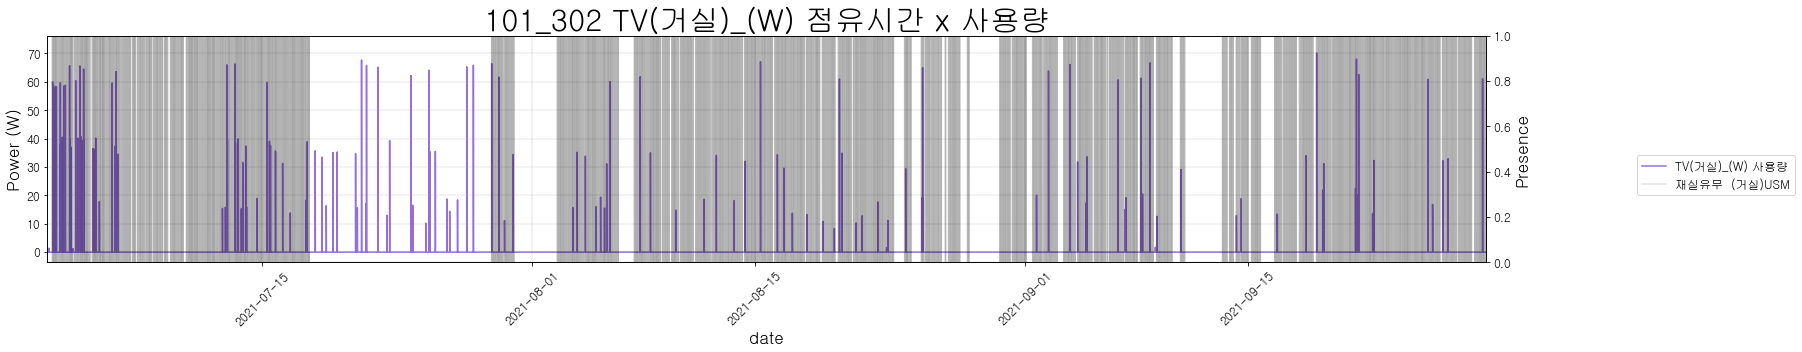

In [62]:
dong,ho = "101","302"
df_usm,df_ccm = load_df(dong,ho)
display(df_ccm)
plot_main(dong,ho,df_usm,df_ccm,start_time,end_time)
# dh_list.append((dong,ho))

PC(침실2)_(W)  PMM(조명)_(W)  TV(거실)_(W)  TV(침실1)_(W)  \
2021-07-01 00:00:00         52.9         60.0         1.0          0.7   
2021-07-01 00:05:00         54.7         66.0         0.9          NaN   
2021-07-01 00:10:00         51.1        313.0         1.1          0.8   
2021-07-01 00:15:00         57.8        308.0         1.3          NaN   
2021-07-01 00:20:00         51.6        305.0         NaN          NaN   
...                          ...          ...         ...          ...   
2022-06-30 19:55:00          NaN          NaN         NaN          NaN   
2022-06-30 20:00:00          NaN          NaN         NaN          NaN   
2022-06-30 20:05:00          NaN          NaN         NaN          NaN   
2022-06-30 20:10:00          NaN          NaN         NaN          NaN   
2022-06-30 20:15:00          NaN          NaN         NaN          NaN   

                     선풍기1(침실1)_(W)  선풍기2(침실2)_(W)  세탁기(발코니2)_(W)  에어컨(거실)_(W)  \
2021-07-01 00:00:00            0.6            0.7            0.7          4.4   
2021-07-01 00:05:00            0.0            NaN            0.8          4.5   
2021-07-01 00:10:00            NaN            0.9            0.6          3.3   
2021-07-01 00:15:00            0.8            NaN            NaN          NaN   
2021-07-01 00:20:00            0.9            1.0            NaN          NaN   
...                            ...            ...            ...          ...   
2022-06-30 19:55:00            NaN            NaN            NaN          NaN   
2022-06-30 20:00:00            NaN            NaN            NaN          NaN   
2022-06-30 20:05:00            NaN            NaN            NaN          NaN   
2022-06-30 20:10:00            NaN            NaN            NaN          NaN   
2022-06-30 20:15:00            NaN            NaN            NaN          NaN   

                     에어컨실외기(거실)_(W)  에어프라이기(주방)_(W)  전기밥솥(주방)_(W)  \
2021-07-01 00:00:00             0.8             0.3         702.3   
2021-07-01 00:05:00             0.6             0.6          85.0   
2021-07-01 00:10:00             NaN             NaN          85.5   
2021-07-01 00:15:00             NaN             NaN          85.2   
2021-07-01 00:20:00             NaN             NaN          85.6   
...                             ...             ...           ...   
2022-06-30 19:55:00             NaN             NaN           NaN   
2022-06-30 20:00:00             NaN             NaN           NaN   
2022-06-30 20:05:00             NaN             NaN           NaN   
2022-06-30 20:10:00             NaN             NaN           NaN   
2022-06-30 20:15:00             NaN             NaN         414.8   

                     전자레인지(주방)_(W)  커피포트(주방)_(W)  헤어드라이어(침실1)_(W)  \
2021-07-01 00:00:00            1.2           0.5              0.8   
2021-07-01 00:05:00            0.1           0.7              NaN   
2021-07-01 00:10:00            0.3           0.6              NaN   
2021-07-01 00:15:00            0.2           NaN              NaN   
2021-07-01 00:20:00            0.0           NaN              NaN   
...                            ...           ...              ...   
2022-06-30 19:55:00            NaN           NaN              NaN   
2022-06-30 20:00:00            NaN           NaN              NaN   
2022-06-30 20:05:00            NaN           NaN              NaN   
2022-06-30 20:10:00            NaN           NaN              NaN   
2022-06-30 20:15:00            NaN           NaN              NaN   

                     cummulative_power_this_month(kWh)  
2021-07-01 00:00:00                              0.000  
2021-07-01 00:05:00                                NaN  
2021-07-01 00:10:00                                NaN  
2021-07-01 00:15:00                              0.090  
2021-07-01 00:20:00                                NaN  
...                                                ...  
2022-06-30 19:55:00                                NaN  
2022-06-30 20:00:00                          

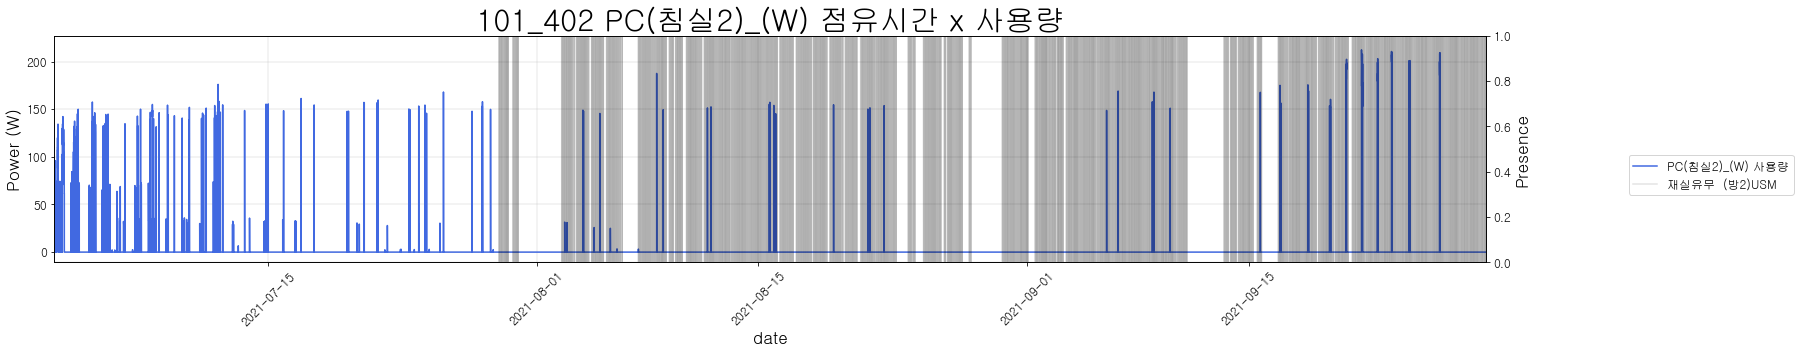

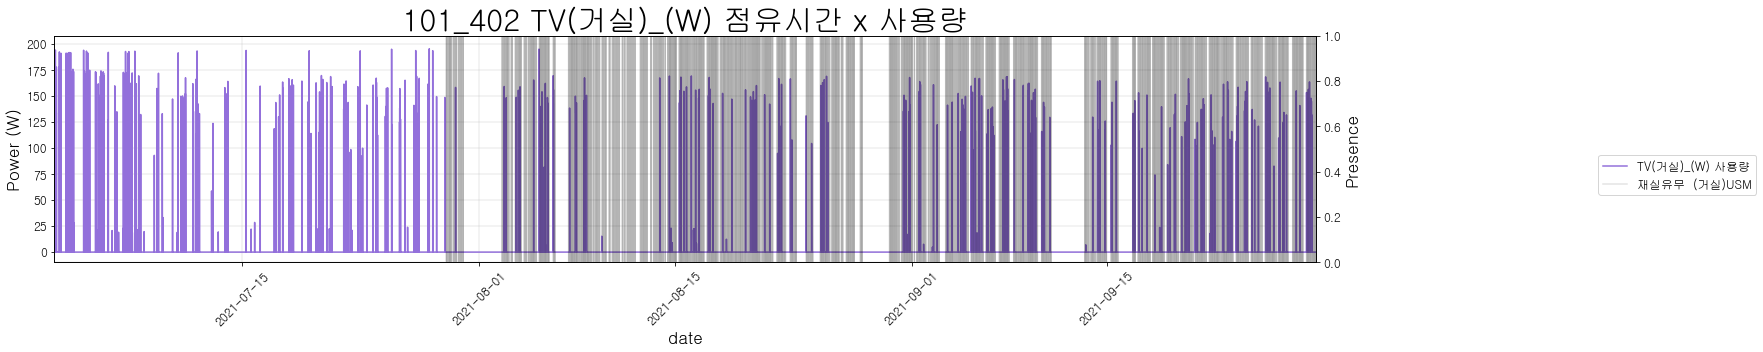

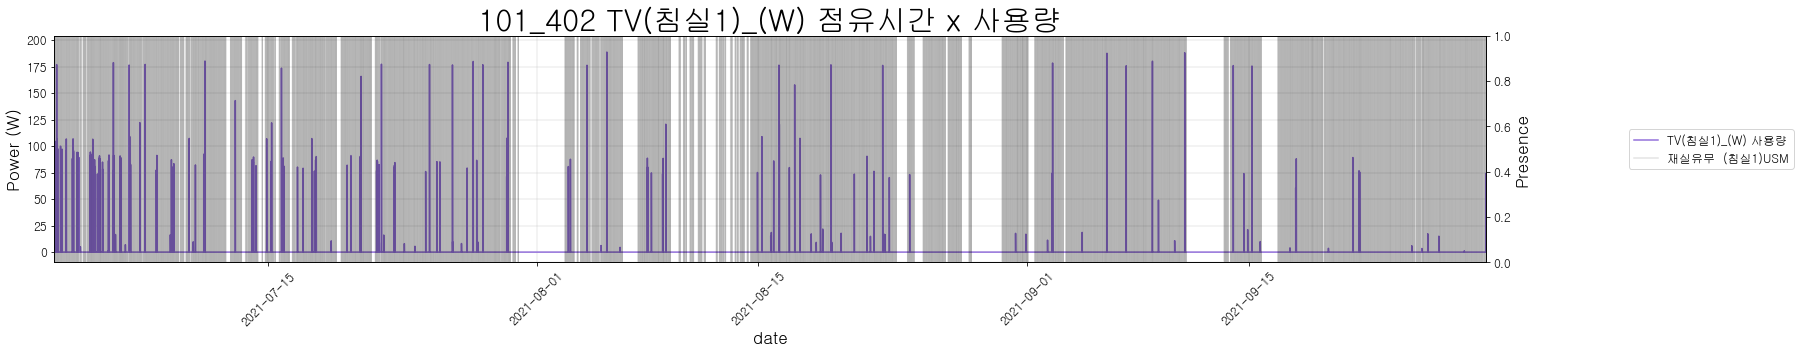

In [63]:
dong,ho = "101","402"
df_usm,df_ccm = load_df(dong,ho)
display(df_ccm)
plot_main(dong,ho,df_usm,df_ccm,start_time,end_time)
# dh_list.append((dong,ho))

PMM(분전함)_(W)  TV(거실)_(W)  TV(침실1)_(W)  세탁기(발코니)_(W)  \
2021-07-01 00:00:00         107.0         2.5          2.1           2.5   
2021-07-01 00:05:00           7.0         NaN          2.2           NaN   
2021-07-01 00:10:00           NaN         NaN          1.9           NaN   
2021-07-01 00:15:00          44.0         NaN          2.3           NaN   
2021-07-01 00:20:00           NaN         2.4          NaN           NaN   
...                           ...         ...          ...           ...   
2022-06-29 22:30:00           NaN         NaN          NaN           NaN   
2022-06-29 22:35:00           NaN         NaN          NaN           NaN   
2022-06-29 22:40:00           NaN         NaN          NaN           NaN   
2022-06-29 22:45:00           NaN         NaN          NaN           NaN   
2022-06-29 22:50:00           NaN         NaN         10.0           NaN   

                     에어컨(거실)_(W)  cummulative_power_this_month(kWh)  
2021-07-01 00:00:00          2.3                              0.000  
2021-07-01 00:05:00          2.6                                NaN  
2021-07-01 00:10:00          2.4                                NaN  
2021-07-01 00:15:00          2.5                              0.244  
2021-07-01 00:20:00          1.7                                NaN  
...                          ...                                ...  
2022-06-29 22:30:00          NaN                            562.093  
2022-06-29 22:35:00          NaN                                NaN  
2022-06-29 22:40:00          NaN                                NaN  
2022-06-29 22:45:00          NaN                            562.844  
2022-06-29 22:50:00          NaN                                NaN  

[104819 rows x 6 columns]

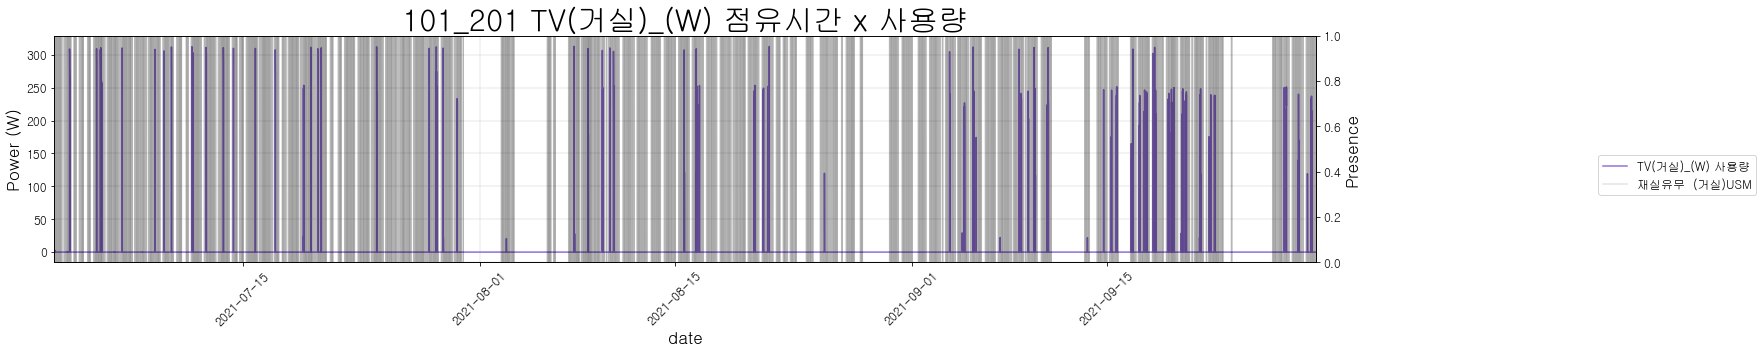

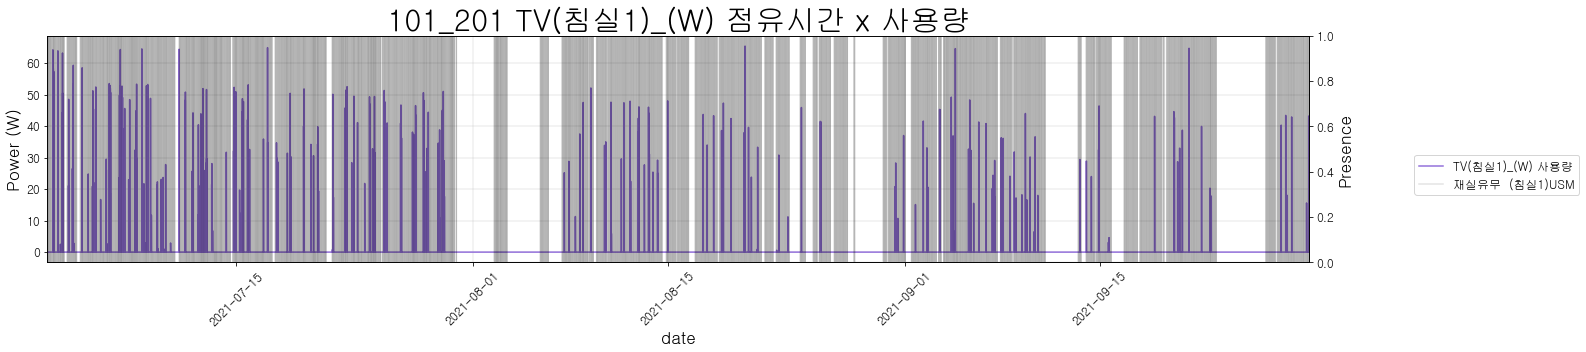

In [65]:
dong,ho = "101","201"
df_usm,df_ccm = load_df(dong,ho)
display(df_ccm)
plot_main(dong,ho,df_usm,df_ccm,start_time,end_time)
# dh_list.append((dong,ho))

PC(침실2)_(W)  PC(침실3)_(W)  PMM(식당)_(W)  TV(거실)_(W)  \
2021-07-01 00:00:00          0.7          5.9        108.0        88.4   
2021-07-01 00:05:00          0.5          3.5        142.0        87.9   
2021-07-01 00:10:00          0.9          6.5          NaN        85.7   
2021-07-01 00:15:00          NaN          3.7          NaN        87.7   
2021-07-01 00:20:00          NaN          4.8          NaN        84.0   
...                          ...          ...          ...         ...   
2022-06-30 20:55:00          NaN          NaN          NaN         NaN   
2022-06-30 21:00:00          NaN          NaN          NaN         NaN   
2022-06-30 21:05:00          NaN          NaN          NaN         NaN   
2022-06-30 21:10:00          NaN          NaN          NaN         NaN   
2022-06-30 21:15:00          NaN          NaN       1107.0         NaN   

                     세탁기(방2)_(W)  전기밥솥1(주방)_(W)  전기장판(침실1)_(W)  커피포트(방3)_(W)  \
2021-07-01 00:00:00          1.0         1186.6            0.5           0.9   
2021-07-01 00:05:00          1.1           94.8            0.6           0.8   
2021-07-01 00:10:00          NaN         1333.1            0.8           0.7   
2021-07-01 00:15:00          1.3         1252.6            NaN           NaN   
2021-07-01 00:20:00          NaN           95.8            NaN           0.0   
...                          ...            ...            ...           ...   
2022-06-30 20:55:00          NaN            NaN            NaN           NaN   
2022-06-30 21:00:00          NaN            NaN            NaN           NaN   
2022-06-30 21:05:00          NaN            NaN            NaN           NaN   
2022-06-30 21:10:00          NaN            NaN            NaN           NaN   
2022-06-30 21:15:00          NaN            NaN            NaN           NaN   

                     cummulative_power_this_month(kWh)  
2021-07-01 00:00:00                              0.000  
2021-07-01 00:05:00                                NaN  
2021-07-01 00:10:00                                NaN  
2021-07-01 00:15:00                              0.153  
2021-07-01 00:20:00                                NaN  
...                                                ...  
2022-06-30 20:55:00                                NaN  
2022-06-30 21:00:00                            409.434  
2022-06-30 21:05:00                                NaN  
2022-06-30 21:10:00                                NaN  
2022-06-30 21:15:00                            409.610  

[105088 rows x 9 columns]

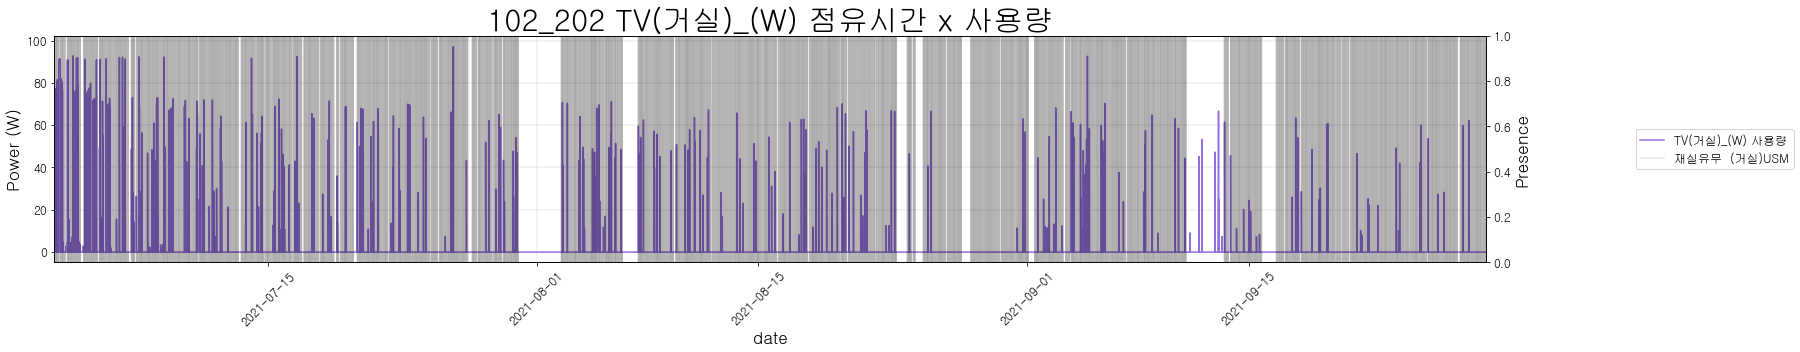

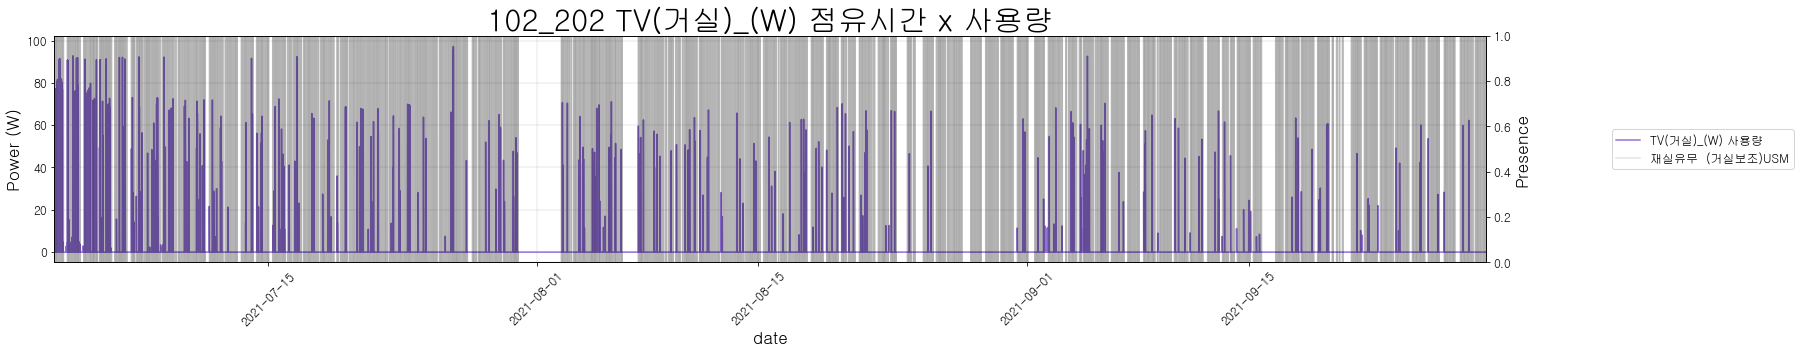

In [67]:
dong,ho = "102","202"
df_usm,df_ccm = load_df(dong,ho)
display(df_ccm)
plot_main(dong,ho,df_usm,df_ccm,start_time,end_time)
# dh_list.append((dong,ho))

PMM(주방)_(W)  TV(거실)_(W)  노트북(방1)_(W)  선풍기(거실)_(W)  \
2021-07-01 00:00:00          4.0         0.7          NaN         38.0   
2021-07-01 00:05:00          NaN         0.8          NaN         37.1   
2021-07-01 00:10:00          NaN         NaN          NaN         38.4   
2021-07-01 00:15:00          NaN         NaN          NaN          NaN   
2021-07-01 00:20:00          NaN         NaN          NaN         38.2   
...                          ...         ...          ...          ...   
2022-06-30 20:40:00          NaN         NaN          NaN          NaN   
2022-06-30 20:45:00          NaN         NaN          NaN          NaN   
2022-06-30 20:50:00          NaN         NaN          NaN          NaN   
2022-06-30 20:55:00          NaN         NaN          NaN          NaN   
2022-06-30 21:00:00          NaN         NaN          NaN          NaN   

                     선풍기(방1)_(W)  선풍기(방3)_(W)  에어컨(거실)_(W)  전기밥솥(주방)_(W)  \
2021-07-01 00:00:00         31.0          0.7          0.8          94.7   
2021-07-01 00:05:00          NaN          0.9          NaN          94.8   
2021-07-01 00:10:00         31.2          NaN          0.7          95.1   
2021-07-01 00:15:00          NaN          0.8          NaN           NaN   
2021-07-01 00:20:00         31.3          NaN          0.9         974.4   
...                          ...          ...          ...           ...   
2022-06-30 20:40:00          NaN          NaN          NaN           NaN   
2022-06-30 20:45:00          NaN          NaN          NaN           NaN   
2022-06-30 20:50:00          NaN          NaN          NaN           NaN   
2022-06-30 20:55:00          NaN          NaN          NaN           NaN   
2022-06-30 21:00:00          NaN          NaN          NaN           NaN   

                     전자레인지(주방)_(W)  cummulative_power_this_month(kWh)  
2021-07-01 00:00:00            0.8                              0.000  
2021-07-01 00:05:00            0.6                                NaN  
2021-07-01 00:10:00            NaN                                NaN  
2021-07-01 00:15:00            NaN                              0.162  
2021-07-01 00:20:00            NaN                                NaN  
...                            ...                                ...  
2022-06-30 20:40:00            NaN                                NaN  
2022-06-30 20:45:00            NaN                            367.194  
2022-06-30 20:50:00            NaN                                NaN  
2022-06-30 20:55:00            NaN                                NaN  
2022-06-30 21:00:00           25.0                            367.472  

[105085 rows x 10 columns]

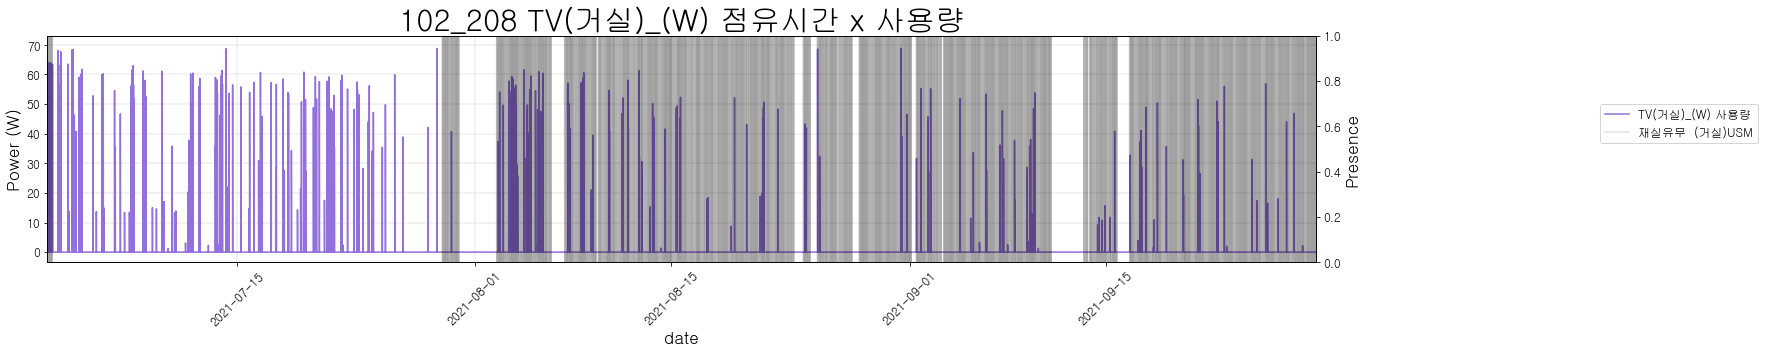

In [68]:
dong,ho = "102","208"
df_usm,df_ccm = load_df(dong,ho)
# display(df_usm)
display(df_ccm)
plot_main(dong,ho,df_usm,df_ccm,start_time,end_time)
# dh_list.append((dong,ho))

PC(방2)_(W)  TV(거실)_(W)  공기청정기(방1)_(W)  선풍기(거실)_(W)  \
2021-07-01 00:00:00        80.0         1.1            0.8          0.6   
2021-07-01 00:05:00        74.2         1.2            1.0          0.8   
2021-07-01 00:10:00        75.6         NaN            0.9          NaN   
2021-07-01 00:15:00        73.6         NaN            NaN          NaN   
2021-07-01 00:20:00        77.2         NaN            NaN          NaN   
...                         ...         ...            ...          ...   
2022-06-30 20:35:00         NaN         NaN            NaN          NaN   
2022-06-30 20:40:00         NaN         NaN            NaN          NaN   
2022-06-30 20:45:00         NaN         NaN            NaN          NaN   
2022-06-30 20:50:00         NaN         NaN            NaN          NaN   
2022-06-30 20:55:00         NaN         NaN            NaN          NaN   

                     선풍기(방2)_(W)  선풍기(침실1)_(W)  세탁기(발코니2)_(W)  에어컨(거실)_(W)  \
2021-07-01 00:00:00          3.5           NaN            0.6          1.4   
2021-07-01 00:05:00          3.4           NaN            0.7          0.7   
2021-07-01 00:10:00          NaN           NaN            0.9          1.6   
2021-07-01 00:15:00          NaN           NaN            1.0          NaN   
2021-07-01 00:20:00          NaN           NaN            NaN          1.5   
...                          ...           ...            ...          ...   
2022-06-30 20:35:00          NaN           NaN            NaN          NaN   
2022-06-30 20:40:00          NaN           NaN            NaN          NaN   
2022-06-30 20:45:00          NaN           NaN            NaN          NaN   
2022-06-30 20:50:00          NaN           NaN            NaN          NaN   
2022-06-30 20:55:00          NaN           NaN            NaN          NaN   

                     에어프라이어(부엌)_(W)  전기밥솥(주방)_(W)  전자레인지(주방)_(W)  \
2021-07-01 00:00:00             NaN           NaN            0.6   
2021-07-01 00:05:00             NaN           NaN            0.8   
2021-07-01 00:10:00             NaN           NaN            0.7   
2021-07-01 00:15:00             NaN           NaN            NaN   
2021-07-01 00:20:00             NaN           NaN            NaN   
...                             ...           ...            ...   
2022-06-30 20:35:00             NaN           NaN            NaN   
2022-06-30 20:40:00             NaN           NaN            NaN   
2022-06-30 20:45:00             NaN           NaN            NaN   
2022-06-30 20:50:00             NaN           NaN            NaN   
2022-06-30 20:55:00             NaN           NaN            NaN   

                     커피포트(주방)_(W)  cummulative_power_this_month(kWh)  
2021-07-01 00:00:00           0.7                              0.000  
2021-07-01 00:05:00           NaN                                NaN  
2021-07-01 00:10:00           0.8                                NaN  
2021-07-01 00:15:00           0.0                              0.079  
2021-07-01 00:20:00           0.9                                NaN  
...                           ...                                ...  
2022-06-30 20:35:00           NaN                                NaN  
2022-06-30 20:40:00           NaN                                NaN  
2022-06-30 20:45:00           NaN                            272.158  
2022-06-30 20:50:00           NaN                                NaN  
2022-06-30 20:55:00        1752.2                                NaN  

[105084 rows x 13 columns]

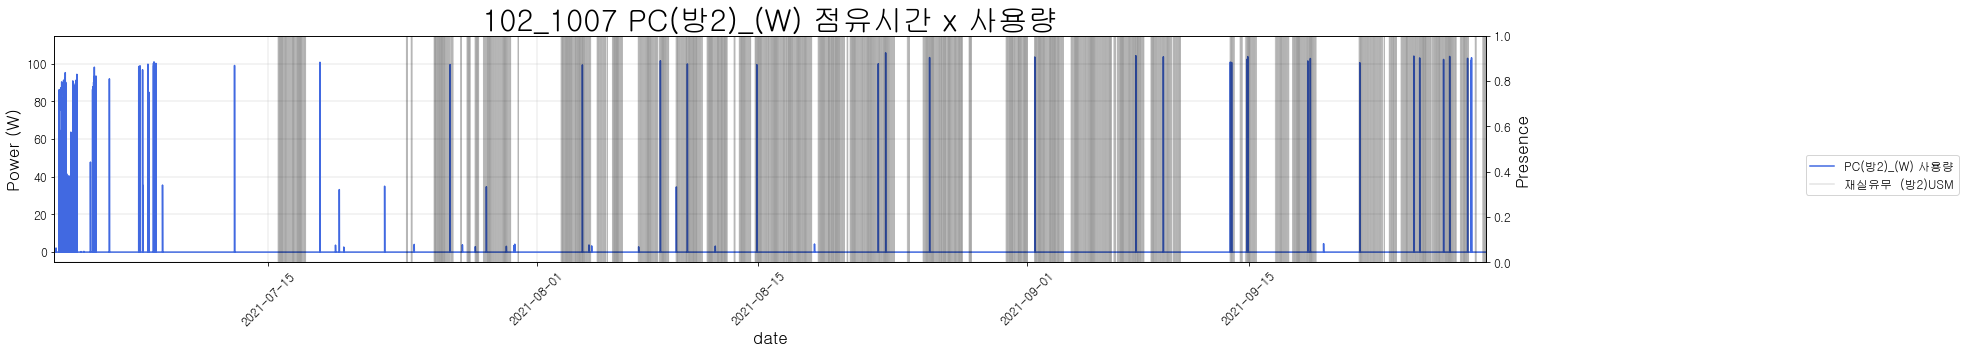

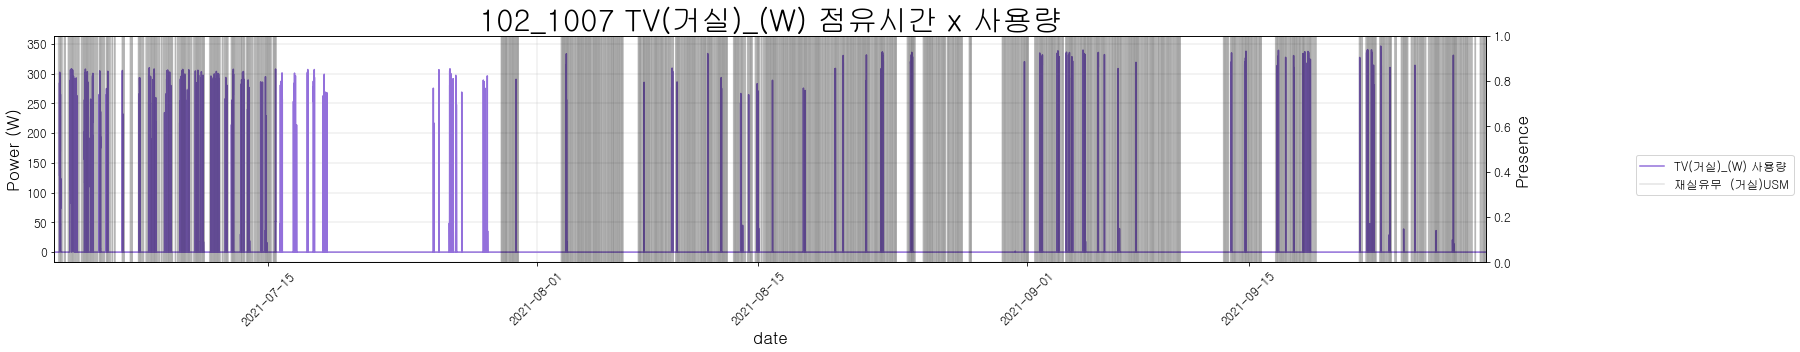

In [69]:
dong,ho = "102","1007"
df_usm,df_ccm = load_df(dong,ho)
# display(df_usm)
display(df_ccm)
plot_main(dong,ho,df_usm,df_ccm,start_time,end_time)
# dh_list.append((dong,ho))

PMM(주방)_(W)  TV(거실)_(W)  공기청정기(방1)_(W)  밥솥(주방)_(W)  \
2021-07-01 00:00:00          0.0         0.7            0.9       126.5   
2021-07-01 00:05:00          1.0         0.8            0.0       123.1   
2021-07-01 00:10:00          NaN         NaN            1.0       127.2   
2021-07-01 00:15:00          NaN         NaN            0.8         0.7   
2021-07-01 00:20:00          NaN         NaN            NaN       122.3   
...                          ...         ...            ...         ...   
2022-06-30 22:55:00          NaN         NaN            NaN         NaN   
2022-06-30 23:00:00          NaN         NaN            NaN         NaN   
2022-06-30 23:05:00          NaN         NaN            NaN         NaN   
2022-06-30 23:10:00          NaN         NaN            NaN         NaN   
2022-06-30 23:15:00          NaN         NaN            NaN         NaN   

                     세탁기(발코니2)_(W)  에어컨(거실)_(W)  커피포터(주방)_(W)  \
2021-07-01 00:00:00            0.6          NaN           0.8   
2021-07-01 00:05:00            NaN          NaN           NaN   
2021-07-01 00:10:00            NaN          NaN           0.7   
2021-07-01 00:15:00            NaN          NaN           0.9   
2021-07-01 00:20:00            1.4          NaN           NaN   
...                            ...          ...           ...   
2022-06-30 22:55:00            NaN          NaN           NaN   
2022-06-30 23:00:00            NaN          NaN           NaN   
2022-06-30 23:05:00            NaN          NaN           NaN   
2022-06-30 23:10:00            NaN          NaN           NaN   
2022-06-30 23:15:00            NaN        851.0           NaN   

                     cummulative_power_this_month(kWh)  
2021-07-01 00:00:00                              0.000  
2021-07-01 00:05:00                                NaN  
2021-07-01 00:10:00                                NaN  
2021-07-01 00:15:00                              0.118  
2021-07-01 00:20:00                                NaN  
...                                                ...  
2022-06-30 22:55:00                                NaN  
2022-06-30 23:00:00                            284.748  
2022-06-30 23:05:00                                NaN  
2022-06-30 23:10:00                                NaN  
2022-06-30 23:15:00                            284.803  

[105112 rows x 8 columns]

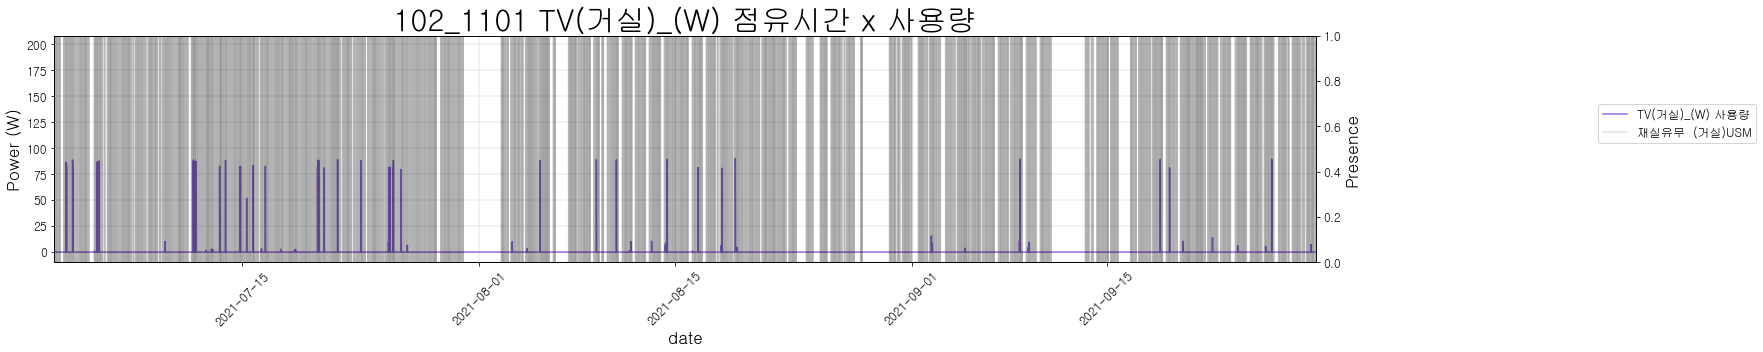

In [70]:
dong,ho = "102","1101"
df_usm,df_ccm = load_df(dong,ho)
# display(df_usm)
display(df_ccm)
plot_main(dong,ho,df_usm,df_ccm,start_time,end_time)
# dh_list.append((dong,ho))

---
---
# 2021-07-01 ~ 2021-07-02 분석

In [72]:
dh_list = [('101', '702'),
 ('101', '502'),
 ('101', '302'),
 ('101', '402'),
 ('101', '701'),
 ('101', '201'),
 ('101', '1501'),
 ('102', '202'),
 ('102', '208'),
 ('102', '1007'),
 ('102', '1101')]

PC(방2)_(W)  PC(방3)_(W)  PC(방4)_(W)  PMM(주방)_(W)  \
2021-07-01 00:00:00         0.3         8.2         0.6         18.0   
2021-07-01 00:05:00         NaN         8.1         NaN          NaN   
2021-07-01 00:10:00         NaN         NaN         0.8          NaN   
2021-07-01 00:15:00         0.4         NaN         NaN         19.0   
2021-07-01 00:20:00         NaN         NaN         NaN          NaN   
...                         ...         ...         ...          ...   
2022-06-30 20:30:00         NaN         NaN         NaN          NaN   
2022-06-30 20:35:00         NaN         NaN         NaN          NaN   
2022-06-30 20:40:00         NaN         NaN         NaN          NaN   
2022-06-30 20:45:00         NaN         NaN         NaN          NaN   
2022-06-30 20:50:00         NaN         NaN         NaN          NaN   

                     TV(거실)_(W)  TV(침실1)_(W)  선풍기(방2)_(W)  세탁기(발코니2)_(W)  \
2021-07-01 00:00:00       108.1          0.8          0.7            0.6   
2021-07-01 00:05:00       108.4          0.7          NaN            NaN   
2021-07-01 00:10:00       108.5          NaN          NaN            NaN   
2021-07-01 00:15:00       106.1          NaN          NaN            NaN   
2021-07-01 00:20:00       105.9          NaN          NaN            NaN   
...                         ...          ...          ...            ...   
2022-06-30 20:30:00         NaN          NaN          NaN            NaN   
2022-06-30 20:35:00         NaN          NaN          NaN            NaN   
2022-06-30 20:40:00         NaN          NaN          NaN            NaN   
2022-06-30 20:45:00         NaN          NaN          NaN            NaN   
2022-06-30 20:50:00         NaN          NaN          NaN            NaN   

                     에어컨(거실)_(W)  에어프라이어(주방)_(W)  전기오븐(주방)_(W)  전자레인지(주방)_(W)  \
2021-07-01 00:00:00          2.0             NaN           NaN            0.7   
2021-07-01 00:05:00          1.1             NaN           NaN            1.0   
2021-07-01 00:10:00          NaN             NaN           NaN            NaN   
2021-07-01 00:15:00          2.1             NaN           NaN            NaN   
2021-07-01 00:20:00          NaN             NaN           NaN            NaN   
...                          ...             ...           ...            ...   
2022-06-30 20:30:00          NaN             NaN           NaN            NaN   
2022-06-30 20:35:00          NaN             NaN           NaN            NaN   
2022-06-30 20:40:00          NaN             NaN           NaN            NaN   
2022-06-30 20:45:00        157.2             NaN           NaN            NaN   
2022-06-30 20:50:00        169.6             NaN           NaN            NaN   

                     cummulative_power_this_month(kWh)  
2021-07-01 00:00:00                              0.000  
2021-07-01 00:05:00                                NaN  
2021-07-01 00:10:00                                NaN  
2021-07-01 00:15:00                              0.159  
2021-07-01 00:20:00                                NaN  
...                                                ...  
2022-06-30 20:30:00                            444.909  
2022-06-30 20:35:00                                NaN  
2022-06-30 20:40:00                                NaN  
2022-06-30 20:45:00                            445.151  
2022-06-30 20:50:00                                NaN  

[105083 rows x 13 columns]

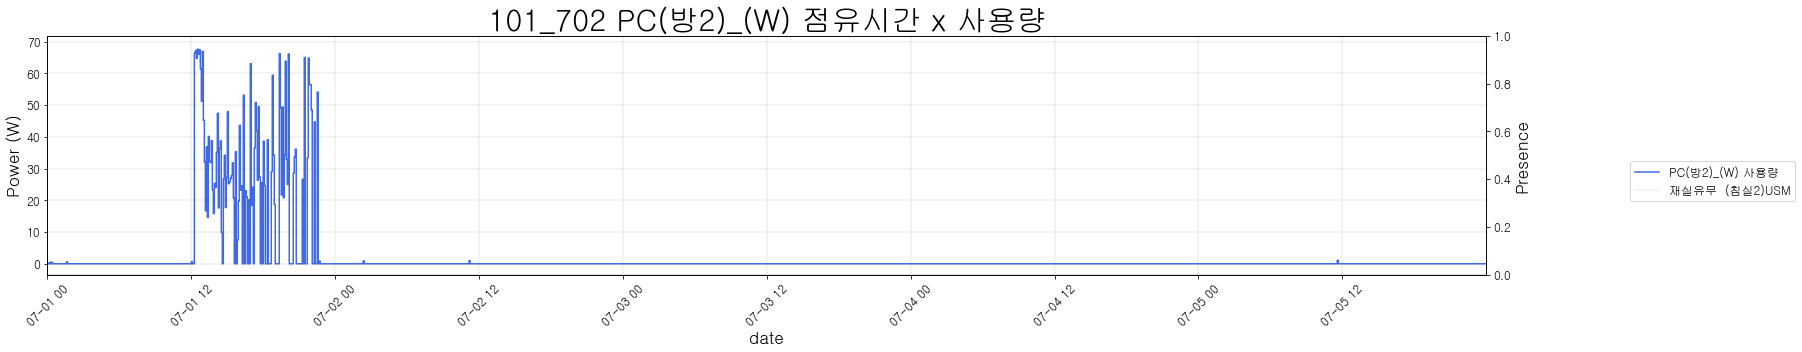

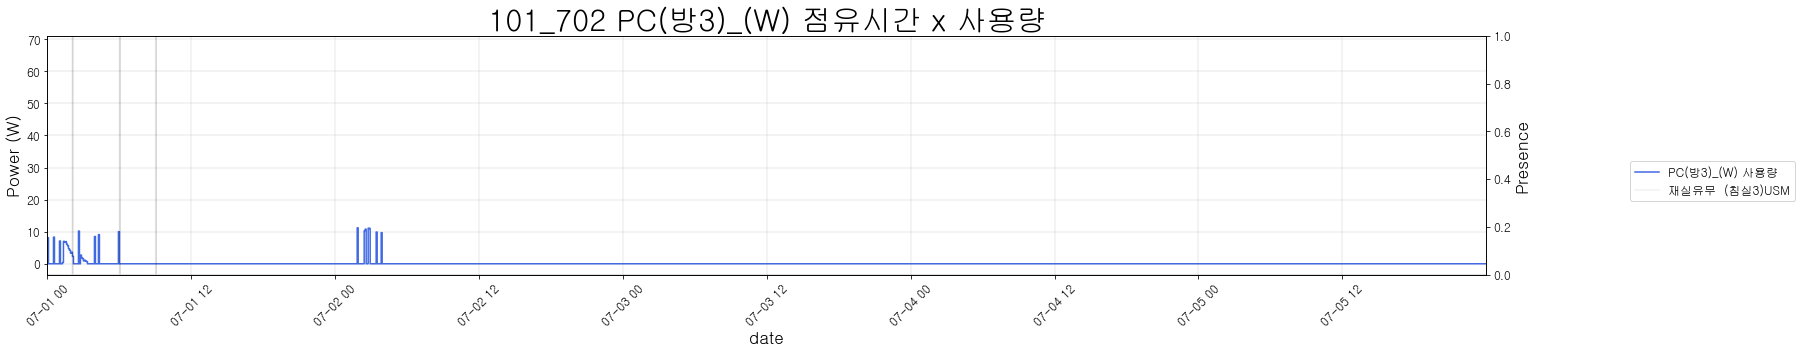

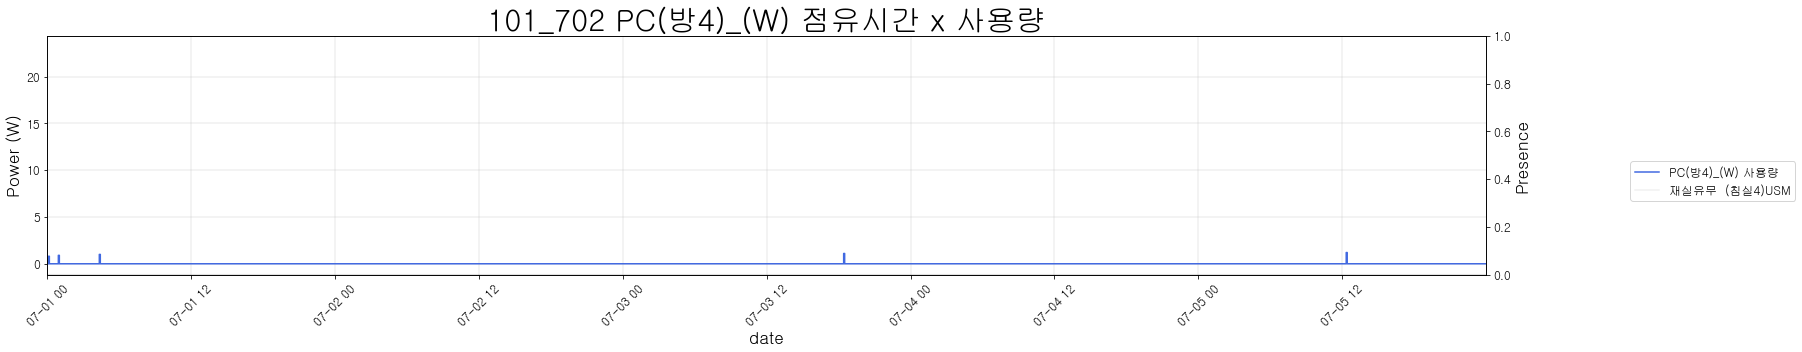

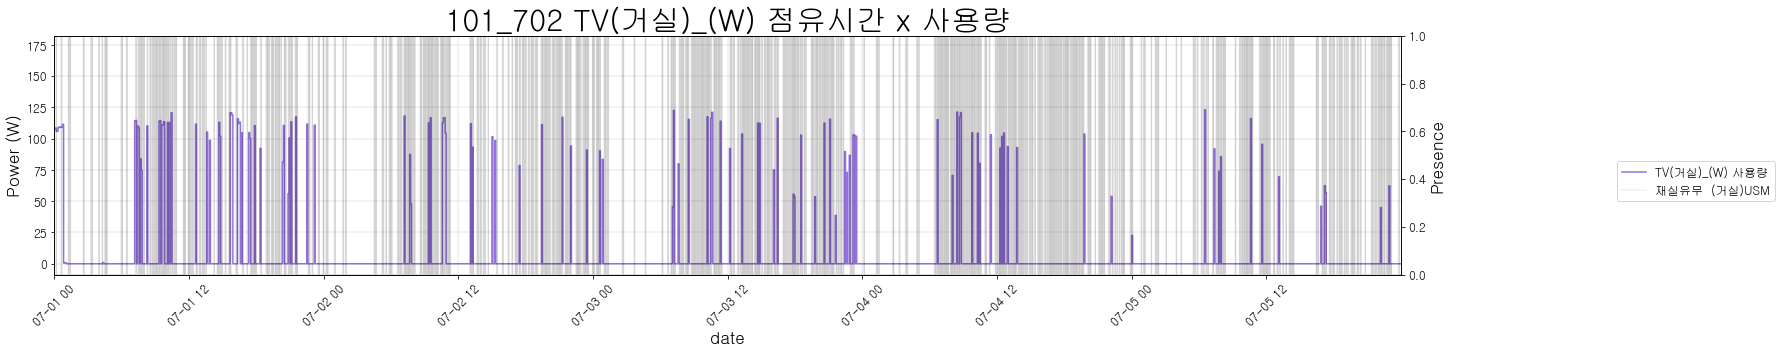

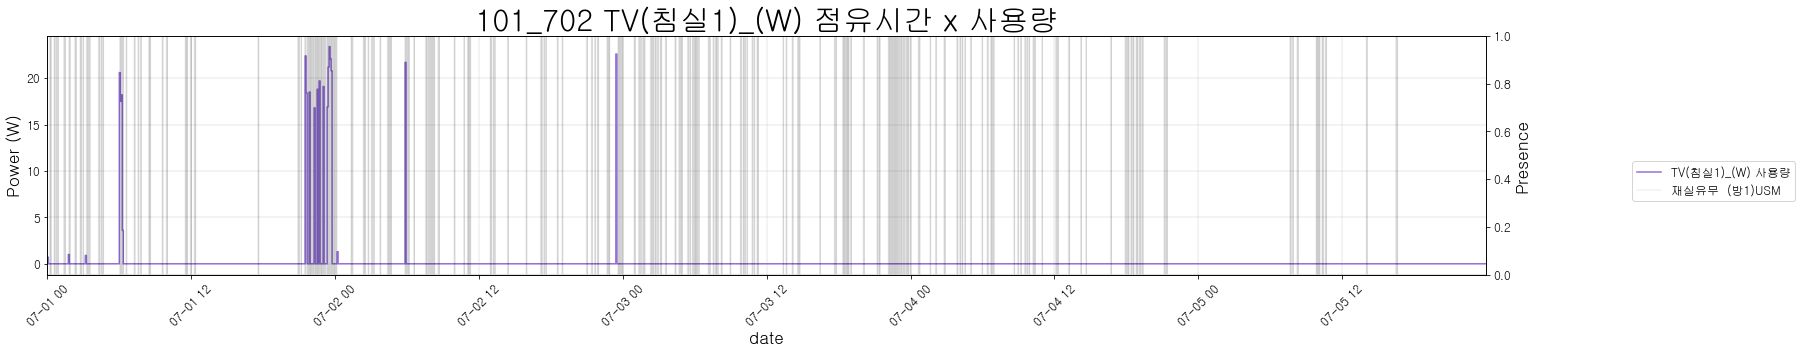

PMM(조명PMM)_(W)  TV(거실)_(W)  TV(방1)_(W)  TV(방2)_(W)  \
2021-07-01 00:00:00             NaN         0.8         0.8         0.8   
2021-07-01 00:05:00             NaN         NaN         NaN         NaN   
2021-07-01 00:10:00             NaN         NaN         NaN         NaN   
2021-07-01 00:15:00             NaN         NaN         NaN         NaN   
2021-07-01 00:20:00             NaN         NaN         NaN         NaN   
...                             ...         ...         ...         ...   
2022-06-30 19:05:00             NaN         NaN         NaN         NaN   
2022-06-30 19:10:00             NaN         NaN         NaN         NaN   
2022-06-30 19:15:00             NaN         NaN         NaN         NaN   
2022-06-30 19:20:00             NaN         NaN         NaN         NaN   
2022-06-30 19:25:00             NaN        63.2         NaN         NaN   

                     공기청정기(거실)_(W)  밥솥(주방)_(W)  세탁기(발코니2)_(W)  에어컨(거실)_(W)  \
2021-07-01 00:00:00            0.4        84.7            0.9          0.8   
2021-07-01 00:05:00            0.6        84.0            NaN          0.9   
2021-07-01 00:10:00            NaN        84.9            0.6          NaN   
2021-07-01 00:15:00            0.5       752.0            NaN          NaN   
2021-07-01 00:20:00            NaN        84.8            NaN          NaN   
...                            ...         ...            ...          ...   
2022-06-30 19:05:00            NaN         NaN            NaN          NaN   
2022-06-30 19:10:00            NaN         NaN            NaN          NaN   
2022-06-30 19:15:00            NaN         NaN            NaN          NaN   
2022-06-30 19:20:00            NaN         NaN            NaN          NaN   
2022-06-30 19:25:00            NaN         NaN            NaN          NaN   

                     오븐(주방)_(W)  인덕션(주방)_(W)  커피포트(주방)_(W)  \
2021-07-01 00:00:00         1.4          1.8           1.1   
2021-07-01 00:05:00         1.6          1.9           0.8   
2021-07-01 00:10:00         0.4          0.9           NaN   
2021-07-01 00:15:00         0.5          2.1           0.9   
2021-07-01 00:20:00         NaN          NaN           NaN   
...                         ...          ...           ...   
2022-06-30 19:05:00         NaN          NaN           NaN   
2022-06-30 19:10:00         NaN          NaN           NaN   
2022-06-30 19:15:00         NaN          NaN           NaN   
2022-06-30 19:20:00         NaN          NaN           NaN   
2022-06-30 19:25:00         NaN          NaN           NaN   

                     cummulative_power_this_month(kWh)  
2021-07-01 00:00:00                              0.000  
2021-07-01 00:05:00                                NaN  
2021-07-01 00:10:00                                NaN  
2021-07-01 00:15:00                              0.125  
2021-07-01 00:20:00                                NaN  
...                                                ...  
2022-06-30 19:05:00                                NaN  
2022-06-30 19:10:00                                NaN  
2022-06-30 19:15:00                            246.044  
2022-06-30 19:20:00                                NaN  
2022-06-30 19:25:00                                NaN  

[105066 rows x 12 columns]

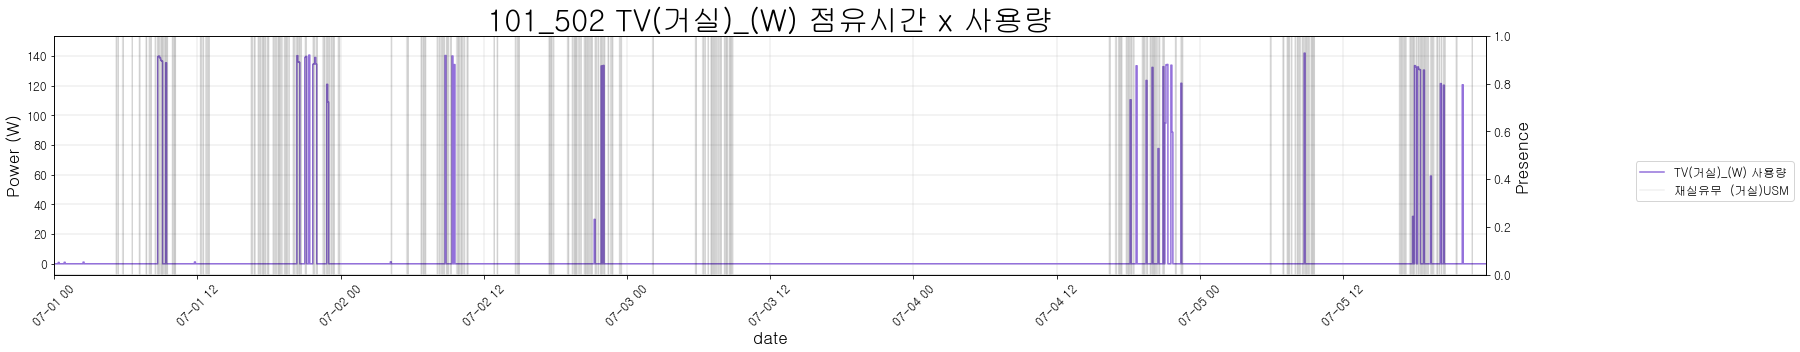

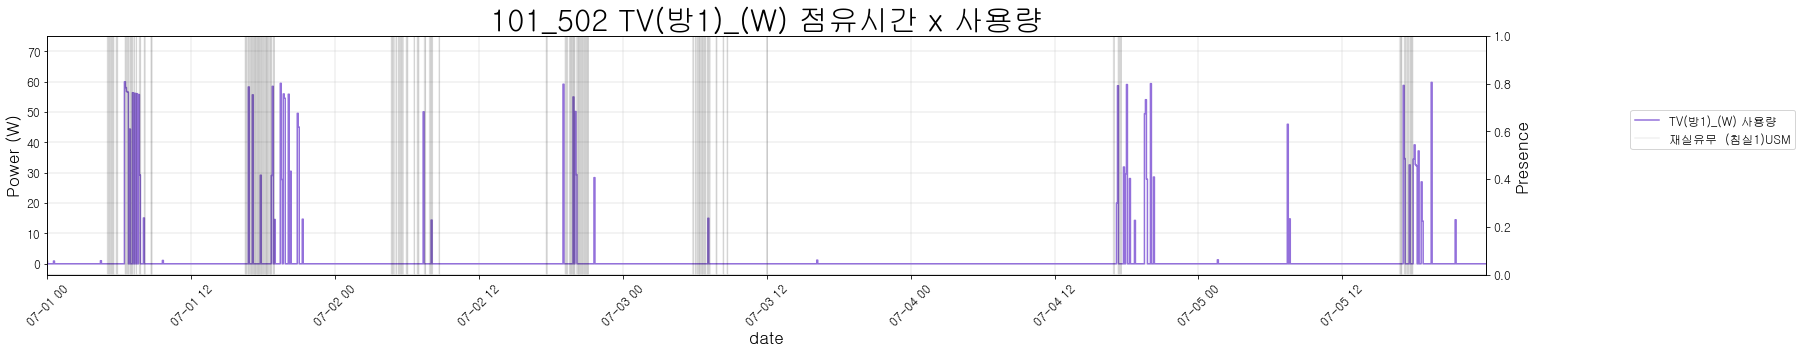

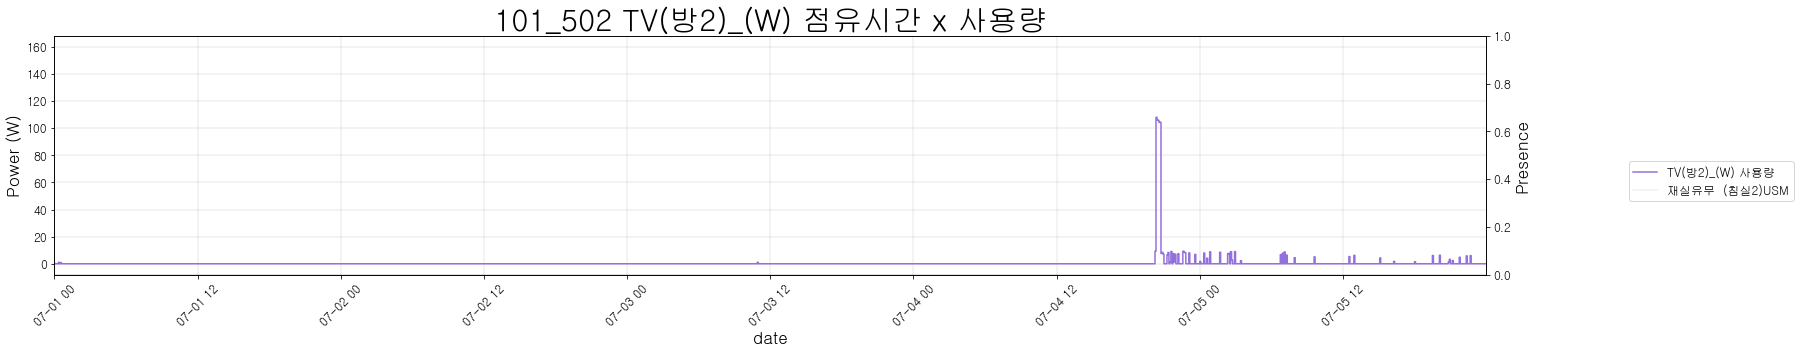

PMM(조명PMM)_(W)  TV(거실)_(W)  공기청정기(거실)_(W)  노트북(침실2)_(W)  \
2021-07-01 00:00:00           696.0         0.9            NaN           NaN   
2021-07-01 00:05:00           682.0         0.7            NaN           NaN   
2021-07-01 00:10:00           314.0         1.5            NaN           NaN   
2021-07-01 00:15:00           402.0         NaN            NaN           NaN   
2021-07-01 00:20:00           225.0         NaN            NaN           NaN   
...                             ...         ...            ...           ...   
2022-06-29 22:50:00             NaN         NaN            NaN           NaN   
2022-06-29 22:55:00             NaN         NaN            NaN           NaN   
2022-06-29 23:00:00             NaN         NaN            NaN           NaN   
2022-06-29 23:05:00             NaN         NaN            NaN           NaN   
2022-06-29 23:10:00             NaN         NaN            NaN           NaN   

                     선풍기(거실)_(W)  선풍기(침실4)_(W)  세탁기(발코니2)_(W)  \
2021-07-01 00:00:00          NaN           NaN            1.2   
2021-07-01 00:05:00          NaN           NaN            1.4   
2021-07-01 00:10:00          NaN           NaN            NaN   
2021-07-01 00:15:00          NaN           NaN            0.1   
2021-07-01 00:20:00          NaN           NaN            0.2   
...                          ...           ...            ...   
2022-06-29 22:50:00          NaN           NaN            NaN   
2022-06-29 22:55:00          NaN           NaN            NaN   
2022-06-29 23:00:00          NaN           NaN            NaN   
2022-06-29 23:05:00          NaN           NaN            NaN   
2022-06-29 23:10:00          NaN           NaN            NaN   

                     세탁기_건조기(주방)_(W)  셋톱박스(거실)_(W)  에어컨(거실)_(W)  \
2021-07-01 00:00:00              0.7           3.7          1.5   
2021-07-01 00:05:00              0.9           3.6          1.6   
2021-07-01 00:10:00              1.1           NaN          NaN   
2021-07-01 00:15:00              NaN           NaN          NaN   
2021-07-01 00:20:00              NaN           NaN          NaN   
...                              ...           ...          ...   
2022-06-29 22:50:00              NaN           NaN          NaN   
2022-06-29 22:55:00              NaN           NaN          NaN   
2022-06-29 23:00:00              NaN           NaN          NaN   
2022-06-29 23:05:00              NaN           NaN          NaN   
2022-06-29 23:10:00             19.9           NaN          NaN   

                     에어프라이기(주방)_(W)  이동형에어컨(침실3)_(W)  \
2021-07-01 00:00:00             0.7              3.4   
2021-07-01 00:05:00             0.9              NaN   
2021-07-01 00:10:00             1.2              2.4   
2021-07-01 00:15:00             NaN              NaN   
2021-07-01 00:20:00             NaN              NaN   
...                             ...              ...   
2022-06-29 22:50:00             NaN              NaN   
2022-06-29 22:55:00             NaN              NaN   
2022-06-29 23:00:00             NaN              NaN   
2022-06-29 23:05:00             NaN              NaN   
2022-06-29 23:10:00             NaN              NaN   

                     cummulative_power_this_month(kWh)  
2021-07-01 00:00:00                              0.000  
2021-07-01 00:05:00                                NaN  
2021-07-01 00:10:00                                NaN  
2021-07-01 00:15:00                              0.149  
2021-07-01 00:20:00                                NaN  
...                                                ...  
2022-06-29 22:50:00                                NaN  
2022-06-29 22:55:00                                NaN  
2022-06-29 23:00:00                            449.505  
2022-06-29 23:05:00                                NaN  
2022-06-29 23:10:00                                NaN  

[104823 rows x 13 columns]

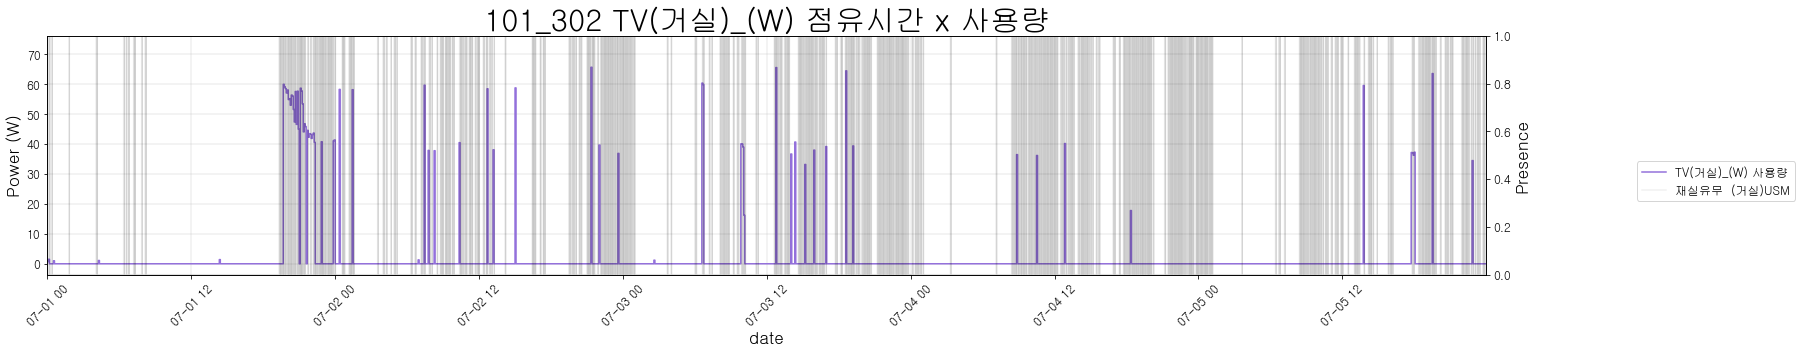

PC(침실2)_(W)  PMM(조명)_(W)  TV(거실)_(W)  TV(침실1)_(W)  \
2021-07-01 00:00:00         52.9         60.0         1.0          0.7   
2021-07-01 00:05:00         54.7         66.0         0.9          NaN   
2021-07-01 00:10:00         51.1        313.0         1.1          0.8   
2021-07-01 00:15:00         57.8        308.0         1.3          NaN   
2021-07-01 00:20:00         51.6        305.0         NaN          NaN   
...                          ...          ...         ...          ...   
2022-06-30 19:55:00          NaN          NaN         NaN          NaN   
2022-06-30 20:00:00          NaN          NaN         NaN          NaN   
2022-06-30 20:05:00          NaN          NaN         NaN          NaN   
2022-06-30 20:10:00          NaN          NaN         NaN          NaN   
2022-06-30 20:15:00          NaN          NaN         NaN          NaN   

                     선풍기1(침실1)_(W)  선풍기2(침실2)_(W)  세탁기(발코니2)_(W)  에어컨(거실)_(W)  \
2021-07-01 00:00:00            0.6            0.7            0.7          4.4   
2021-07-01 00:05:00            0.0            NaN            0.8          4.5   
2021-07-01 00:10:00            NaN            0.9            0.6          3.3   
2021-07-01 00:15:00            0.8            NaN            NaN          NaN   
2021-07-01 00:20:00            0.9            1.0            NaN          NaN   
...                            ...            ...            ...          ...   
2022-06-30 19:55:00            NaN            NaN            NaN          NaN   
2022-06-30 20:00:00            NaN            NaN            NaN          NaN   
2022-06-30 20:05:00            NaN            NaN            NaN          NaN   
2022-06-30 20:10:00            NaN            NaN            NaN          NaN   
2022-06-30 20:15:00            NaN            NaN            NaN          NaN   

                     에어컨실외기(거실)_(W)  에어프라이기(주방)_(W)  전기밥솥(주방)_(W)  \
2021-07-01 00:00:00             0.8             0.3         702.3   
2021-07-01 00:05:00             0.6             0.6          85.0   
2021-07-01 00:10:00             NaN             NaN          85.5   
2021-07-01 00:15:00             NaN             NaN          85.2   
2021-07-01 00:20:00             NaN             NaN          85.6   
...                             ...             ...           ...   
2022-06-30 19:55:00             NaN             NaN           NaN   
2022-06-30 20:00:00             NaN             NaN           NaN   
2022-06-30 20:05:00             NaN             NaN           NaN   
2022-06-30 20:10:00             NaN             NaN           NaN   
2022-06-30 20:15:00             NaN             NaN         414.8   

                     전자레인지(주방)_(W)  커피포트(주방)_(W)  헤어드라이어(침실1)_(W)  \
2021-07-01 00:00:00            1.2           0.5              0.8   
2021-07-01 00:05:00            0.1           0.7              NaN   
2021-07-01 00:10:00            0.3           0.6              NaN   
2021-07-01 00:15:00            0.2           NaN              NaN   
2021-07-01 00:20:00            0.0           NaN              NaN   
...                            ...           ...              ...   
2022-06-30 19:55:00            NaN           NaN              NaN   
2022-06-30 20:00:00            NaN           NaN              NaN   
2022-06-30 20:05:00            NaN           NaN              NaN   
2022-06-30 20:10:00            NaN           NaN              NaN   
2022-06-30 20:15:00            NaN           NaN              NaN   

                     cummulative_power_this_month(kWh)  
2021-07-01 00:00:00                              0.000  
2021-07-01 00:05:00                                NaN  
2021-07-01 00:10:00                                NaN  
2021-07-01 00:15:00                              0.090  
2021-07-01 00:20:00                                NaN  
...                                                ...  
2022-06-30 19:55:00                                NaN  
2022-06-30 20:00:00                          

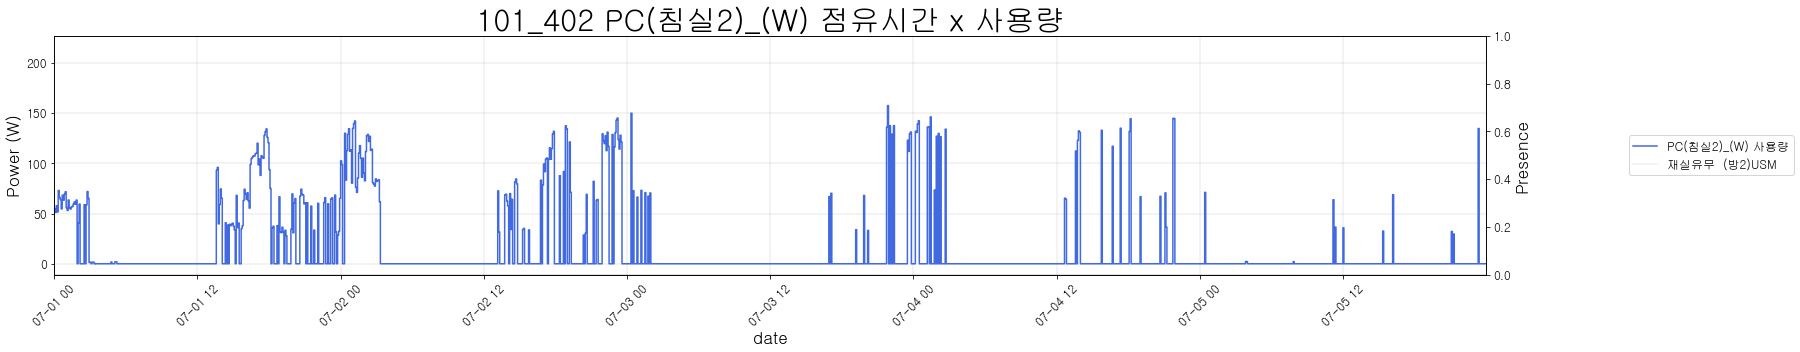

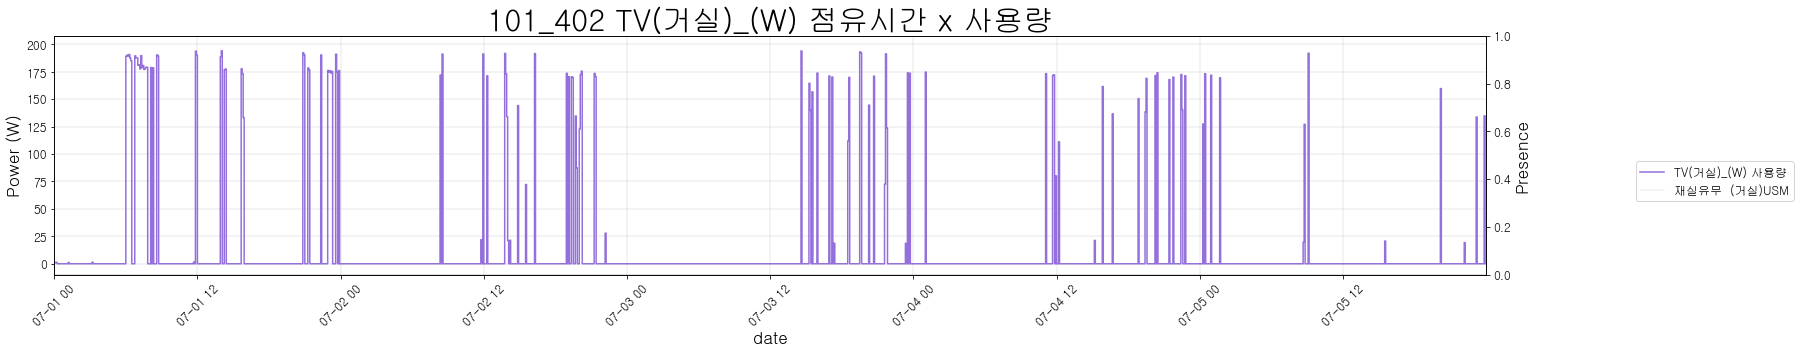

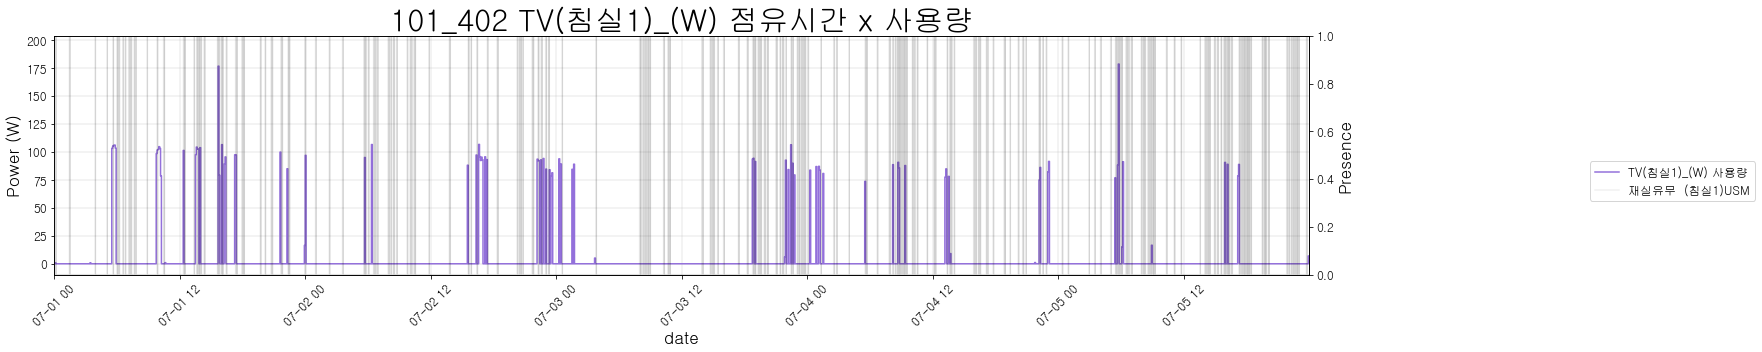

세탁기(발코니2)_(W)  에어컨(거실)_(W)  커피포트(주방)_(W)  \
2021-07-05 09:55:00            0.7          NaN           NaN   
2021-07-05 10:00:00            1.3          NaN           NaN   
2021-07-05 10:05:00            0.1          NaN           NaN   
2021-07-05 10:10:00            1.0          NaN           NaN   
2021-07-05 10:15:00            NaN          NaN           NaN   
...                            ...          ...           ...   
2022-06-28 14:15:00            NaN          NaN           NaN   
2022-06-28 14:20:00            NaN          NaN           NaN   
2022-06-28 14:25:00            NaN          NaN           NaN   
2022-06-28 14:30:00            NaN          NaN           NaN   
2022-06-28 14:35:00            NaN          NaN        1586.5   

                     cummulative_power_this_month(kWh)  
2021-07-05 09:55:00                                NaN  
2021-07-05 10:00:00                             43.635  
2021-07-05 10:05:00                                NaN  
2021-07-05 10:10:00                                NaN  
2021-07-05 10:15:00                             43.768  
...                                                ...  
2022-06-28 14:15:00                            246.828  
2022-06-28 14:20:00                                NaN  
2022-06-28 14:25:00                                NaN  
2022-06-28 14:30:00                            247.338  
2022-06-28 14:35:00                                NaN  

[103161 rows x 4 columns]

PMM(분전함)_(W)  TV(거실)_(W)  TV(침실1)_(W)  세탁기(발코니)_(W)  \
2021-07-01 00:00:00         107.0         2.5          2.1           2.5   
2021-07-01 00:05:00           7.0         NaN          2.2           NaN   
2021-07-01 00:10:00           NaN         NaN          1.9           NaN   
2021-07-01 00:15:00          44.0         NaN          2.3           NaN   
2021-07-01 00:20:00           NaN         2.4          NaN           NaN   
...                           ...         ...          ...           ...   
2022-06-29 22:30:00           NaN         NaN          NaN           NaN   
2022-06-29 22:35:00           NaN         NaN          NaN           NaN   
2022-06-29 22:40:00           NaN         NaN          NaN           NaN   
2022-06-29 22:45:00           NaN         NaN          NaN           NaN   
2022-06-29 22:50:00           NaN         NaN         10.0           NaN   

                     에어컨(거실)_(W)  cummulative_power_this_month(kWh)  
2021-07-01 00:00:00          2.3                              0.000  
2021-07-01 00:05:00          2.6                                NaN  
2021-07-01 00:10:00          2.4                                NaN  
2021-07-01 00:15:00          2.5                              0.244  
2021-07-01 00:20:00          1.7                                NaN  
...                          ...                                ...  
2022-06-29 22:30:00          NaN                            562.093  
2022-06-29 22:35:00          NaN                                NaN  
2022-06-29 22:40:00          NaN                                NaN  
2022-06-29 22:45:00          NaN                            562.844  
2022-06-29 22:50:00          NaN                                NaN  

[104819 rows x 6 columns]

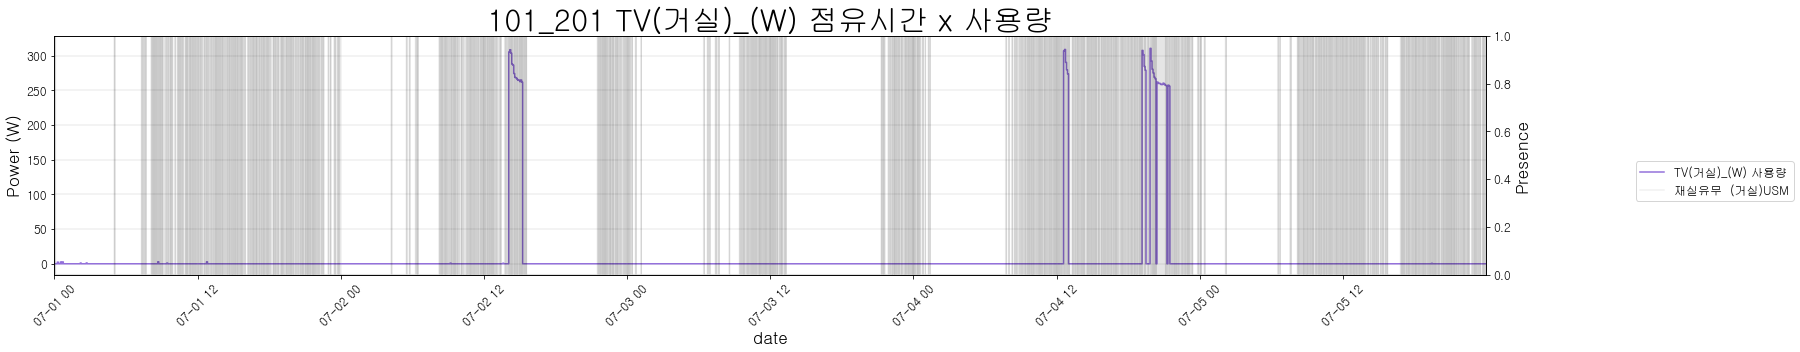

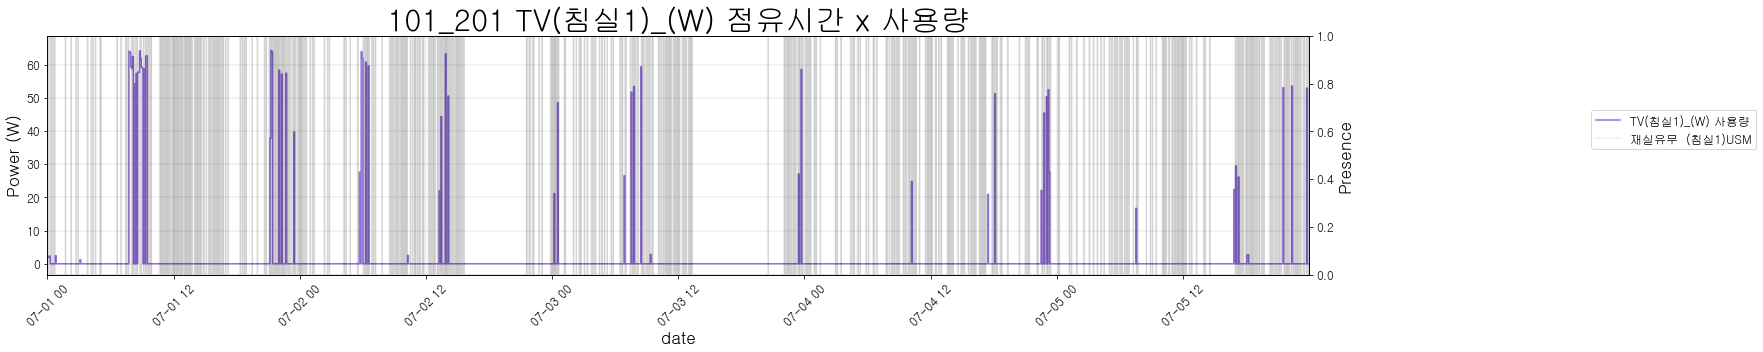

PMM(주방)_(W)  cummulative_power_this_month(kWh)
2021-07-01 00:00:00        274.0                              0.000
2021-07-01 00:05:00          NaN                                NaN
2021-07-01 00:10:00        275.0                                NaN
2021-07-01 00:15:00        256.0                              0.231
2021-07-01 00:20:00        178.0                                NaN
...                          ...                                ...
2022-05-07 23:15:00          NaN                            102.664
2022-05-07 23:20:00          NaN                                NaN
2022-05-07 23:25:00          NaN                                NaN
2022-05-07 23:30:00          NaN                            102.827
2022-05-07 23:35:00        523.0                                NaN

[89564 rows x 2 columns]

PC(침실2)_(W)  PC(침실3)_(W)  PMM(식당)_(W)  TV(거실)_(W)  \
2021-07-01 00:00:00          0.7          5.9        108.0        88.4   
2021-07-01 00:05:00          0.5          3.5        142.0        87.9   
2021-07-01 00:10:00          0.9          6.5          NaN        85.7   
2021-07-01 00:15:00          NaN          3.7          NaN        87.7   
2021-07-01 00:20:00          NaN          4.8          NaN        84.0   
...                          ...          ...          ...         ...   
2022-06-30 20:55:00          NaN          NaN          NaN         NaN   
2022-06-30 21:00:00          NaN          NaN          NaN         NaN   
2022-06-30 21:05:00          NaN          NaN          NaN         NaN   
2022-06-30 21:10:00          NaN          NaN          NaN         NaN   
2022-06-30 21:15:00          NaN          NaN       1107.0         NaN   

                     세탁기(방2)_(W)  전기밥솥1(주방)_(W)  전기장판(침실1)_(W)  커피포트(방3)_(W)  \
2021-07-01 00:00:00          1.0         1186.6            0.5           0.9   
2021-07-01 00:05:00          1.1           94.8            0.6           0.8   
2021-07-01 00:10:00          NaN         1333.1            0.8           0.7   
2021-07-01 00:15:00          1.3         1252.6            NaN           NaN   
2021-07-01 00:20:00          NaN           95.8            NaN           0.0   
...                          ...            ...            ...           ...   
2022-06-30 20:55:00          NaN            NaN            NaN           NaN   
2022-06-30 21:00:00          NaN            NaN            NaN           NaN   
2022-06-30 21:05:00          NaN            NaN            NaN           NaN   
2022-06-30 21:10:00          NaN            NaN            NaN           NaN   
2022-06-30 21:15:00          NaN            NaN            NaN           NaN   

                     cummulative_power_this_month(kWh)  
2021-07-01 00:00:00                              0.000  
2021-07-01 00:05:00                                NaN  
2021-07-01 00:10:00                                NaN  
2021-07-01 00:15:00                              0.153  
2021-07-01 00:20:00                                NaN  
...                                                ...  
2022-06-30 20:55:00                                NaN  
2022-06-30 21:00:00                            409.434  
2022-06-30 21:05:00                                NaN  
2022-06-30 21:10:00                                NaN  
2022-06-30 21:15:00                            409.610  

[105088 rows x 9 columns]

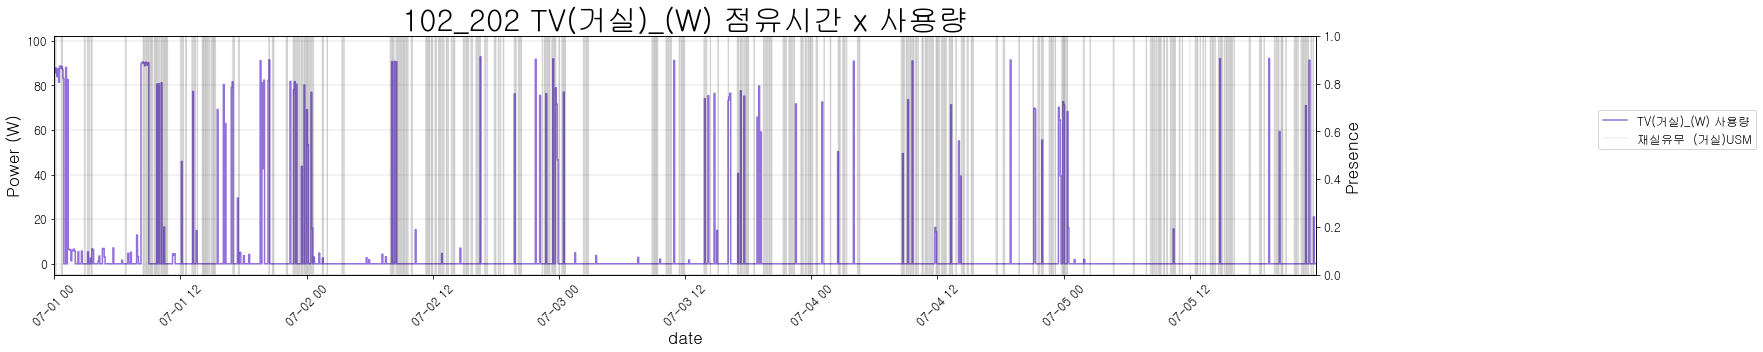

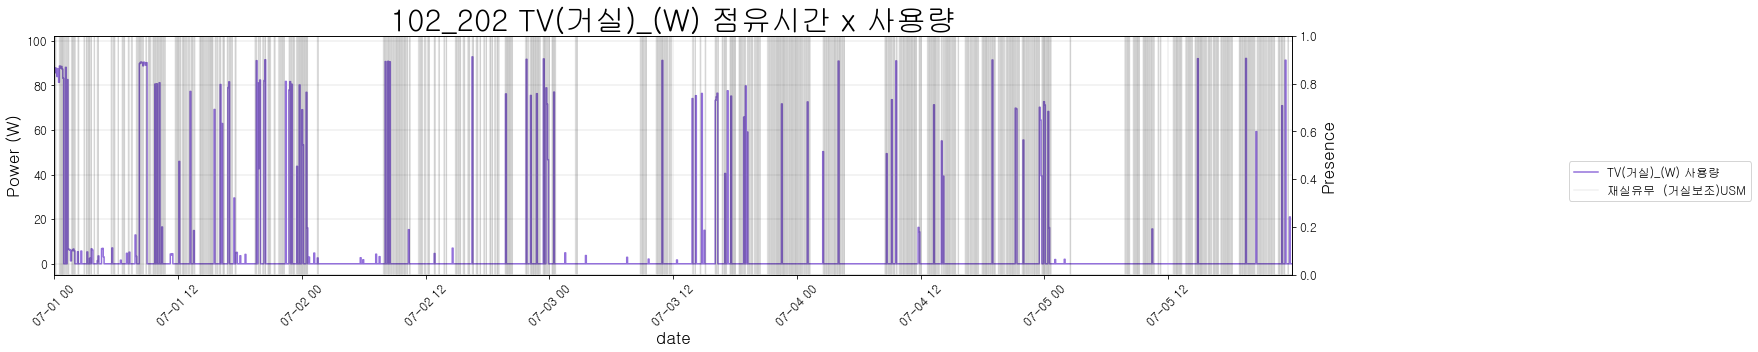

PMM(주방)_(W)  TV(거실)_(W)  노트북(방1)_(W)  선풍기(거실)_(W)  \
2021-07-01 00:00:00          4.0         0.7          NaN         38.0   
2021-07-01 00:05:00          NaN         0.8          NaN         37.1   
2021-07-01 00:10:00          NaN         NaN          NaN         38.4   
2021-07-01 00:15:00          NaN         NaN          NaN          NaN   
2021-07-01 00:20:00          NaN         NaN          NaN         38.2   
...                          ...         ...          ...          ...   
2022-06-30 20:40:00          NaN         NaN          NaN          NaN   
2022-06-30 20:45:00          NaN         NaN          NaN          NaN   
2022-06-30 20:50:00          NaN         NaN          NaN          NaN   
2022-06-30 20:55:00          NaN         NaN          NaN          NaN   
2022-06-30 21:00:00          NaN         NaN          NaN          NaN   

                     선풍기(방1)_(W)  선풍기(방3)_(W)  에어컨(거실)_(W)  전기밥솥(주방)_(W)  \
2021-07-01 00:00:00         31.0          0.7          0.8          94.7   
2021-07-01 00:05:00          NaN          0.9          NaN          94.8   
2021-07-01 00:10:00         31.2          NaN          0.7          95.1   
2021-07-01 00:15:00          NaN          0.8          NaN           NaN   
2021-07-01 00:20:00         31.3          NaN          0.9         974.4   
...                          ...          ...          ...           ...   
2022-06-30 20:40:00          NaN          NaN          NaN           NaN   
2022-06-30 20:45:00          NaN          NaN          NaN           NaN   
2022-06-30 20:50:00          NaN          NaN          NaN           NaN   
2022-06-30 20:55:00          NaN          NaN          NaN           NaN   
2022-06-30 21:00:00          NaN          NaN          NaN           NaN   

                     전자레인지(주방)_(W)  cummulative_power_this_month(kWh)  
2021-07-01 00:00:00            0.8                              0.000  
2021-07-01 00:05:00            0.6                                NaN  
2021-07-01 00:10:00            NaN                                NaN  
2021-07-01 00:15:00            NaN                              0.162  
2021-07-01 00:20:00            NaN                                NaN  
...                            ...                                ...  
2022-06-30 20:40:00            NaN                                NaN  
2022-06-30 20:45:00            NaN                            367.194  
2022-06-30 20:50:00            NaN                                NaN  
2022-06-30 20:55:00            NaN                                NaN  
2022-06-30 21:00:00           25.0                            367.472  

[105085 rows x 10 columns]

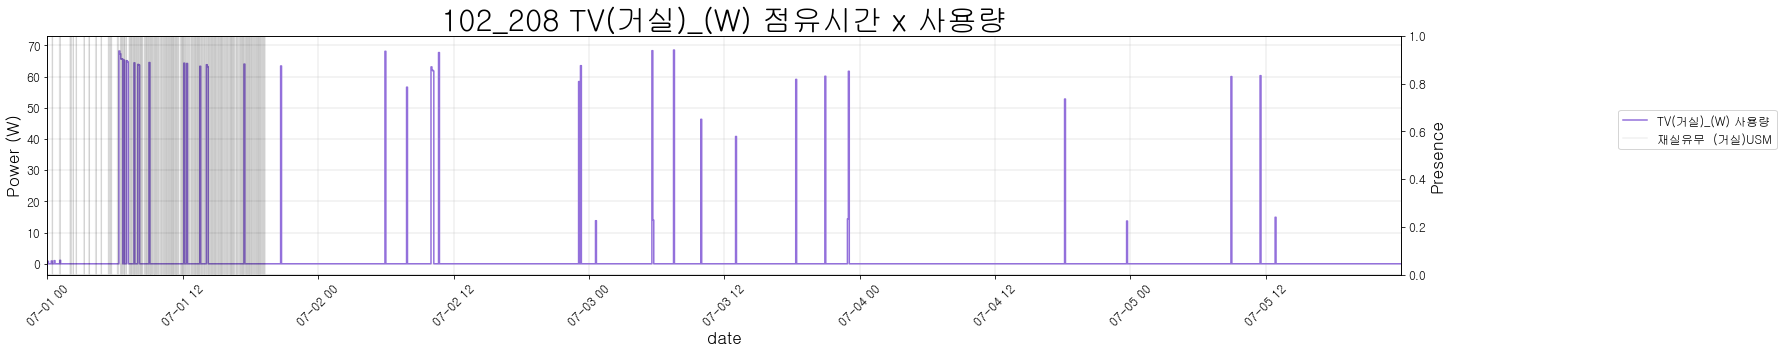

PC(방2)_(W)  TV(거실)_(W)  공기청정기(방1)_(W)  선풍기(거실)_(W)  \
2021-07-01 00:00:00        80.0         1.1            0.8          0.6   
2021-07-01 00:05:00        74.2         1.2            1.0          0.8   
2021-07-01 00:10:00        75.6         NaN            0.9          NaN   
2021-07-01 00:15:00        73.6         NaN            NaN          NaN   
2021-07-01 00:20:00        77.2         NaN            NaN          NaN   
...                         ...         ...            ...          ...   
2022-06-30 20:35:00         NaN         NaN            NaN          NaN   
2022-06-30 20:40:00         NaN         NaN            NaN          NaN   
2022-06-30 20:45:00         NaN         NaN            NaN          NaN   
2022-06-30 20:50:00         NaN         NaN            NaN          NaN   
2022-06-30 20:55:00         NaN         NaN            NaN          NaN   

                     선풍기(방2)_(W)  선풍기(침실1)_(W)  세탁기(발코니2)_(W)  에어컨(거실)_(W)  \
2021-07-01 00:00:00          3.5           NaN            0.6          1.4   
2021-07-01 00:05:00          3.4           NaN            0.7          0.7   
2021-07-01 00:10:00          NaN           NaN            0.9          1.6   
2021-07-01 00:15:00          NaN           NaN            1.0          NaN   
2021-07-01 00:20:00          NaN           NaN            NaN          1.5   
...                          ...           ...            ...          ...   
2022-06-30 20:35:00          NaN           NaN            NaN          NaN   
2022-06-30 20:40:00          NaN           NaN            NaN          NaN   
2022-06-30 20:45:00          NaN           NaN            NaN          NaN   
2022-06-30 20:50:00          NaN           NaN            NaN          NaN   
2022-06-30 20:55:00          NaN           NaN            NaN          NaN   

                     에어프라이어(부엌)_(W)  전기밥솥(주방)_(W)  전자레인지(주방)_(W)  \
2021-07-01 00:00:00             NaN           NaN            0.6   
2021-07-01 00:05:00             NaN           NaN            0.8   
2021-07-01 00:10:00             NaN           NaN            0.7   
2021-07-01 00:15:00             NaN           NaN            NaN   
2021-07-01 00:20:00             NaN           NaN            NaN   
...                             ...           ...            ...   
2022-06-30 20:35:00             NaN           NaN            NaN   
2022-06-30 20:40:00             NaN           NaN            NaN   
2022-06-30 20:45:00             NaN           NaN            NaN   
2022-06-30 20:50:00             NaN           NaN            NaN   
2022-06-30 20:55:00             NaN           NaN            NaN   

                     커피포트(주방)_(W)  cummulative_power_this_month(kWh)  
2021-07-01 00:00:00           0.7                              0.000  
2021-07-01 00:05:00           NaN                                NaN  
2021-07-01 00:10:00           0.8                                NaN  
2021-07-01 00:15:00           0.0                              0.079  
2021-07-01 00:20:00           0.9                                NaN  
...                           ...                                ...  
2022-06-30 20:35:00           NaN                                NaN  
2022-06-30 20:40:00           NaN                                NaN  
2022-06-30 20:45:00           NaN                            272.158  
2022-06-30 20:50:00           NaN                                NaN  
2022-06-30 20:55:00        1752.2                                NaN  

[105084 rows x 13 columns]

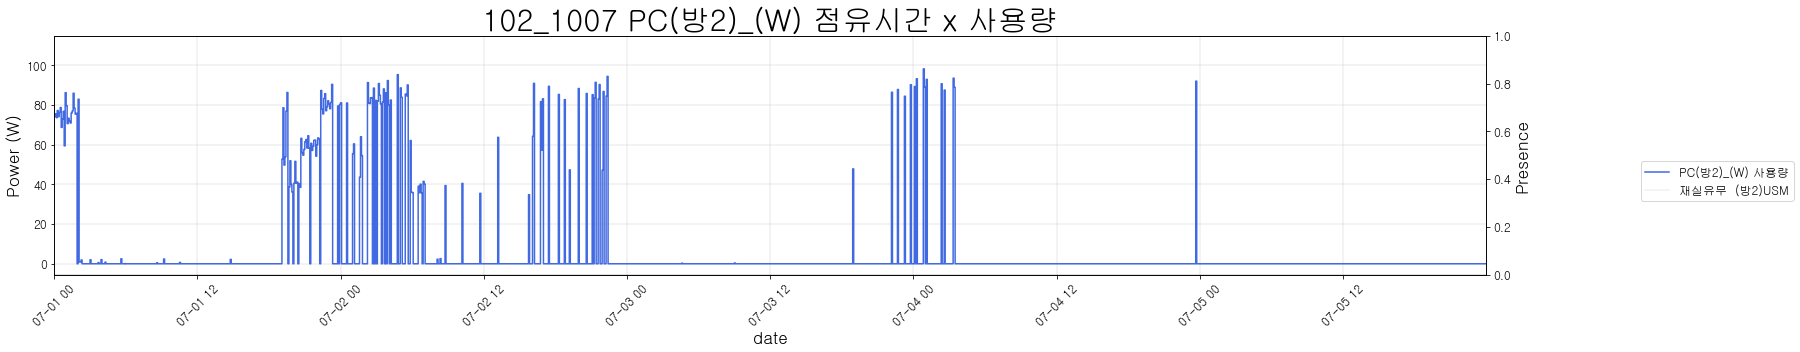

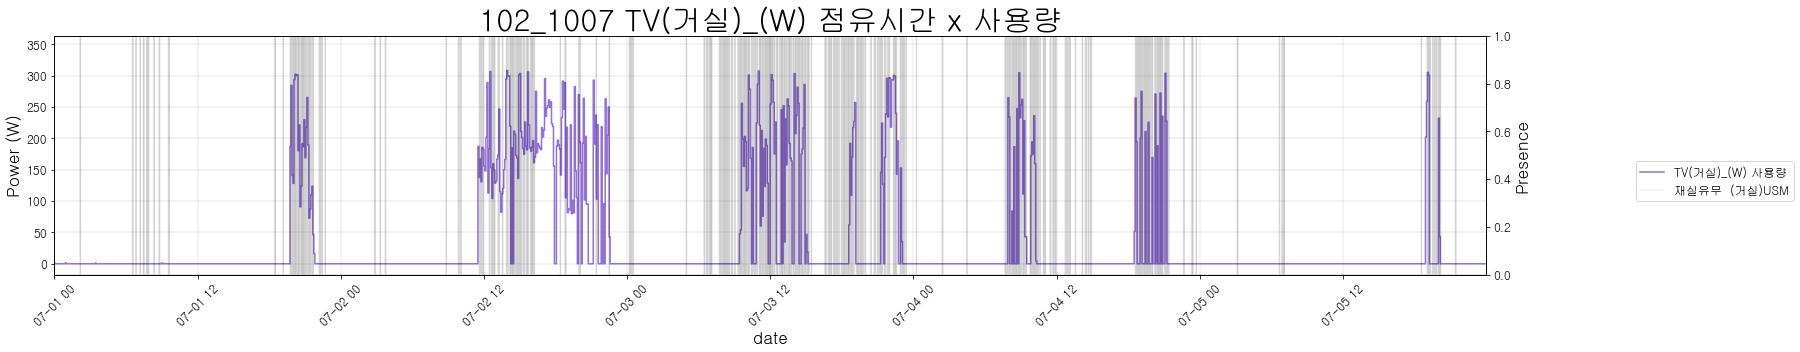

PMM(주방)_(W)  TV(거실)_(W)  공기청정기(방1)_(W)  밥솥(주방)_(W)  \
2021-07-01 00:00:00          0.0         0.7            0.9       126.5   
2021-07-01 00:05:00          1.0         0.8            0.0       123.1   
2021-07-01 00:10:00          NaN         NaN            1.0       127.2   
2021-07-01 00:15:00          NaN         NaN            0.8         0.7   
2021-07-01 00:20:00          NaN         NaN            NaN       122.3   
...                          ...         ...            ...         ...   
2022-06-30 22:55:00          NaN         NaN            NaN         NaN   
2022-06-30 23:00:00          NaN         NaN            NaN         NaN   
2022-06-30 23:05:00          NaN         NaN            NaN         NaN   
2022-06-30 23:10:00          NaN         NaN            NaN         NaN   
2022-06-30 23:15:00          NaN         NaN            NaN         NaN   

                     세탁기(발코니2)_(W)  에어컨(거실)_(W)  커피포터(주방)_(W)  \
2021-07-01 00:00:00            0.6          NaN           0.8   
2021-07-01 00:05:00            NaN          NaN           NaN   
2021-07-01 00:10:00            NaN          NaN           0.7   
2021-07-01 00:15:00            NaN          NaN           0.9   
2021-07-01 00:20:00            1.4          NaN           NaN   
...                            ...          ...           ...   
2022-06-30 22:55:00            NaN          NaN           NaN   
2022-06-30 23:00:00            NaN          NaN           NaN   
2022-06-30 23:05:00            NaN          NaN           NaN   
2022-06-30 23:10:00            NaN          NaN           NaN   
2022-06-30 23:15:00            NaN        851.0           NaN   

                     cummulative_power_this_month(kWh)  
2021-07-01 00:00:00                              0.000  
2021-07-01 00:05:00                                NaN  
2021-07-01 00:10:00                                NaN  
2021-07-01 00:15:00                              0.118  
2021-07-01 00:20:00                                NaN  
...                                                ...  
2022-06-30 22:55:00                                NaN  
2022-06-30 23:00:00                            284.748  
2022-06-30 23:05:00                                NaN  
2022-06-30 23:10:00                                NaN  
2022-06-30 23:15:00                            284.803  

[105112 rows x 8 columns]

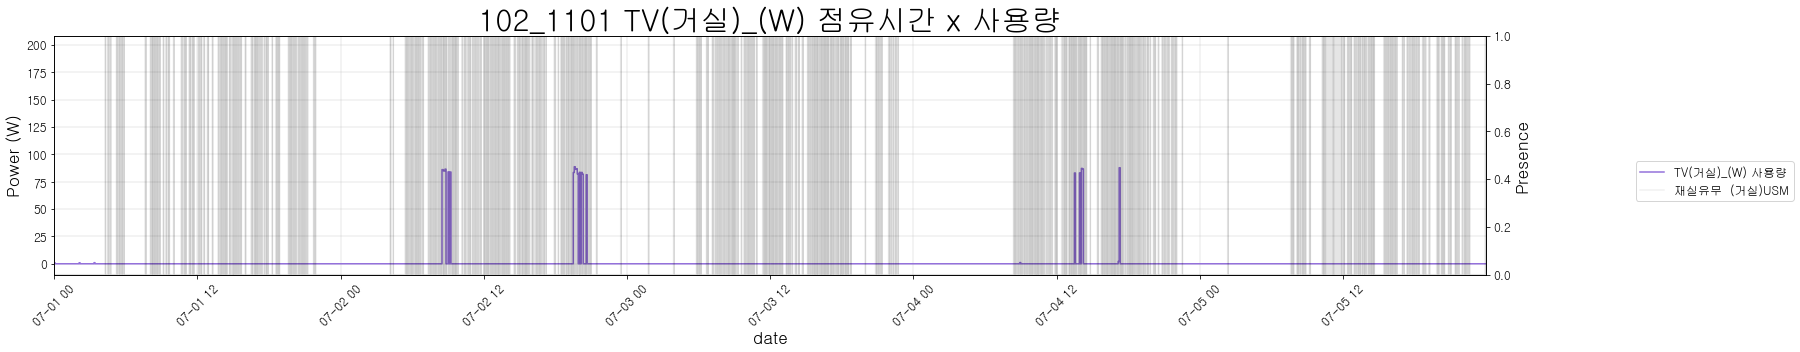

In [84]:
start_time = '2021-07-01 00:00:00'
end_time = '2021-07-05 23:59:59'
for dong,ho in dh_list:
    df_usm,df_ccm = load_df(dong,ho)
    display(df_ccm)
    plot_main(dong,ho,df_usm,df_ccm,start_time,end_time)

PC(침실2)_(W)  PMM(조명)_(W)  TV(거실)_(W)  TV(침실1)_(W)  \
2021-07-01 00:00:00         52.9         60.0         1.0          0.7   
2021-07-01 00:05:00         54.7         66.0         0.9          NaN   
2021-07-01 00:10:00         51.1        313.0         1.1          0.8   
2021-07-01 00:15:00         57.8        308.0         1.3          NaN   
2021-07-01 00:20:00         51.6        305.0         NaN          NaN   
...                          ...          ...         ...          ...   
2022-06-30 19:55:00          NaN          NaN         NaN          NaN   
2022-06-30 20:00:00          NaN          NaN         NaN          NaN   
2022-06-30 20:05:00          NaN          NaN         NaN          NaN   
2022-06-30 20:10:00          NaN          NaN         NaN          NaN   
2022-06-30 20:15:00          NaN          NaN         NaN          NaN   

                     선풍기1(침실1)_(W)  선풍기2(침실2)_(W)  세탁기(발코니2)_(W)  에어컨(거실)_(W)  \
2021-07-01 00:00:00            0.6            0.7            0.7          4.4   
2021-07-01 00:05:00            0.0            NaN            0.8          4.5   
2021-07-01 00:10:00            NaN            0.9            0.6          3.3   
2021-07-01 00:15:00            0.8            NaN            NaN          NaN   
2021-07-01 00:20:00            0.9            1.0            NaN          NaN   
...                            ...            ...            ...          ...   
2022-06-30 19:55:00            NaN            NaN            NaN          NaN   
2022-06-30 20:00:00            NaN            NaN            NaN          NaN   
2022-06-30 20:05:00            NaN            NaN            NaN          NaN   
2022-06-30 20:10:00            NaN            NaN            NaN          NaN   
2022-06-30 20:15:00            NaN            NaN            NaN          NaN   

                     에어컨실외기(거실)_(W)  에어프라이기(주방)_(W)  전기밥솥(주방)_(W)  \
2021-07-01 00:00:00             0.8             0.3         702.3   
2021-07-01 00:05:00             0.6             0.6          85.0   
2021-07-01 00:10:00             NaN             NaN          85.5   
2021-07-01 00:15:00             NaN             NaN          85.2   
2021-07-01 00:20:00             NaN             NaN          85.6   
...                             ...             ...           ...   
2022-06-30 19:55:00             NaN             NaN           NaN   
2022-06-30 20:00:00             NaN             NaN           NaN   
2022-06-30 20:05:00             NaN             NaN           NaN   
2022-06-30 20:10:00             NaN             NaN           NaN   
2022-06-30 20:15:00             NaN             NaN         414.8   

                     전자레인지(주방)_(W)  커피포트(주방)_(W)  헤어드라이어(침실1)_(W)  \
2021-07-01 00:00:00            1.2           0.5              0.8   
2021-07-01 00:05:00            0.1           0.7              NaN   
2021-07-01 00:10:00            0.3           0.6              NaN   
2021-07-01 00:15:00            0.2           NaN              NaN   
2021-07-01 00:20:00            0.0           NaN              NaN   
...                            ...           ...              ...   
2022-06-30 19:55:00            NaN           NaN              NaN   
2022-06-30 20:00:00            NaN           NaN              NaN   
2022-06-30 20:05:00            NaN           NaN              NaN   
2022-06-30 20:10:00            NaN           NaN              NaN   
2022-06-30 20:15:00            NaN           NaN              NaN   

                     cummulative_power_this_month(kWh)  
2021-07-01 00:00:00                              0.000  
2021-07-01 00:05:00                                NaN  
2021-07-01 00:10:00                                NaN  
2021-07-01 00:15:00                              0.090  
2021-07-01 00:20:00                                NaN  
...                                                ...  
2022-06-30 19:55:00                                NaN  
2022-06-30 20:00:00                          

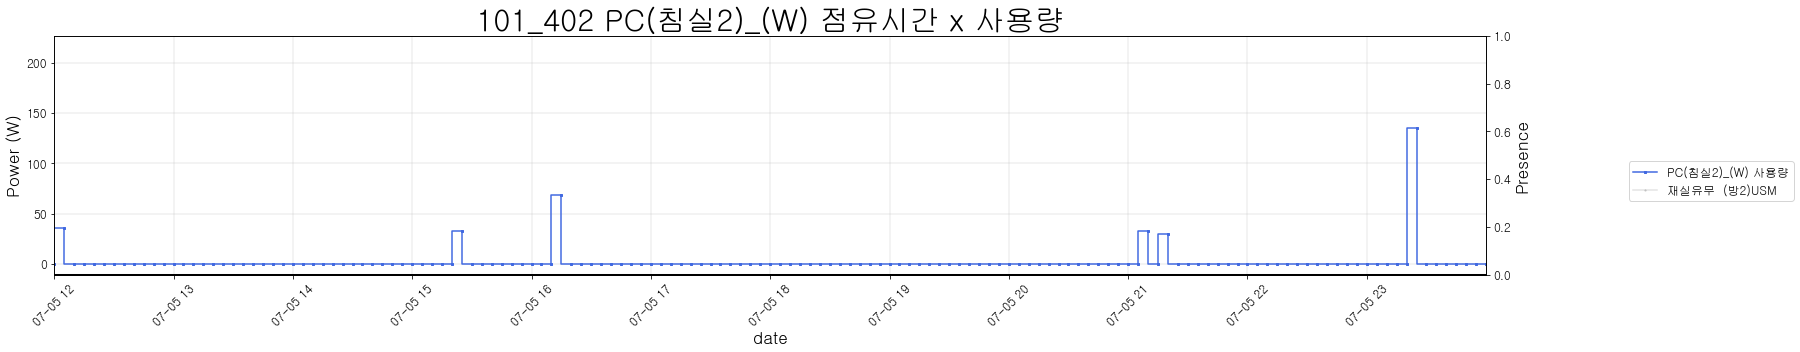

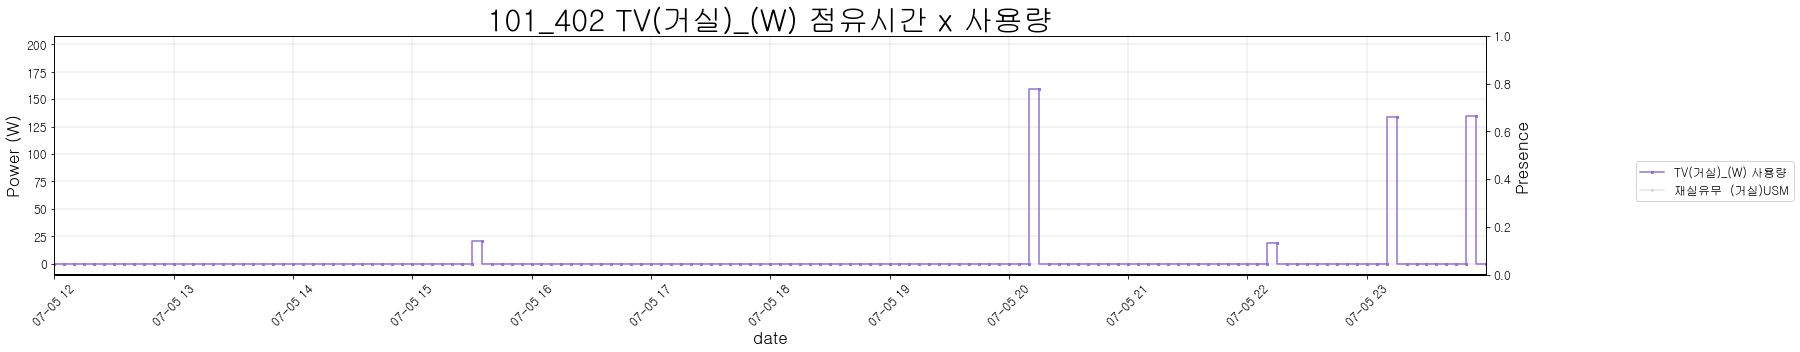

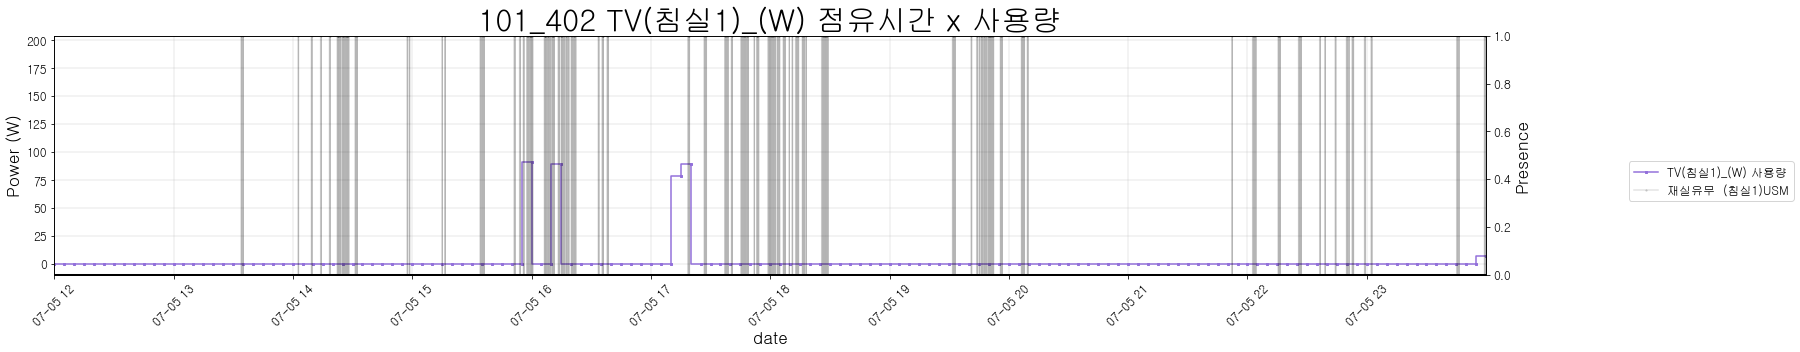

In [49]:
start_time = '2021-07-05 12:00:00'
end_time = '2021-07-05 23:59:59'
df_usm,df_ccm = load_df('101','402')
display(df_ccm)
plot_main(dong,ho,df_usm,df_ccm,start_time,end_time)

# 101 - 302 EDA

## 101-302 1분USM

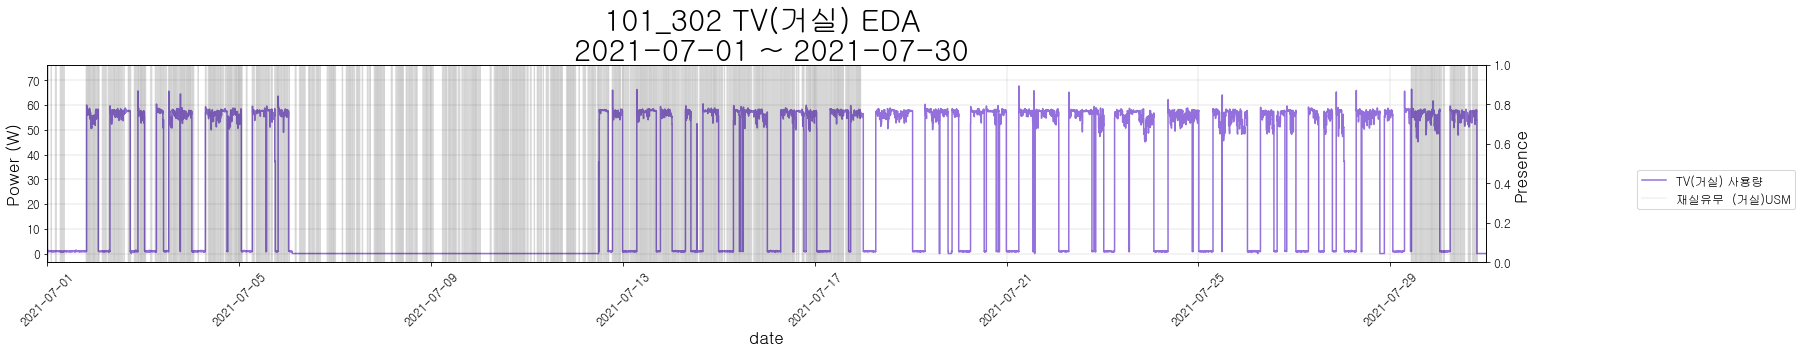

In [56]:
start_time = '2021-07-01 00:00:00'
end_time = "2021-07-30 23:59:59"

dong = "101"
ho = "302"

df_usm,df_ccm = load_df(dong,ho,60)
# display(df_ccm)
plot_main(dong,ho,df_usm,df_ccm,start_time,end_time)

## 101-302 5분USM

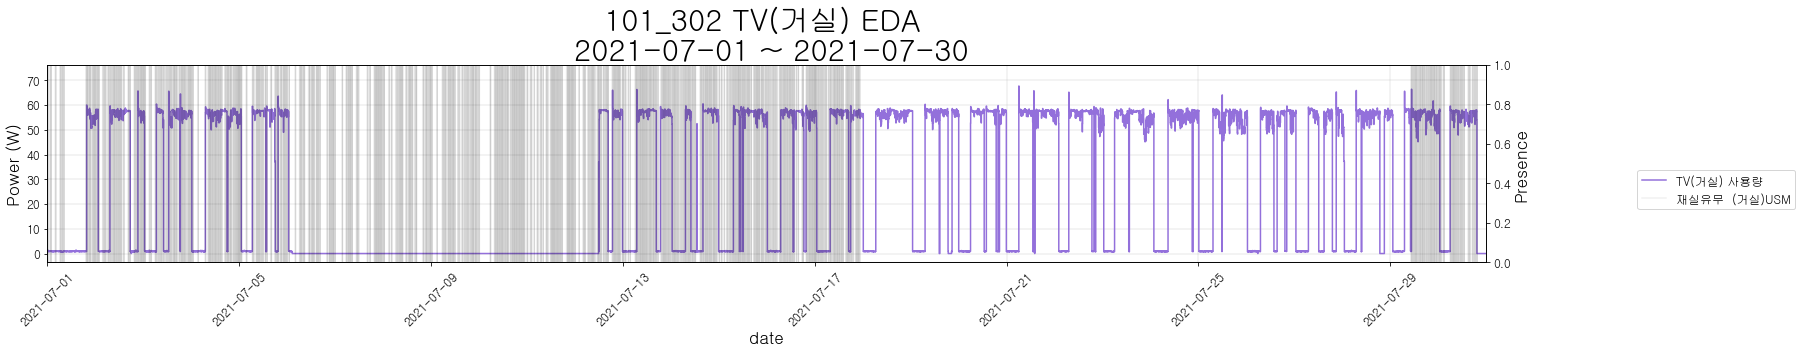

In [57]:
start_time = '2021-07-01 00:00:00'
end_time = "2021-07-30 23:59:59"

dong = "101"
ho = "302"

df_usm,df_ccm = load_df(dong,ho,300)
# display(df_ccm)
plot_main(dong,ho,df_usm,df_ccm,start_time,end_time)

## 101-302 5초 USM

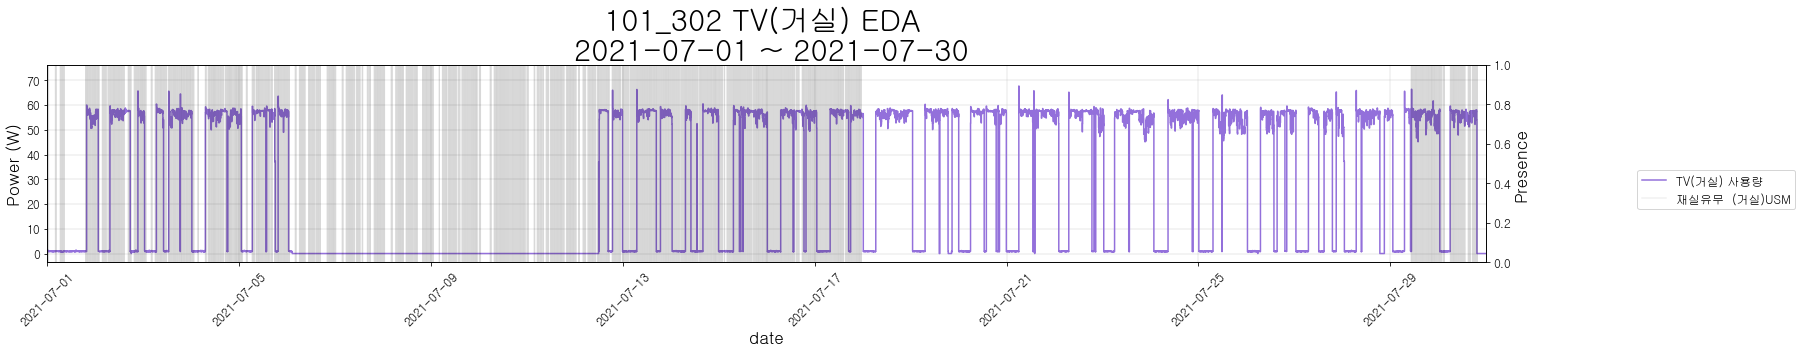

In [58]:
start_time = '2021-07-01 00:00:00'
end_time = "2021-07-30 23:59:59"

dong = "101"
ho = "302"

df_usm,df_ccm = load_df(dong,ho,5)
# display(df_ccm)
plot_main(dong,ho,df_usm,df_ccm,start_time,end_time)

## 101-302 1초 USM

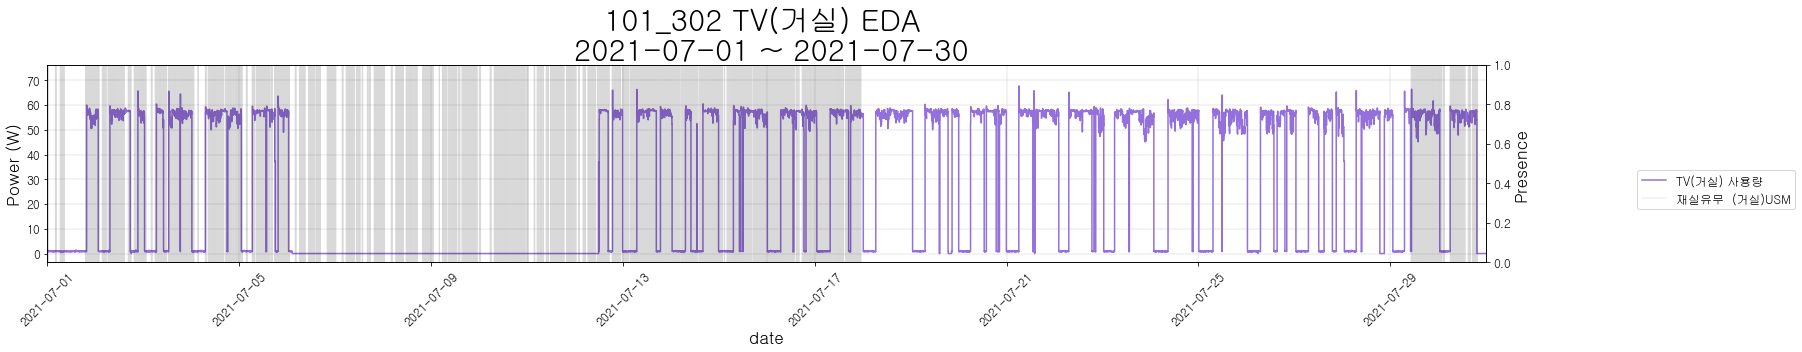

In [59]:
start_time = '2021-07-01 00:00:00'
end_time = "2021-07-30 23:59:59"

dong = "101"
ho = "302"

df_usm,df_ccm = load_df(dong,ho,1)
# display(df_ccm)
plot_main(dong,ho,df_usm,df_ccm,start_time,end_time)

In [ ]:
######################################

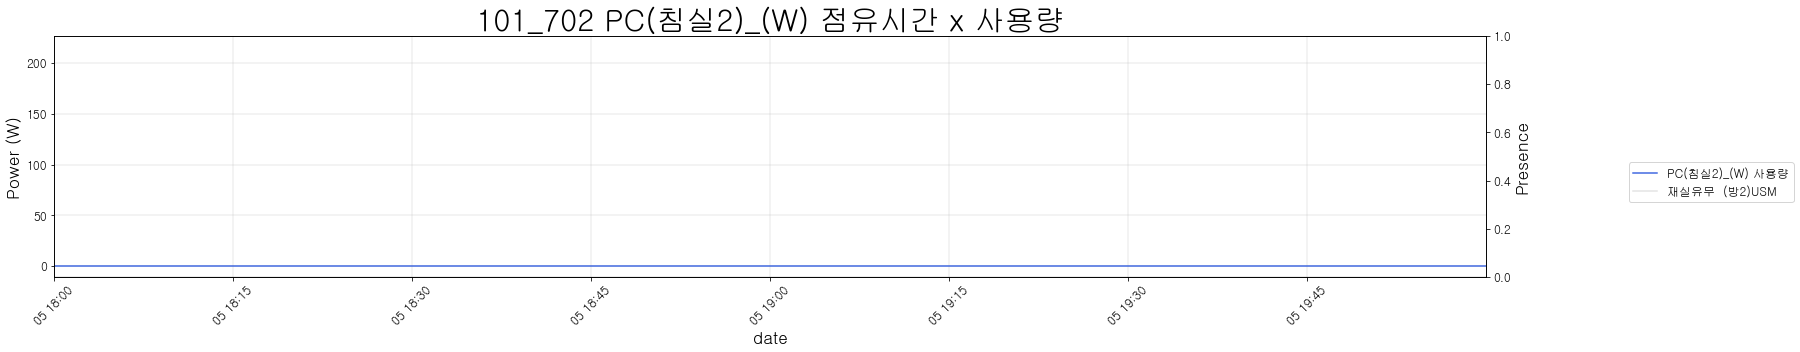

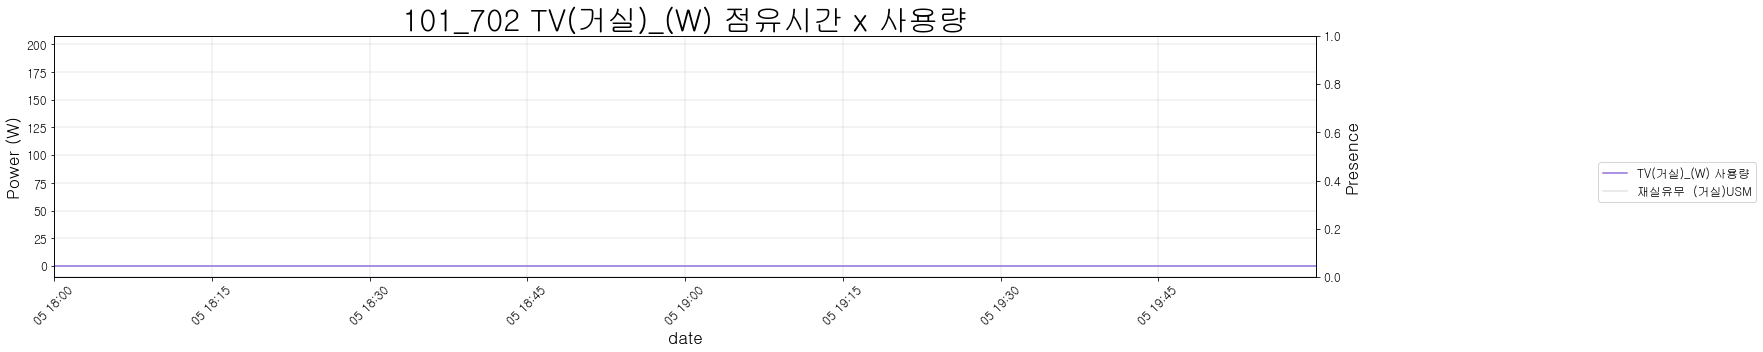

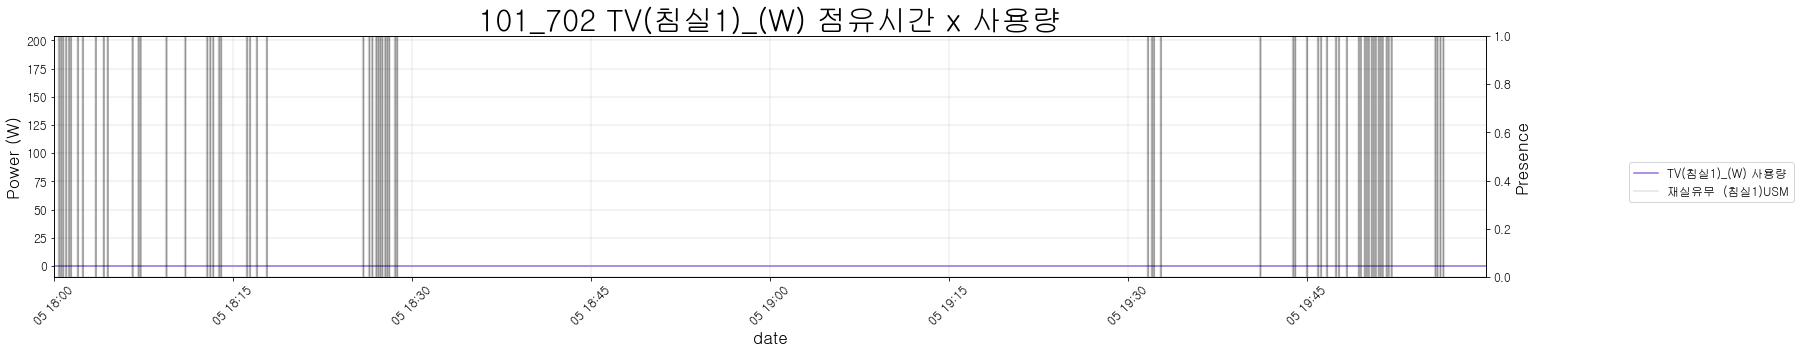

In [44]:
test_df = df_usm.round(0)
len_cols = len(test_df.columns)
for col in test_df.columns:
    test_df[col+"USM"] = 1*((test_df[col] == 2) | (test_df[col] == 4))
test_df_2 = test_df.iloc[:,len_cols:]

#####
test_df_2 = test_df_2[start_time:end_time]
#####

# 동 호수별 ccm,usm 필요한것 정리
cols = df_ccm.columns
ccm_li = []

for col in cols:
    if "PC" in col:
        # print(col)
        ccm_li.append(col)
    elif "TV" in col:
        # print(col)
        ccm_li.append(col)

usm_li = test_df_2.columns

match_li = match_algo(ccm_li,usm_li)


# 매칭되는 센서별로 plot
for ccm,usm in match_li:
    c = 'royalblue' if ('PC' in ccm) else 'mediumpurple'
    test_df_ccm = df_ccm[ccm]
    test_df_ccm=test_df_ccm.fillna(0)
    # test_df_ccm=test_df_ccm.drop_duplicates()

    # 60 mins 
    fig, ax1 = plt.subplots(1, 1, figsize=(25, 5))

    # First Plot
    lns1 = ax1.step(test_df_ccm.index,
                    test_df_ccm.values,
                    color= c, 
                    marker = 'None', 
                    # markersize=2, 
                    # linestyle = "dashed", 
                    label='{} 사용량'.format(ccm))


    ax1.set_xlim(pd.to_datetime(start_time), pd.to_datetime(end_time))
    ax1.set_xlabel('date', fontsize=17)
    ax1.set_ylabel('Power (W)', fontsize=17)
    ax1.tick_params(axis = 'x', labelsize = 12, rotation=45)
    ax1.tick_params(axis = 'y', labelsize = 12)
    ax1.grid(linewidth=0.3)

    ax1.legend("Power")
    # ax1.set_title(dong + "-" + ho, fontsize=16, va='bottom', fontweight='semibold')
    # ax1.legend(['AC (Wh)'], loc="center right", fontsize=12)

    #Second Plot
    ax2 = ax1.twinx()

    lns2 = ax2.step(test_df_2[usm].index,
                    test_df_2[usm].values,
                    color='black', 
                    marker = 'None', 
                    # markersize=2,
                    alpha=0.1,
                    # linestyle = "dashed",
                    label='재실유무 {}'.format(usm))

    ax2.fill_between(test_df_2[usm].index,
            test_df_2[usm].values,
            color='black',
            alpha=0.2,
            step='pre')

    ax2.set_ylim([0, 1])
    ax2.set_ylabel('Presence', fontsize=17)
    ax2.tick_params(axis = 'y', labelsize = 12)

    # added these two lines
    lns = lns1+lns2

    labs = [l.get_label() for l in lns]
    ax1.legend(lns, labs, loc="best", fontsize=12, bbox_to_anchor=(1.219, 0.5))

    plt.title("{}_{} {} 점유시간 x 사용량".format(dong,ho,ccm),fontsize = 30, fontweight = "bold")
    plt.tight_layout()
    # plt.show()
    plt.get_backend()
    plt.savefig('savefig_test.png')

In [ ]:
######################################

In [28]:
df_ccm = pd.read_csv(dir_data+"CCM/101_402_appliances(real)_and_houseload(cum).csv",index_col=0)
df_usm = pd.read_csv(dir_data+"USM/101_402_USM_60S.csv",index_col=0)
df_usm = df_usm.fillna(0)

df_ccm.index = pd.to_datetime(df_ccm.index).tz_localize(None)
df_usm.index = pd.to_datetime(df_usm.index).tz_localize(None)
# df_usm = df_usm.loc[df_ccm.index]


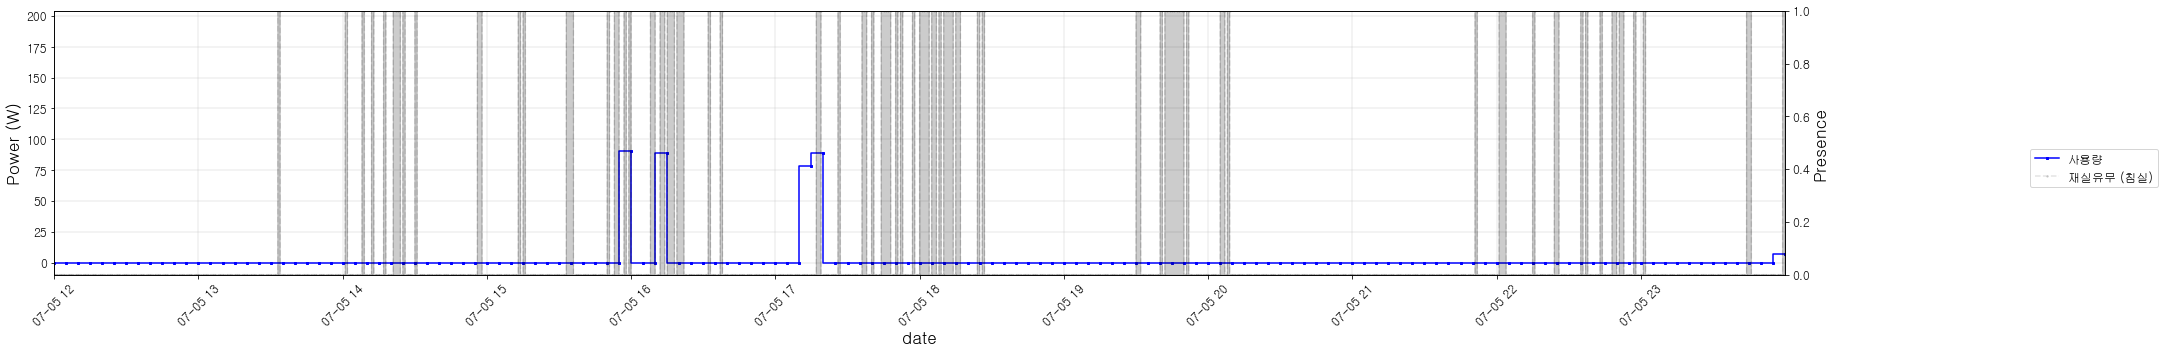

In [29]:
# df_ccm = pd.read_csv(dir_data+"CCM/101_702_appliances(real)_and_houseload(cum).csv",index_col=0)
# df_usm = pd.read_csv(dir_data+"USM/101_702_USM_60S.csv",index_col=0)
# df_usm = df_usm.fillna(0)

# df_ccm.index = pd.to_datetime(df_ccm.index).tz_localize(None)
# df_usm.index = pd.to_datetime(df_usm.index).tz_localize(None)
# df_usm = df_usm.loc[df_ccm.index]

ccm_name = 'TV(침실1)_(W)'
usm_name = ' (침실1)USM'


from matplotlib.ticker import MultipleLocator

start_time = '2021-07-05 12:00:00'
end_time = '2021-07-05 23:59:59'


test_df = df_usm.round(0)
for col in test_df.columns:
    test_df[col+"USM"] = 1*((test_df[col] == 2) | (test_df[col] == 4))
test_df_2 = test_df.iloc[:,len(df_usm.columns):]

test_df_ccm = df_ccm[ccm_name]
test_df_ccm=test_df_ccm.fillna(0)
# test_df_ccm=test_df_ccm.drop_duplicates()

# 60 mins 
fig, ax1 = plt.subplots(1, 1, figsize=(30, 5))

# First Plot
lns1 = ax1.step(test_df_ccm.index,
                test_df_ccm.values,
                color='b', 
                marker = 's', 
                markersize=2, 
                # linestyle = "dashed", 
                label='사용량')


ax1.set_xlim(pd.to_datetime(start_time), pd.to_datetime(end_time))
ax1.set_xlabel('date', fontsize=17)
ax1.set_ylabel('Power (W)', fontsize=17)
ax1.tick_params(axis = 'x', labelsize = 12, rotation=45)
ax1.tick_params(axis = 'y', labelsize = 12)
ax1.grid(linewidth=0.3)

ax1.legend("Power")
# ax1.set_title(dong + "-" + ho, fontsize=16, va='bottom', fontweight='semibold')
# ax1.legend(['AC (Wh)'], loc="center right", fontsize=12)

#Second Plot
ax2 = ax1.twinx()

lns2 = ax2.step(test_df_2[usm_name].index,
                test_df_2[usm_name].values,
                color='black', 
                marker = '*', 
                markersize=2,
                alpha=0.1,
                linestyle = "dashed",
                label='재실유무 (침실)')

ax2.fill_between(test_df_2[usm_name].index,
         test_df_2[usm_name].values,
         color='black',
         alpha=0.2,
         step='pre')

ax2.set_ylim([0, 1])
ax2.set_ylabel('Presence', fontsize=17)
ax2.tick_params(axis = 'y', labelsize = 12)

# added these two lines
lns = lns1+lns2

labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc="best", fontsize=12, bbox_to_anchor=(1.219, 0.5))

plt.tight_layout()
plt.show()

In [210]:
test_df_ccm

2021-07-01 00:00:00    2.5
2021-07-01 00:05:00    0.0
2021-07-01 00:10:00    0.0
2021-07-01 00:15:00    0.0
2021-07-01 00:20:00    2.4
                      ... 
2022-06-29 22:30:00    0.0
2022-06-29 22:35:00    0.0
2022-06-29 22:40:00    0.0
2022-06-29 22:45:00    0.0
2022-06-29 22:50:00    0.0
Name: TV(거실)_(W), Length: 104819, dtype: float64

In [4]:
def vis_diff(arr,idx,alpha):
    diff_arr = norm(arr[:,:,idx]) - norm(arr[:,:,idx+1])
    fig = plt.figure(figsize=(9,9))
    # vis_yearly(hems_data,i,0.3)
    ax1 = fig.add_subplot(3, 1, 1)
    ax2 = fig.add_subplot(3, 1, 2)
    ax3 = fig.add_subplot(3, 1, 3)
    for i in range(len(diff_arr)):
        ax1.plot(arr[i][:,idx],alpha=alpha)
        ax2.plot(arr[i][:,idx+1],alpha=alpha)
        ax3.plot(diff_arr[i],alpha=alpha)

    # ax1.title('apliance #{}'.format(idx), fontsize=25)
    # ax2.title('apliance #{}'.format(idx), fontsize=25)
    # ax3.title('diff of two apliance', fontsize=25)
    # plt.xlabel('time', fontsize=20)
    # plt.ylabel('sinx', fontsize=20)

def vis_monthly(arr,apl_idx,alpha):
    fig,ax = plt.subplots(4,3,figsize=(16,16))
    # plt.figure(figsize=(16,12))
    fig.suptitle('Appliance#{} Monthly Usage Visualization \nAppliance : {}'.format(apl_idx,cols[apl_idx]),fontweight ="bold",fontsize="32")
    for i in range(12):
        if i==5:
            ax[i//3,i%3].plot(arr[30*i:30*(i+1),:,apl_idx].T,alpha=alpha)
            ax[i//3,i%3].set_title("Month{} - Appliance #{} usage".format(12,apl_idx))           
        else:
            ax[i//3,i%3].plot(arr[30*i:30*(i+1),:,apl_idx].T,alpha=alpha)
            ax[i//3,i%3].set_title("Month{} - Appliance #{} usage".format((i+7)%12,apl_idx))
        # plt.subplot(4,3,i+1)
        # plt.plot(arr[30*i:30*(i+1),:,apl_idx].T,alpha=alpha)
        # plt.title("month{} #{}usage".format((i+7)%12))
        

In [5]:
df = pd.read_csv(dir_data+"101_402_appliances(real)_and_houseload(cum).csv")
cols = df.columns
df_replace = df.fillna(0)

hems_data = df_replace.values[:-(105076%288),:15]
vis_diff(hems_data,1,0.2)